![imagen](./img/eda_01.jpg)

# Proyect Information

### Title

In [ ]:
title = "Artists or bands with more hits on Billboard Hot 100"
URL="https://en.wikipedia.org/wiki/Billboard_Hot_100"
introduction=' The first number-one song of the Billboard Hot 100 was "Poor Little Fool" by Ricky Nelson, on  started on August 4th 1958 As of the issue for the week ending on December 30th 2023, the Billboard Hot 100 has had 1,161 different number-one entries. The current number-one song on the chart is "All I Want for Christmas Is You" by Mariah Carey.[6]"'

### Topic

In [ ]:
Topic = "Musical hits of Billboard Hot 100 from 1966"

### Hypothesis

In [ ]:
hypothesis_1 = "Qué grupo o artista es el que más éxitos ha tenido desde 1958"

In [ ]:
hypothesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
hypothesis_3 = "Que grupo o artista llevan más exitos en los ultimos 10 años y de que generos"
hypothesis_4 = "Qué grupo o artista han sido 1 hit wonder y de que generos"
hypothesis_5 = "Qué generos corresponden a cada grupo o artista anterior"


# The analysis changed initial hypothesys
hypothesis_1 = "Qué géneros musicales han tenido más canciones"
hypothesis_2 = "Dentro de esos géneros musicales con más canciones, que artistas y canciones fueron número 1"
hypothesis_3 = "Teniendo en cuenta el índice de bailidad que proporciona el dataset, que géneros son más bailables"
hypothesis_4 = "Influye ese índice es que tengan más o menos canciones"


## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hypothesis. <br>
También incluye el origen de estos datos y su fuente.

In [2]:
import ast
import json
import numpy as np
import os
import pandas as pd
from bootcampviztools import *
#from bootcampviztools2 import *
from edafunctions import *


# guarda en variables los datasets y su fuente
df_Hot_100_Audio_Features = pd.read_csv("./data/Hot_100_Audio_Features.csv").set_index('index')#con género unknown
#df_Hot_100_Audio_Features_original = pd.read_csv("./data/Hot_100_Audio_Features_original.csv").set_index('index')#sin género unknown
#df_compare= df_Hot_100_Audio_Features.compare(df_Hot_100_Audio_Features_original)
#limpio duplicados
df_Hot_100_Audio_Features_backup_20240103 = df_Hot_100_Audio_Features.copy()
df_Hot_100_Audio_Features.drop_duplicates(inplace=True)
df_Hot_Stuff = pd.read_csv("./data/Hot_Stuff.csv").set_index('index')
#df_genres_modificado = pd.read_csv("./data/df_genres_20231228_2104_without_column_unknown.csv",sep=";").set_index("index")
fuente_1 = "https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features"
#convierto en otra columna los géneros en una lista 
df_Hot_100_Audio_Features_backup = df_Hot_100_Audio_Features.copy()
#los vacíos son ahora del género unknown 
df_Hot_100_Audio_Features.spotify_genre.fillna("['unknown']",inplace=True)
#los nan de deanceability son ahora 0
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)
#con este instrucción creo la columna género adicional como lista 
df_Hot_100_Audio_Features["spotify_genre_list"] = df_Hot_100_Audio_Features.spotify_genre.apply(ast.literal_eval)
#elimino los registros anteriormente nulos y ahora con valor 'unknown'
value_to_find='unknown'
df_Hot_100_Audio_Features.drop(df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list'].apply(lambda x: value_to_find in x)].index,inplace=True)
#reemplazo los espacios en los nombres por un guión bajo para poder referenciarlos correctamente cuando sea el nombre de una columna
df_Hot_100_Audio_Features.spotify_genre_list = df_Hot_100_Audio_Features.spotify_genre_list.apply(lambda x: [item.replace(" ", "_") for item in x])
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(set)#elimino duplicados
df_Hot_100_Audio_Features['spotify_genre_list_no_dups'] = df_Hot_100_Audio_Features.spotify_genre_list.apply(list)#lo vuelvo a convertir en lista
df_Hot_100_Audio_Features.danceability.fillna(0,inplace=True)#pongo a 0 los nulos de danceability
df_Hot_100_Audio_Features_genres_EDA=df_Hot_100_Audio_Features.copy()
df_Hot_Stuff_with_genres = pd.merge(df_Hot_100_Audio_Features_genres_EDA, df_Hot_Stuff, on='SongID', how='inner')
df_Hot_Stuff_with_genres["WeekID_As_Date"] = pd.to_datetime(df_Hot_Stuff_with_genres.WeekID)


## View of the dataset

In [51]:
df_Hot_Stuff

url      WeekID  \
index                                                                   
0       http://www.billboard.com/charts/hot-100/1965-0...   7/17/1965   
1       http://www.billboard.com/charts/hot-100/1965-0...   7/24/1965   
2       http://www.billboard.com/charts/hot-100/1965-0...   7/31/1965   
3       http://www.billboard.com/charts/hot-100/1965-0...    8/7/1965   
4       http://www.billboard.com/charts/hot-100/1965-0...   8/14/1965   
...                                                   ...         ...   
327890  https://www.billboard.com/charts/hot-100/2018-...  10/20/2018   
327891  http://www.billboard.com/charts/hot-100/1977-0...   5/21/1977   
327892  http://www.billboard.com/charts/hot-100/1981-0...   5/23/1981   
327893  http://www.billboard.com/charts/hot-100/1973-0...   9/29/1973   
327894  https://www.billboard.com/charts/hot-100/2020-...  11/28/2020   

        Week Position                      Song                  Performer  \
index                                                                        
0                  34    Don't Just Stand There                 Patty Duke   
1                  22    Don't Just Stand There                 Patty Duke   
2                  14    Don't Just Stand There                 Patty Duke   
3                  10    Don't Just Stand There                 Patty Duke   
4                   8    Don't Just Stand There                 Patty Duke   
...               ...                       ...                        ...   
327890             22            God Is A Woman              Ariana Grande   
327891             22   I Wanna Get Next To You                 Rose Royce   
327892             22          I Can't Stand It  Eric Clapton And His Band   
327893             22  Here I Am Come & Take Me                   Al Green   
327894             22                     Hawai        Maluma & The Weeknd   

                                           SongID  Instance  \
index                                                         
0                Don't Just Stand TherePatty Duke         1   
1                Don't Just Stand TherePatty Duke         1   
2                Don't Just Stand TherePatty Duke         1   
3                Don't Just Stand TherePatty Duke         1   
4                Don't Just Stand TherePatty Duke         1   
...                                           ...       ...   
327890                God Is A WomanAriana Grande         1   
327891          I Wanna Get Next To YouRose Royce         1   
327892  I Can't Stand ItEric Clapton And His Band         1   
327893           Here I Am Come & Take MeAl Green         1   
327894                   HawaiMaluma & The Weeknd         1   

        Previous Week Position  Peak Position  Weeks on Chart  
index                                                          
0                         45.0             34               4  
1                         34.0             22               5  
2                         22.0             14               6  
3                         14.0             10               7  
4                         10.0              8               8  
...                        ...            ...             ...  
327890                    21.0              8              13  
327891                    10.0             10              13  
327892                    12.0             10              13  
327893                    16.0             10              13  
327894                    12.0             12              13  

[327895 rows x 10 columns]

In [ ]:
#creo un diccionario para crear las columnnas del dataset de generos
list_with_all_genres =[]
for valor in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:#
    #print(type(valor))
    if len(valor)==1:#solo un elemento
        if valor[0] not in list_with_all_genres:
            list_with_all_genres.append(valor[0])
    elif len(valor)>1:#multiple elements, I need to add each element of the list
        i=0
        for i in range(len(valor)):
            if valor[i] not in list_with_all_genres:
                list_with_all_genres.append(valor[i])
#print(f"Longitud de todos los géneros:{len(list_with_all_genres)}")
dict_with_all_genres={}#create the dictionary

for valor in list_with_all_genres:
        for row_spotify_genre_list_no_dups in df_Hot_100_Audio_Features.spotify_genre_list_no_dups:
            if valor in row_spotify_genre_list_no_dups:
                if valor in dict_with_all_genres.keys():
                    dict_with_all_genres[valor]=dict_with_all_genres[valor]+1 #acumulo
                else:
                    dict_with_all_genres[valor]=1 #inicializo a 1
top_50_entries = dict(sorted(dict_with_all_genres.items(), key=lambda item: item[1], reverse=True)[:50])
#I sort it descendingly and take 50 elements
list_top_50_entries=list(top_50_entries.keys()) 
#take out the keys from the dictionary
valor_de_corte = list(top_50_entries.values())[-1] 
#I convert it to a list and take the lowest value
df_genres = df_Hot_100_Audio_Features[['SongID','spotify_genre_list_no_dups']].copy() 
# I create a copy with all the songs so I keep the index

for value in list_top_50_entries:
#create all gender columns to False
    df_genres[value]=False

for index,row in df_Hot_100_Audio_Features.iterrows():
#I go through the indexes, rows to update the song with its genre to True
    for value in row['spotify_genre_list_no_dups']:
        if value in list_top_50_entries:
            df_genres.at[index, value] = True

#I eliminate the ones that have everything set to False
acumulador_false=0 
#to count if it reaches 50
indices=[]
for index,row in df_genres.iterrows():
    for column in list_top_50_entries:
        if row[column]==False:
            acumulador_false=acumulador_false+1
    #print(f"index:{index} acumulador_false:{acumulador_false}")
    if acumulador_false==50:
            indices.append(index) 
# I save the index to delete it later
    acumulador_false=0
df_genres_backup = df_genres.copy() # just in case
df_genres.drop(indices,inplace=True) 
# more than 21,000 records remain out of almost 26,000

In [ ]:

#accumulation by gender and date range starting with January 1 of the oldest date in groups of 5 years
filtered=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Previous Week Position'].isna()] 

#so that only records appear the first time they appeared on the billboard
filtered=filtered.sort_values(by='WeekID_As_Date')#get oldest date

###
initial_date = pd.to_datetime(filtered.iloc[[0]]['WeekID_As_Date'].dt.strftime('%Y/%m/%d').values[0])  #get oldest date

filtered=filtered.sort_values(by='WeekID_As_Date',ascending=False) #get latest date

last_date=pd.to_datetime(filtered.iloc[[0]]['WeekID_As_Date'].dt.strftime('%Y/%m/%d').values[0]) #get latest date
##
multiple=False #to find multiples of five
last_date_year = last_date.year
while multiple==False:

    if (last_date_year - initial_date.year) % 5 == 0:# to make groups of 5 years in the comparison
            multiple=True
    else:
            multiple=False
            last_date_year+=1

start_date= pd.to_datetime(str(initial_date.year) + "/01/01")
end_date = pd.to_datetime(str(last_date_year)+"/12/31")+pd.Timedelta(days=1)


In [ ]:

def save_to_csv(dataframe_df,column_name_as_string,start_year=0,end_year=0):
#not working from edafunctions.py:(
    # Save the dataset for the current interval (you can save it to a file or use as needed)
    folder_path=f"./data_{column_name_as_string}" 
# generate if the directory does not exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_name = f"./data_{column_name_as_string}/{column_name_as_string}_counts_{start_year}-{end_year}.csv" 
#generate the filename in the previous folder
    dataframe_df.reset_index(inplace=True) # reset the index

    dataframe_df.index.name="index" # I call it index
    dataframe_df.to_csv(file_name,index=False,sep=";")  # Save to a CSV file

In [ ]:
start = start_date #para el bucle
while start < end_date:
    end = start + pd.DateOffset(years=5)
    if (end_date.year-end.year)==1:#to get the latest dates
        end=end_date
    # Filter the dataset for the current interval
    interval_data = filtered[(filtered['WeekID_As_Date'] >= start) & (filtered['WeekID_As_Date'] < end)] # filter by dates

    
#filter the songs with genre column to True/False that are in interval_data

    filtered_df_genres = df_genres[df_genres['SongID'].isin(interval_data['SongID'])]
    list_of_data=[] #where will I save each data record
    
    for column in filtered_df_genres[list_top_50_entries].columns:
        
        if filtered_df_genres[column].any():  # Check if any True values exist in the column
            count_true = filtered_df_genres[column].sum()  # Count True values in the column
            data={}
#create the structure of each row of the dataset in a dictionary
            data['genre']=column
            data['totals']=count_true
            list_of_data.append(data)
#create a list of dictionaries
        genre_totals_df=pd.DataFrame(list_of_data) # create the dataset

        genre_totals_df['start_date']=start 
#is the cutoff range
        genre_totals_df['end_date']=end+pd.Timedelta(days=-1) #is the cutoff range
        save_to_csv(genre_totals_df,'genre',start.year,end.year)
#I save it as csv so as not to repeat the entire process
    start = start + pd.DateOffset(years=5) # I add 5 more years

    if end==end_date:#to force exit the loop

        #print("entro y end vale:",end_date)
        start = end + pd.Timedelta(days=1)
        #print("entro y start vale:",start)

## I AM HERE

In [ ]:
#df_genres_modificado

In [ ]:
#df_Hot_100_Audio_Features

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features

The Billboard Hot 100 Weekly Charts with Audio dataset is a comprehensive collection that combines the historical data of the Billboard Hot 100 weekly singles charts with detailed audio features extracted from Spotify. The dataset provides valuable insights into the popularity and musical attributes of songs that have appeared on the Billboard charts.

The primary dataset, Hot Stuff.csv, includes information about each song's position on the weekly charts. It contains columns such as the Billboard Chart URL, WeekID, Song name, Performer name, unique SongID (concatenation of song and performer), Current week on chart, Instance (indicating breaks in chart appearances), Previous week position, Peak Position (highest chart position reached), and Weeks on Chart.

The second dataset, Hot 100 Audio Features.csv, provides in-depth audio features of each song sourced from Spotify's Web API. This includes various metrics such as danceability (suitability for dancing based on musical elements), energy level (intensity and activity), key (musical key signature), loudness (overall volume level in decibels dB), mode (major or minor key), speechiness rating (presence of spoken words in songs), acousticness rating (acoustic quality measure), instrumentalness rating (likelihood of a song being instrumental), liveness rating (presence of a live audience during recording/performance) valence rating(musical positiveness conveyed by a song). Additionally it provides tempo in BPM and time signature(e.g., 4/4 -the rhythm pattern).

Furthermore , this comprehensive dataset encompasses Spotify-related features: track preview URL for audio samples before full streaming or purchase decisions; total duration measured in milliseconds; explicit content indication; album details for songs; genre details provided by Spotify.

With this combined data set, researchers can analyze trends and patterns over time regarding how different audio features relate to a song's popularity and performance on the Billboard Hot 100. It offers endless possibilities for studying the influence of specific music attributes on commercial success and understanding the preferences of popular music audiences.

Whether you are interested in exploring genre-based trends, discovering correlations between chart positions and audio features, or investigating how certain attributes contribute to a song's longevity on the charts, this dataset serves as a valuable resource for deep analysis and insights into Billboard Hot 100 songs

Understanding the Datasets:
<pre>
The dataset consists of two files: Hot Stuff.csv and Hot 100 Audio Features.csv.
The Hot Stuff.csv file contains the weekly Hot 100 singles chart data, including song names, performer names, chart positions, 
and other relevant information.
The Hot 100 Audio Features.csv file contains detailed audio features for each song extracted from Spotify, such as danceability, 
energy, instrumentalness, etc.
Both files can be merged using common attributes like Performer and Song to get a combined view of both datasets.
Exploring the Hot Stuff.csv File:
</pre>
<pre>
This file provides information about each song's position on that week's Hot 100 singles chart.
Important columns in this file are:

    WeekID: The week identifier.
    Song name: The name of the song.
    Performer name: The name of the performer or artist.
    Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
    Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).
    Previous week position: The position of the song on the previous week's chart.
    Peak Position: The highest position reached by a particular song on any given week's chart.
    Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
    
Exploring the Hot 100 Audio Features.csv File:
</pre>
<pre>
This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.
It contains attributes like danceability, energy, instrumentalness, tempo, etc., which help capture different aspects of the song's musical characteristics.
Important columns in this file are:

    Performer: The name of the performer or artist of the song.
    Song: The name of the song.
    spotify_genre: The genre(s) of the song according to Spotify.
    spotify_track_duration_ms: The duration
</pre>

<pre>
Predicting the popularity of a song: 
    By analyzing the audio features such as danceability, energy, valence, and tempo, this dataset can be used to develop models that 
    predict the popularity of a song on the Billboard Hot 100 chart.
Genre analysis: 
    With the spotify_genre column providing information about the genre(s) of each song according to Spotify, this dataset can be 
    utilized to analyze trends in popular genres over time and identify patterns in genre preferences among listeners.
Impact of explicit content on chart performance: 
    By examining the spotify_track_explicit column and comparing it with other variables like peak position and weeks on chart, this 
    dataset can be used to explore whether songs with explicit content are more or less likely to achieve high positions on the 
    Billboard Hot 100 chart
</pre>

If you use this dataset in your research, please credit the original authors.

Data Source

https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features#:~:text=the%20original%20authors.-,Data%20Source,-License

You are free to:
Share - copy and redistribute the material in any medium or format for any purpose, even commercially.
Adapt - remix, transform, and build upon the material for any purpose, even commercially.
You must:
Give appropriate credit - Provide a link to the license, and indicate if changes were made.
ShareAlike - You must distribute your contributions under the same license as the original.
Keep intact - all notices that refer to this license, including copyright notices.

In [ ]:
df_Hot_Stuff.describe

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [ ]:
# Primer dataset
df_Hot_100_Audio_Features.head(50)
#columnas por género en otro df
    #univariante  con cantantes por éxito
#bivariante con los géneros con más canciones
#duración media de la canción
#heatmap tabla contingencia de los géneros
    #en los colores 
#buscar librería counter


In [ ]:
df_Hot_100_Audio_Features.head(50)


In [ ]:
df_Hot_Stuff.head(50)


In [ ]:
df_Hot_100_Audio_Features.spotify_genre.head(25)
#transformar lista en columnas


In [ ]:
#innecesario si se ha cargado el CSV al principio
#df_result = pd.merge(df_Hot_100_Audio_Features, df_Hot_Stuff, how="inner", on=["Song", "SongID"])

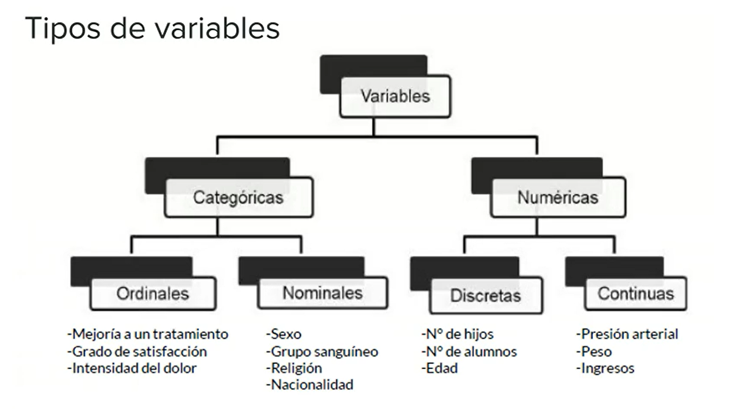

<PRE>
Variables in explanatory data analysis can be classified into different types based on their nature and the kind 
of data they represent. 
The main types of variables are:

1. Categorical Variables:

    Nominal: Qualitative data without any inherent order or ranking (e.g., gender, colors, musical genres).
    
    Ordinal: Qualitative data with a specific order or ranking (e.g., ratings - low, medium, high).

2. Numerical Variables:
    
    Discrete: Quantitative data that take on a countable set of values (e.g., counts, whole numbers).
    
    Continuous: Quantitative data that can take any value within a given range (e.g., height, weight).

3. Time-related Variables:

    Interval: Time or numerical data where the difference between values is consistent, but there's no true zero point 
              (e.g., temperature in Celsius or Fahrenheit).
    
    Ratio: Time or numerical data with a true zero point, where ratios and proportions make sense (e.g., age, income).

4. Derived Variables:
    
    Composite or Derived: Variables created from the original data through calculations or transformations 
                          (e.g., percentages, averages, ratios).

5. Univariate vs. Multivariate Variables:
    
    Univariate: Variables analyzed individually to understand their distributions and characteristics.

    Multivariate: Analysis involving relationships between multiple variables simultaneously (e.g., correlations, regressions).
    
    Understanding the types of variables helps in choosing appropriate statistical techniques and visualization methods during 
    data exploration. 
    For instance,  different visualizations (e.g., histograms, bar plots, box plots) are suitable for different 
    variable types, aiding in better interpretation and analysis.

During an explanatory data analysis, identifying and appropriately handling these variable types are crucial 
for uncovering patterns, relationships, and insights within the data.
<PRE>

**Dataset:**  Hot_Stuff.csv  

**Descripción:** This file provides information about each song's position on that week's Hot 100 singles chart

**Periodo:**  From 01/01/1963 to 31/12/2023

<h1>df_Hot_Stuff</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>url</td><td>URL of the song</td><td>string</td><td>1</td><td></td></tr>
<tr><td>WeekID</td><td>Date of the song</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Week Position</td><td>Position on the chart </td><td>string</td><td>2</td><td></td></tr>
<tr><td>Song</td><td>Title of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Instance</td><td>Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
            appeared for the sixth time).</td><td>string</td><td>2</td><td></td></tr>
<tr><td>Previous Week Position</td><td>URL of the song</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Peak Position</td><td>The highest position reached by a particular song on any given week's chart</td><td>string</td><td>0</td><td></td></tr>
<tr><td>Weeks on Chart</td><td>Represents how many weeks a specific entry has spent on the chart so far</td><td>string</td><td>2</td><td></td></tr>
</table>

 <pre>
 WeekID: The week identifier.
 Song name: The name of the song.
 Performer name: The name of the performer or artist.
 Current week on chart: Represents how many weeks the song has been on the chart at that particular point in time.
 Instance: Indicates whether it is a separate entry for an already listed song (for example, an instance value of 6 means it 
           appeared for the sixth time).
 Previous week position: The position of the song on the previous week's chart.
 Peak Position: The highest position reached by a particular song on any given week's chart.
 Weeks on Chart: Represents how many weeks a specific entry has spent on the chart so far.
</pre>

**Dataset:**  df_genres_20231228_2104_without_column_unknown.csv

**Descripción:** Listado con songID y los 50 géneros musicales de Spotify a True or False

**Periodo:**  De 01/01/1963 a 31/12/2013

<h1>df_genres_modificado</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Multiple names of genres</td><td>False or True depending of the genre that is on the next column</td><td>Binaria</td><td>0</td><td></td></tr>
<tr><td>spotify_genre_list</td><td>List of genres of the song</td><td>Categórica nominal</td><td>2</td><td></td></tr>
</table>

**Dataset:**  Hot_100_Audio_Features.csv  
**Descripción:** This file provides detailed audio features for each song extracted from Spotify using the Spotify Web API.  
**Periodo:**  From 01/01/1963 to 31/12/2023 

<h1>df_Hot_100_Audio_Features</h1>
<table>
<tr><th>Columna/Variable</th><th>Descripción</th><th>Tipo de Variable</th><th>Importancia inicial</th><th>Nota</th></tr>
<tr><td>SongID</td><td>ID of the row</td><td>Indice</td><td>2</td><td></td></tr>
<tr><td>Performer</td><td>Artist or band that performs the song</td><td>Categórica nominal</td><td>0</td><td></td></tr>
<tr><td>Song</td><td>Name of the song</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_genre</td><td>genre according to Spotify</td><td>Categórica</td><td>1</td><td></td></tr>
<tr><td>spotify_track_id</td><td>ID of the track on Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_preview_url</td><td>URL of the song at Spotify</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_duration_ms</td><td>Duration in ms of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>spotify_track_explicit</td><td>Unknown</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_album</td><td>URL of the song</td><td>Categórica</td><td>0</td><td></td></tr>
<tr><td>danceability</td><td>describing how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity.</td><td>Numérica continua</td><td>1</td><td></td></tr>
<tr><td>energy</td><td>representing "a perceptual measure of intensity and activity", based on the track's dynamic range, perceived loudness, timbre, onset rate, and general entropy</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>key</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>loudness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>mode</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>speechiness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>acousticness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>instrumentalness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>liveness</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>valence</td><td>describing "the musical positiveness of the track". Generally speaking, tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while songs with low valence sound more negative (e.g., sad, depressed, angry)</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>tempo</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>time_signature</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
<tr><td>spotify_track_popularity</td><td>CHANGEME</td><td>Categórica</td><td>2</td><td></td></tr>
</table>

<pre>
SongID
Performer
Song
spotify_genre
spotify_track_id
spotify_track_preview_url
spotify_track_duration_ms
spotify_track_explicit
spotify_track_album
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature
spotify_track_popularity
</pre>

In [ ]:
df_tipificacion_df_Hot_Stuff = pd.DataFrame([df_Hot_Stuff.nunique(), df_Hot_Stuff.nunique()/len(df_Hot_Stuff) * 100, df_Hot_Stuff.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Stuff["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Stuff.loc[df_tipificacion_df_Hot_Stuff["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Stuff

In [ ]:

df_tipificacion_df_Hot_100_Audio_Features_genres_EDA = pd.DataFrame([df_Hot_100_Audio_Features_genres_EDA.nunique(), df_Hot_100_Audio_Features_genres_EDA.nunique()/len(df_Hot_100_Audio_Features_genres_EDA) * 100, df_Hot_100_Audio_Features_genres_EDA.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA.loc[df_tipificacion_df_Hot_100_Audio_Features_genres_EDA["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_100_Audio_Features_genres_EDA

In [ ]:
df_tipificacion_df_Hot_Audio_Features= pd.DataFrame([df_Hot_100_Audio_Features.nunique(), df_Hot_100_Audio_Features.nunique()/len(df_Hot_100_Audio_Features) * 100, df_Hot_100_Audio_Features.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion_df_Hot_Audio_Features
df_tipificacion_df_Hot_Audio_Features["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_df_Hot_Audio_Features.loc[df_tipificacion_df_Hot_Audio_Features["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_df_Hot_Audio_Features

In [ ]:
# Siguiente dataset...
# df_2.head()
df_Hot_100_Audio_Features_genres_EDA = df_genres_modificado.copy()
genres=['mellow_gold','soft_rock','adult_standards','brill_building_pop','rock','dance_pop','pop','soul','motown','pop_rap','rap','folk_rock','album_rock','classic_rock','quiet_storm','hip_hop','rock-and-roll','bubblegum_pop','funk','classic_soul','urban_contemporary','country','r&b','disco','post-teen_pop','new_wave_pop','contemporary_country','country_rock','country_road','southern_soul','trap','folk','pop_rock','southern_hip_hop','hard_rock','lounge','hip_pop','rockabilly','rhythm_and_blues','art_rock','dance_rock','merseybeat','new_jack_swing','easy_listening','doo-wop','classic_uk_pop','psychedelic_rock','gangster_rap','roots_rock']
genre_counts = df_Hot_100_Audio_Features_genres_EDA[genres].sum().reset_index()
genre_counts.columns = ['Genre', 'Count']
#df_genres_totals = pd.DataFrame(dict_genres_totals)
genre_counts
#in groups of five years

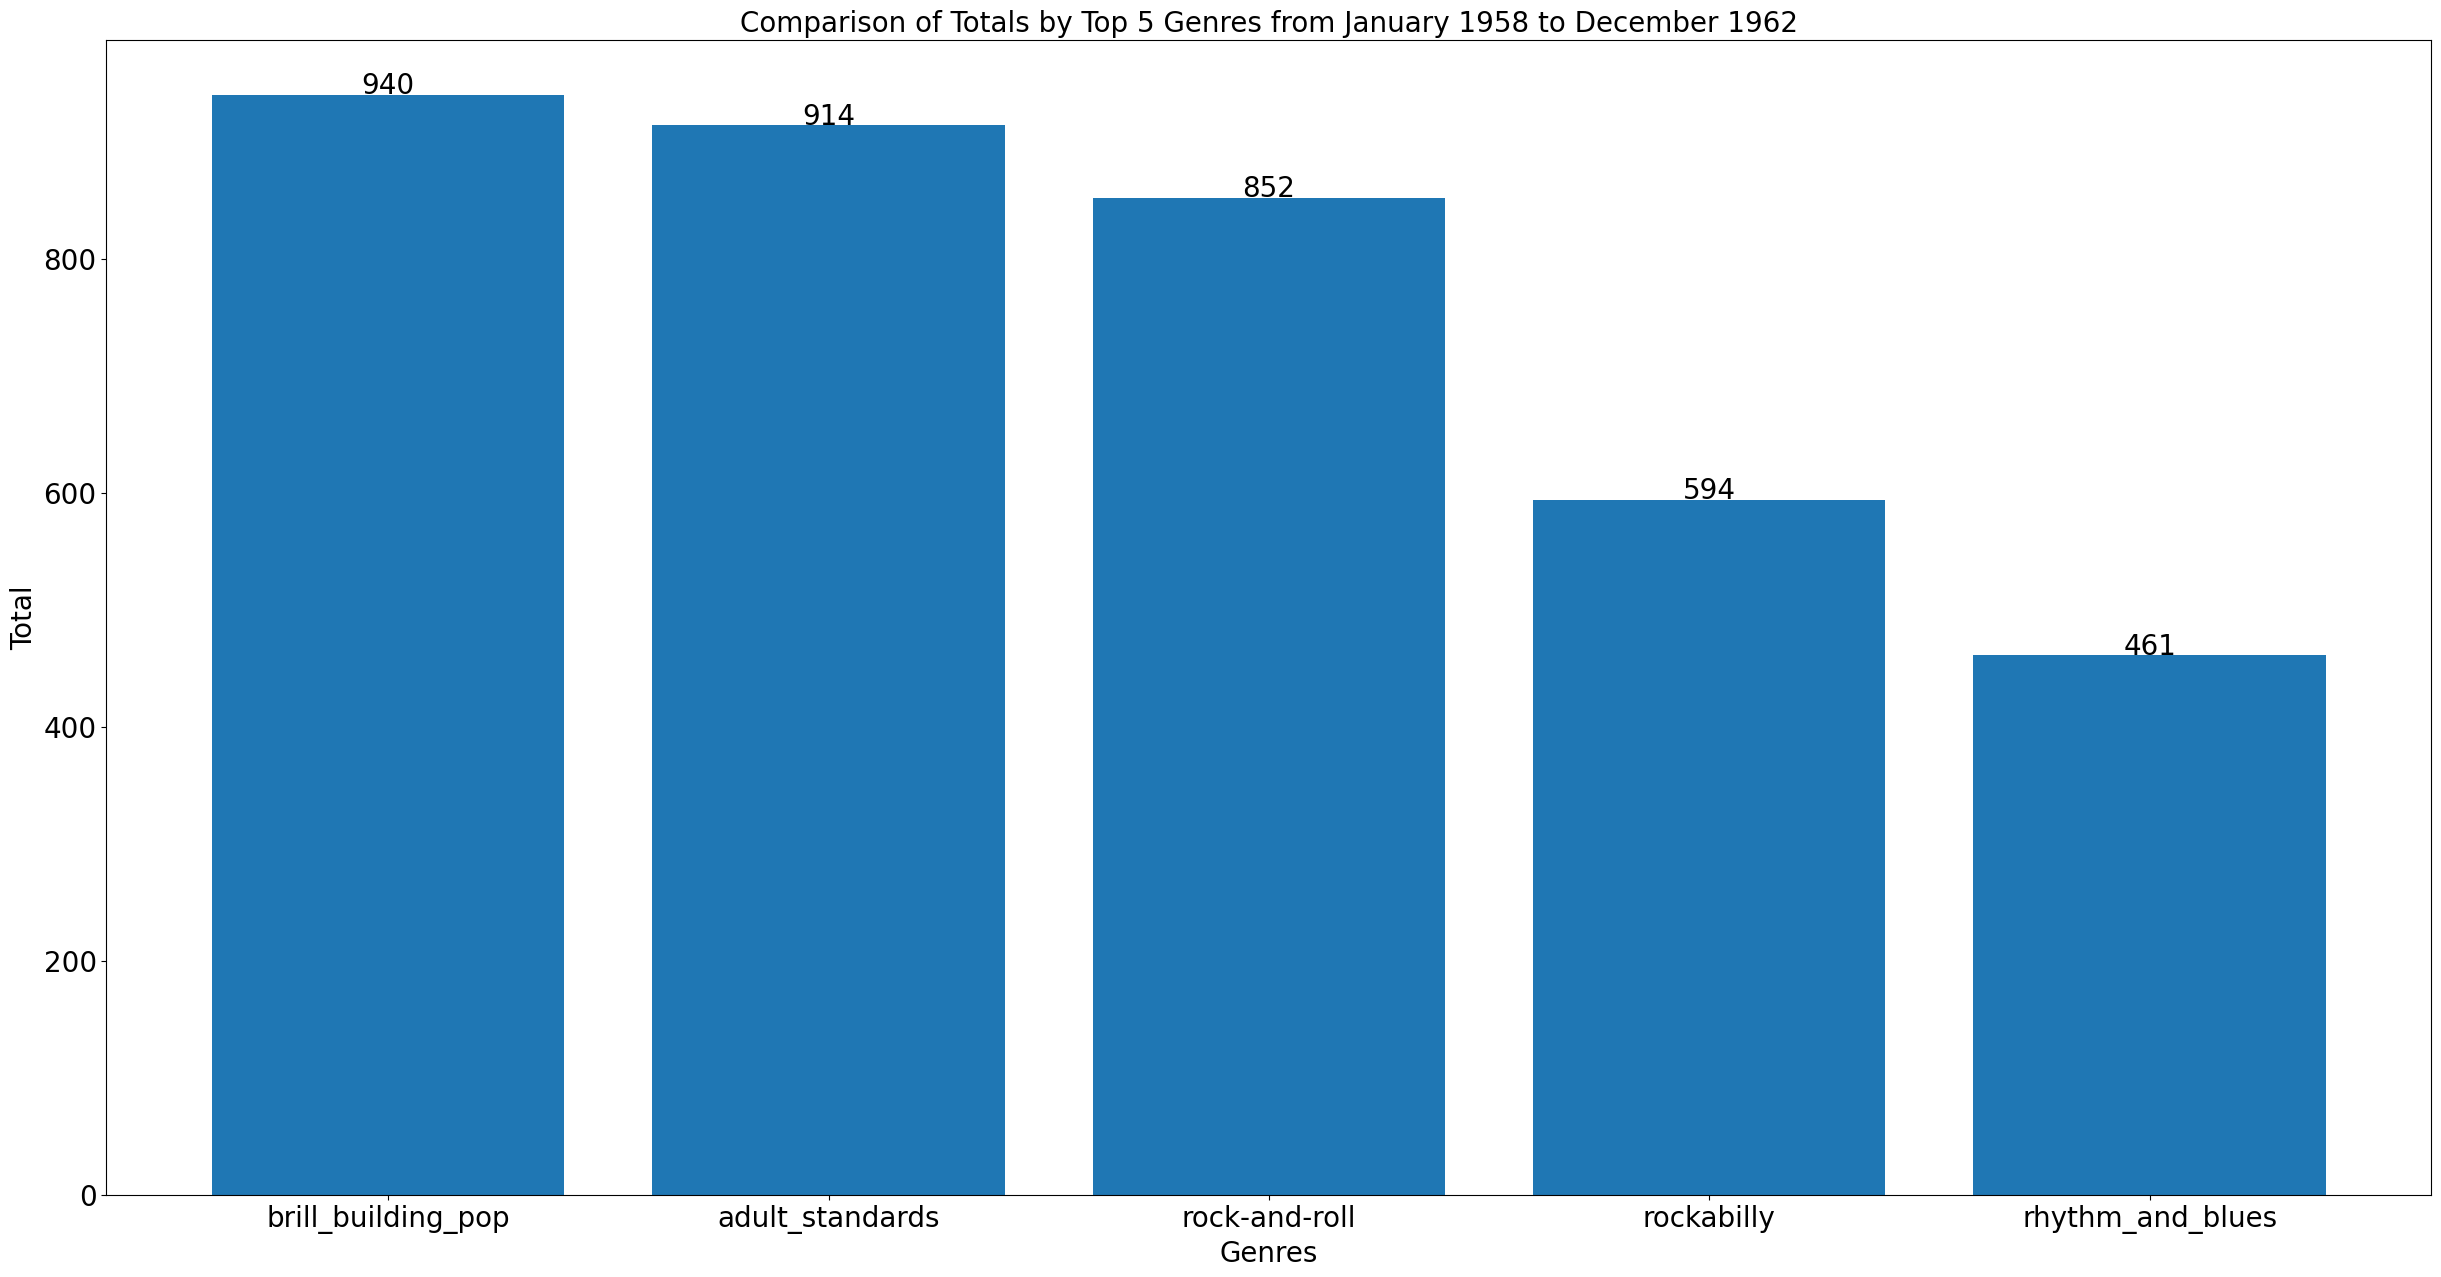

brill_building_pop has this performers with a TOP 1 song:	
The Everly Brothers with song ('til) I Kissed You
, Paul Anka with song (All of a Sudden) My Heart Sings
, Chubby Checker with song (Dance The) Mess Around
, Connie Francis with song (He's My) Dreamboat
, The Fleetwoods with song (He's) The Great Impostor
, Gene Chandler with song (I'm Just A) Fool For You
, The Drifters with song (If You Cry) True Love, True Love
, Roy Orbison with song (Say) You're My Girl
, Brian Hyland with song (The Clickity Clack Song) Four Little Heels
, Bobby Vee with song (There'll Come A Day When) Ev'ry Little Bit Hurts


adult_standards has this performers with a TOP 1 song:	
The Everly Brothers with song ('til) I Kissed You
, Paul Anka with song (All of a Sudden) My Heart Sings
, Chubby Checker with song (Dance The) Mess Around
, Connie Francis with song (He's My) Dreamboat
, The Fleetwoods with song (He's) The Great Impostor
, The Drifters with song (If You Cry) True Love, True Love
, Roy Orbison w

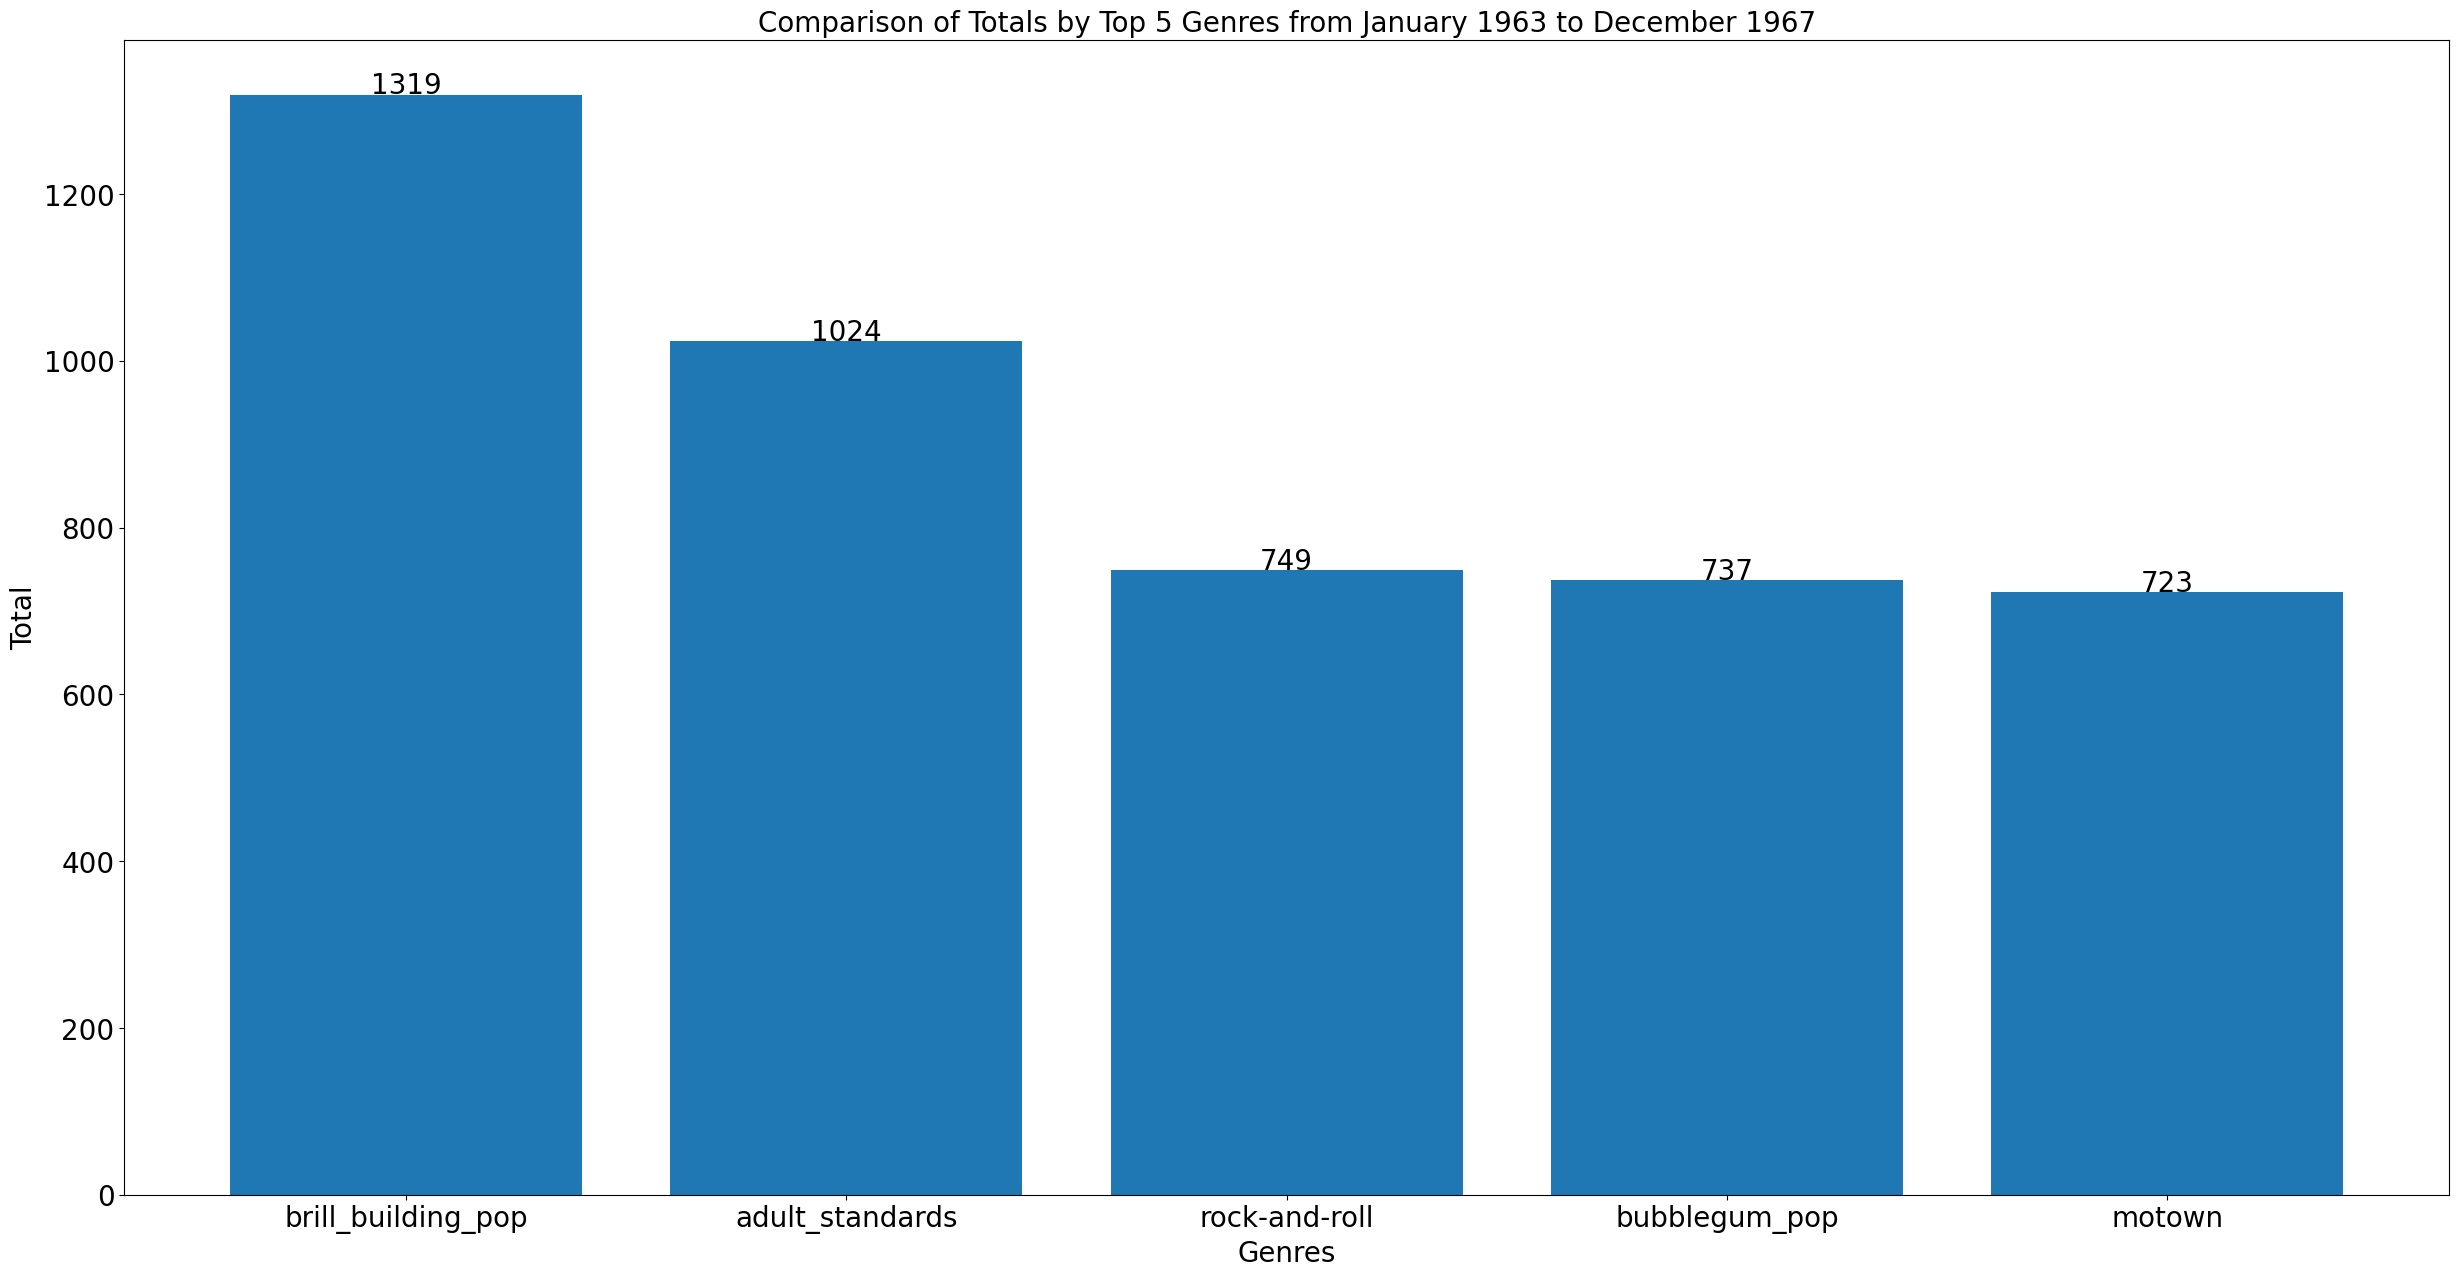

brill_building_pop has this performers with a TOP 1 song:	
Steve Lawrence with song (I Don't Care) Only Love Me
, The Temptations with song (I Know) I'm Losing You
, Johnny Rivers with song (I Washed My Hands In) Muddy Water
, The Monkees with song (I'm Not Your) Steppin' Stone
, Little Peggy March with song (I'm Watching) Every Little Move You Make
, Four Tops with song (It's The Way) Nature Planned It
, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Picture
, The McCoys with song (You Make Me Feel) So Good
, The Righteous Brothers with song (You're My) Soul And Inspiration
, Nancy Sinatra with song 100 Years


adult_standards has this performers with a TOP 1 song:	
Steve Lawrence with song (I Don't Care) Only Love Me
, The Temptations with song (I Know) I'm Losing You
, Four Tops with song (It's The Way) Nature Planned It
, Dean Martin with song (Open Up The Door) Let The Good Times In
, Gary Lewis And The Playboys with song (You Don't Have To) Paint Me A Pictur

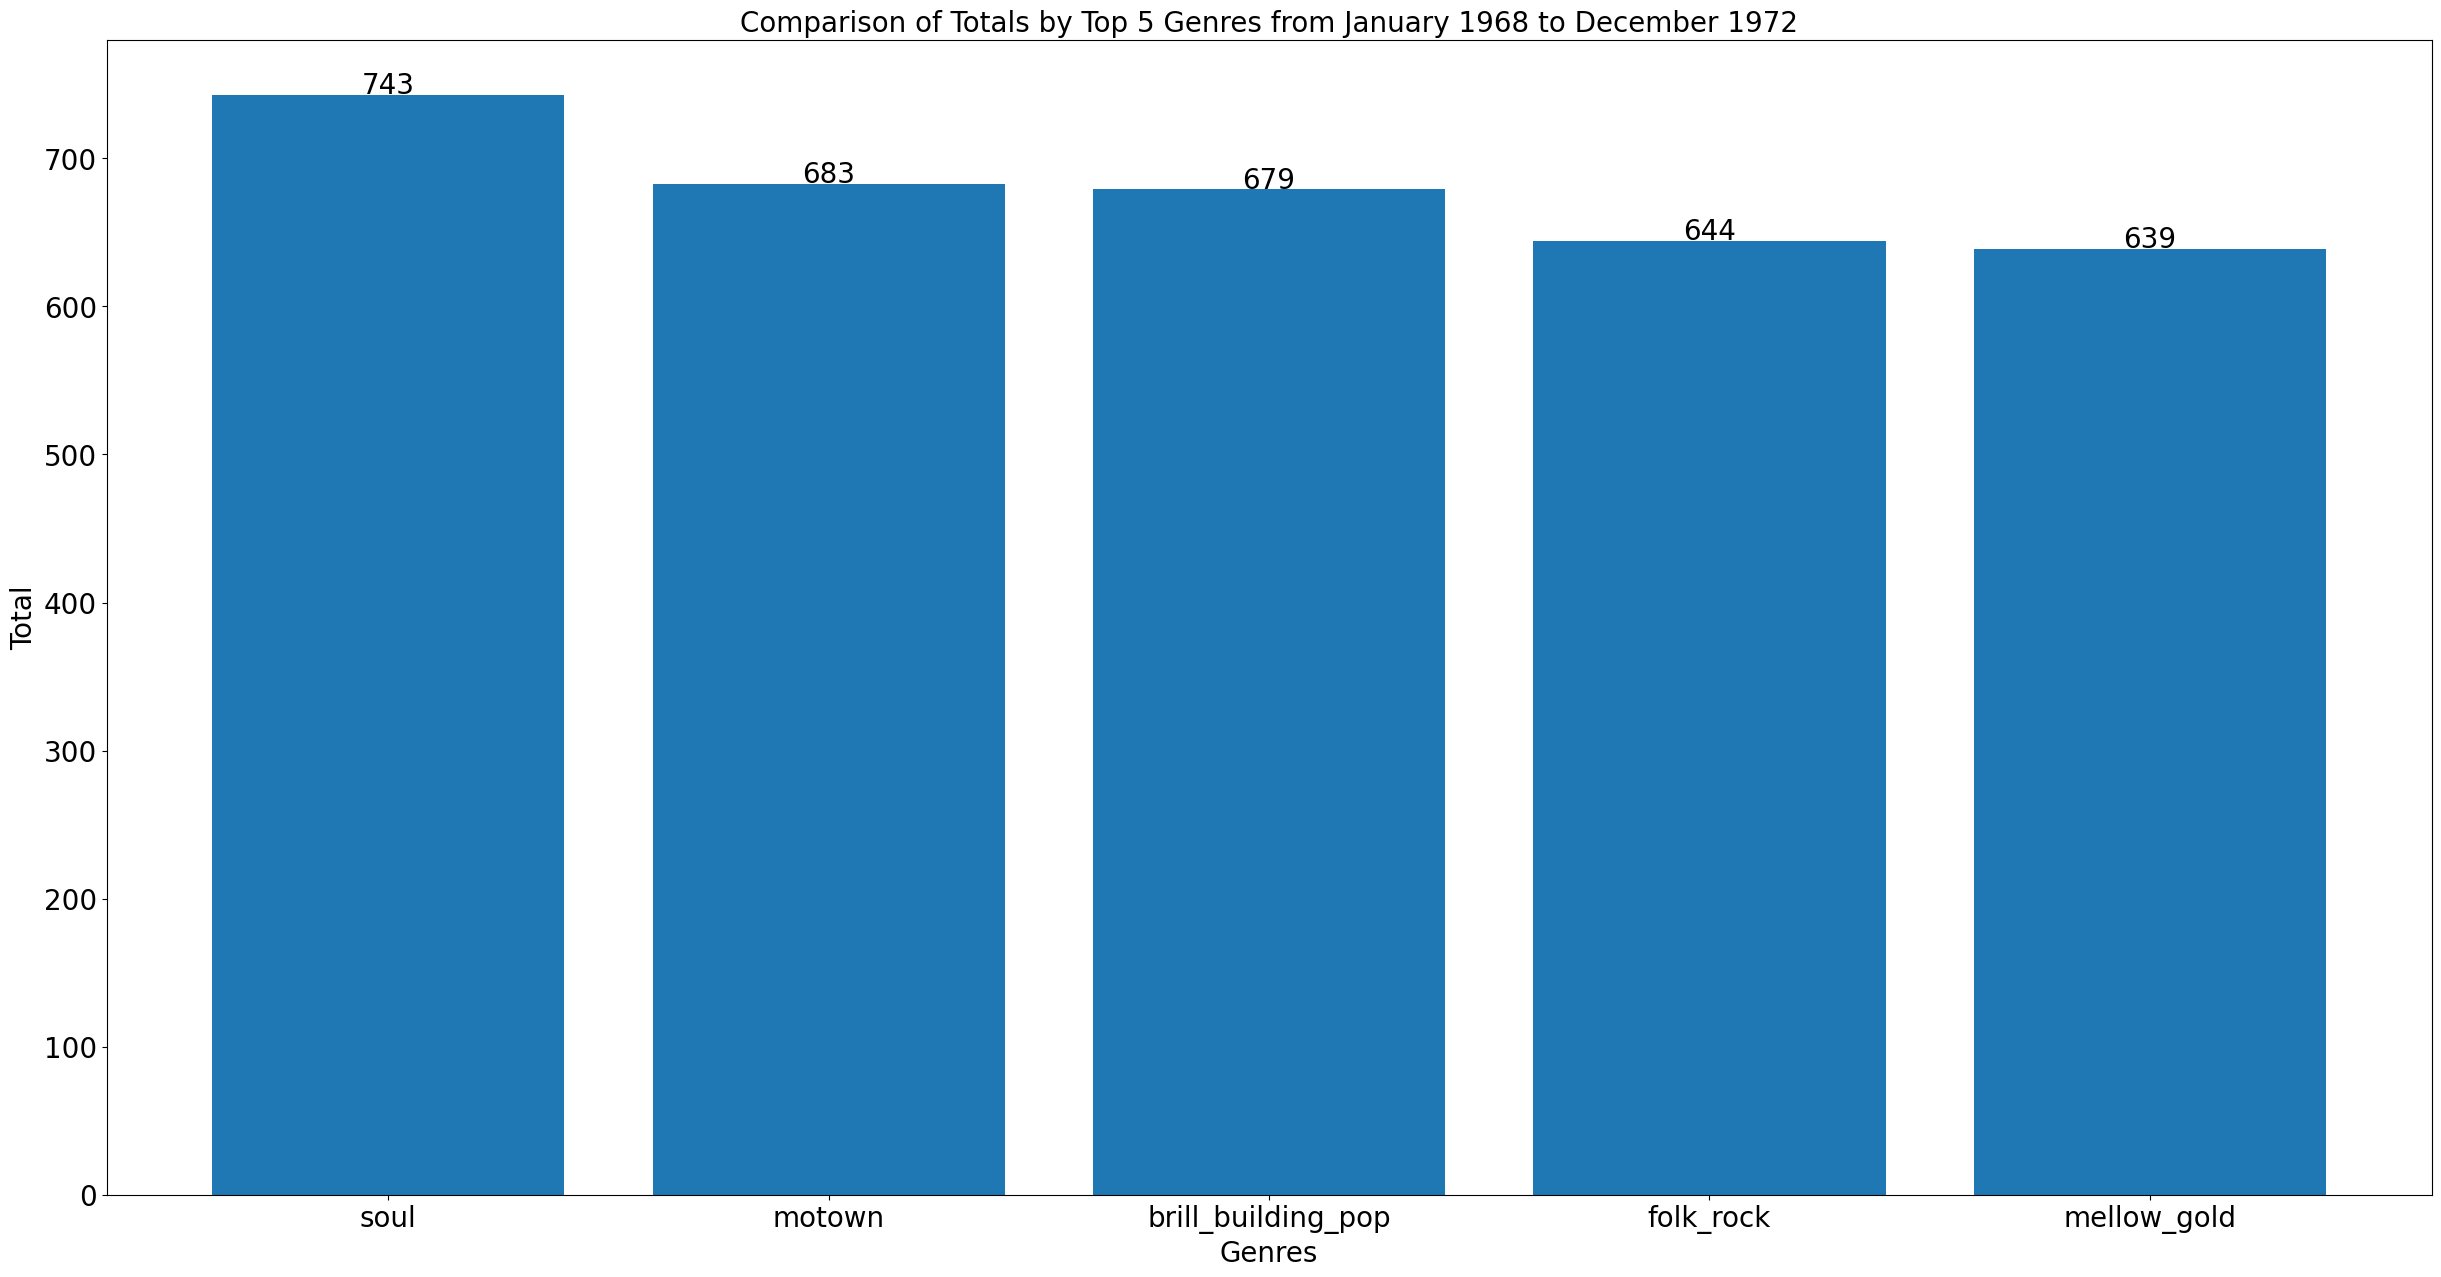

soul has this performers with a TOP 1 song:	
Isaac Hayes with song "Joy" Pt. I
, The Chi-lites with song (For God's Sake) Give More Power To The People
, The Temptations with song (I Know) I'm Losing You
, Otis Redding with song (Sittin' On) The Dock Of The Bay
, Archie Bell & The Drells with song A World Without Music
, Jackson 5 with song ABC
, Smokey Robinson & The Miracles with song Abraham, Martin And John
, Edwin Starr with song Abyssinia Jones
, Marvin Gaye with song After The Dance
, Diana Ross with song Ain't No Mountain High Enough


motown has this performers with a TOP 1 song:	
Isaac Hayes with song "Joy" Pt. I
, The Chi-lites with song (For God's Sake) Give More Power To The People
, The Temptations with song (I Know) I'm Losing You
, The 5th Dimension with song (Last Night) I Didn't Get To Sleep At All
, The Rascals with song A Beautiful Morning
, Archie Bell & The Drells with song A World Without Music
, Jackson 5 with song ABC
, Smokey Robinson & The Miracles with song 

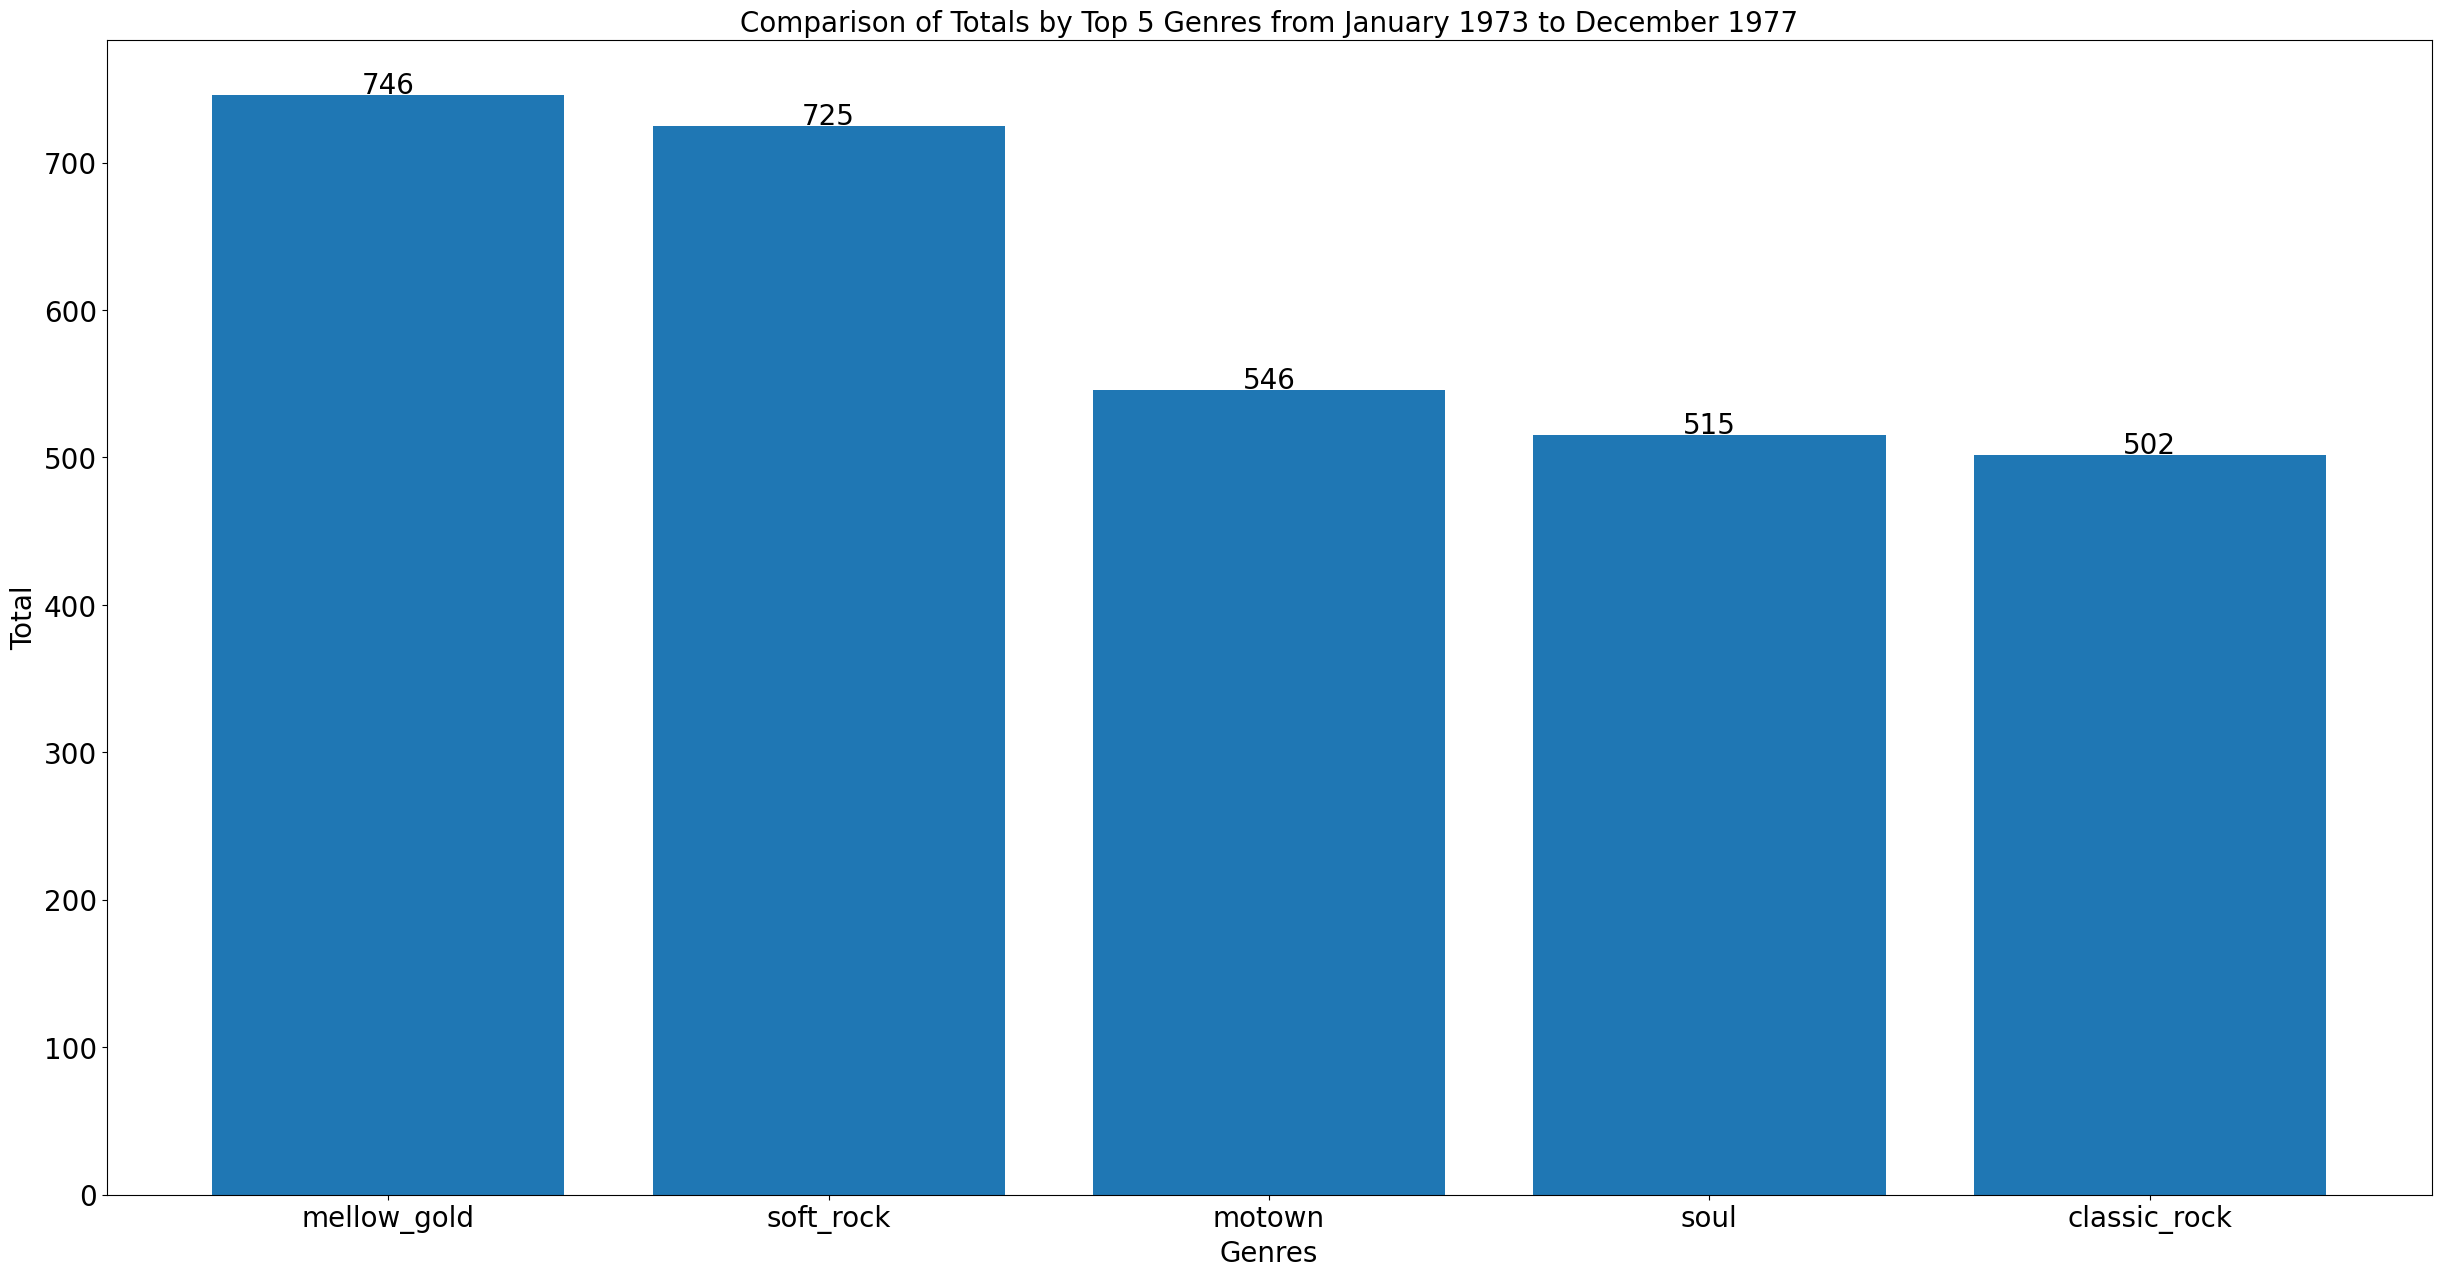

mellow_gold has this performers with a TOP 1 song:	
B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song
, Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, Elton John with song (Sartorial Eloquence) Don't Ya Wanna Play This Game No More?
, Linda Ronstadt with song (She's A) Very Lovely Woman/The Long Way Around
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Carpenters with song (They Long To Be) Close To You
, Paul Simon with song 50 Ways To Leave Your Lover
, Ringo Starr with song A Dose Of Rock 'N' Roll
, America with song A Horse With No Name


soft_rock has this performers with a TOP 1 song:	
B.J. Thomas with song (Hey Won't You Play) Another Somebody Done Somebody Wrong Song
, Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty
, Linda Ronstadt with song (She's A

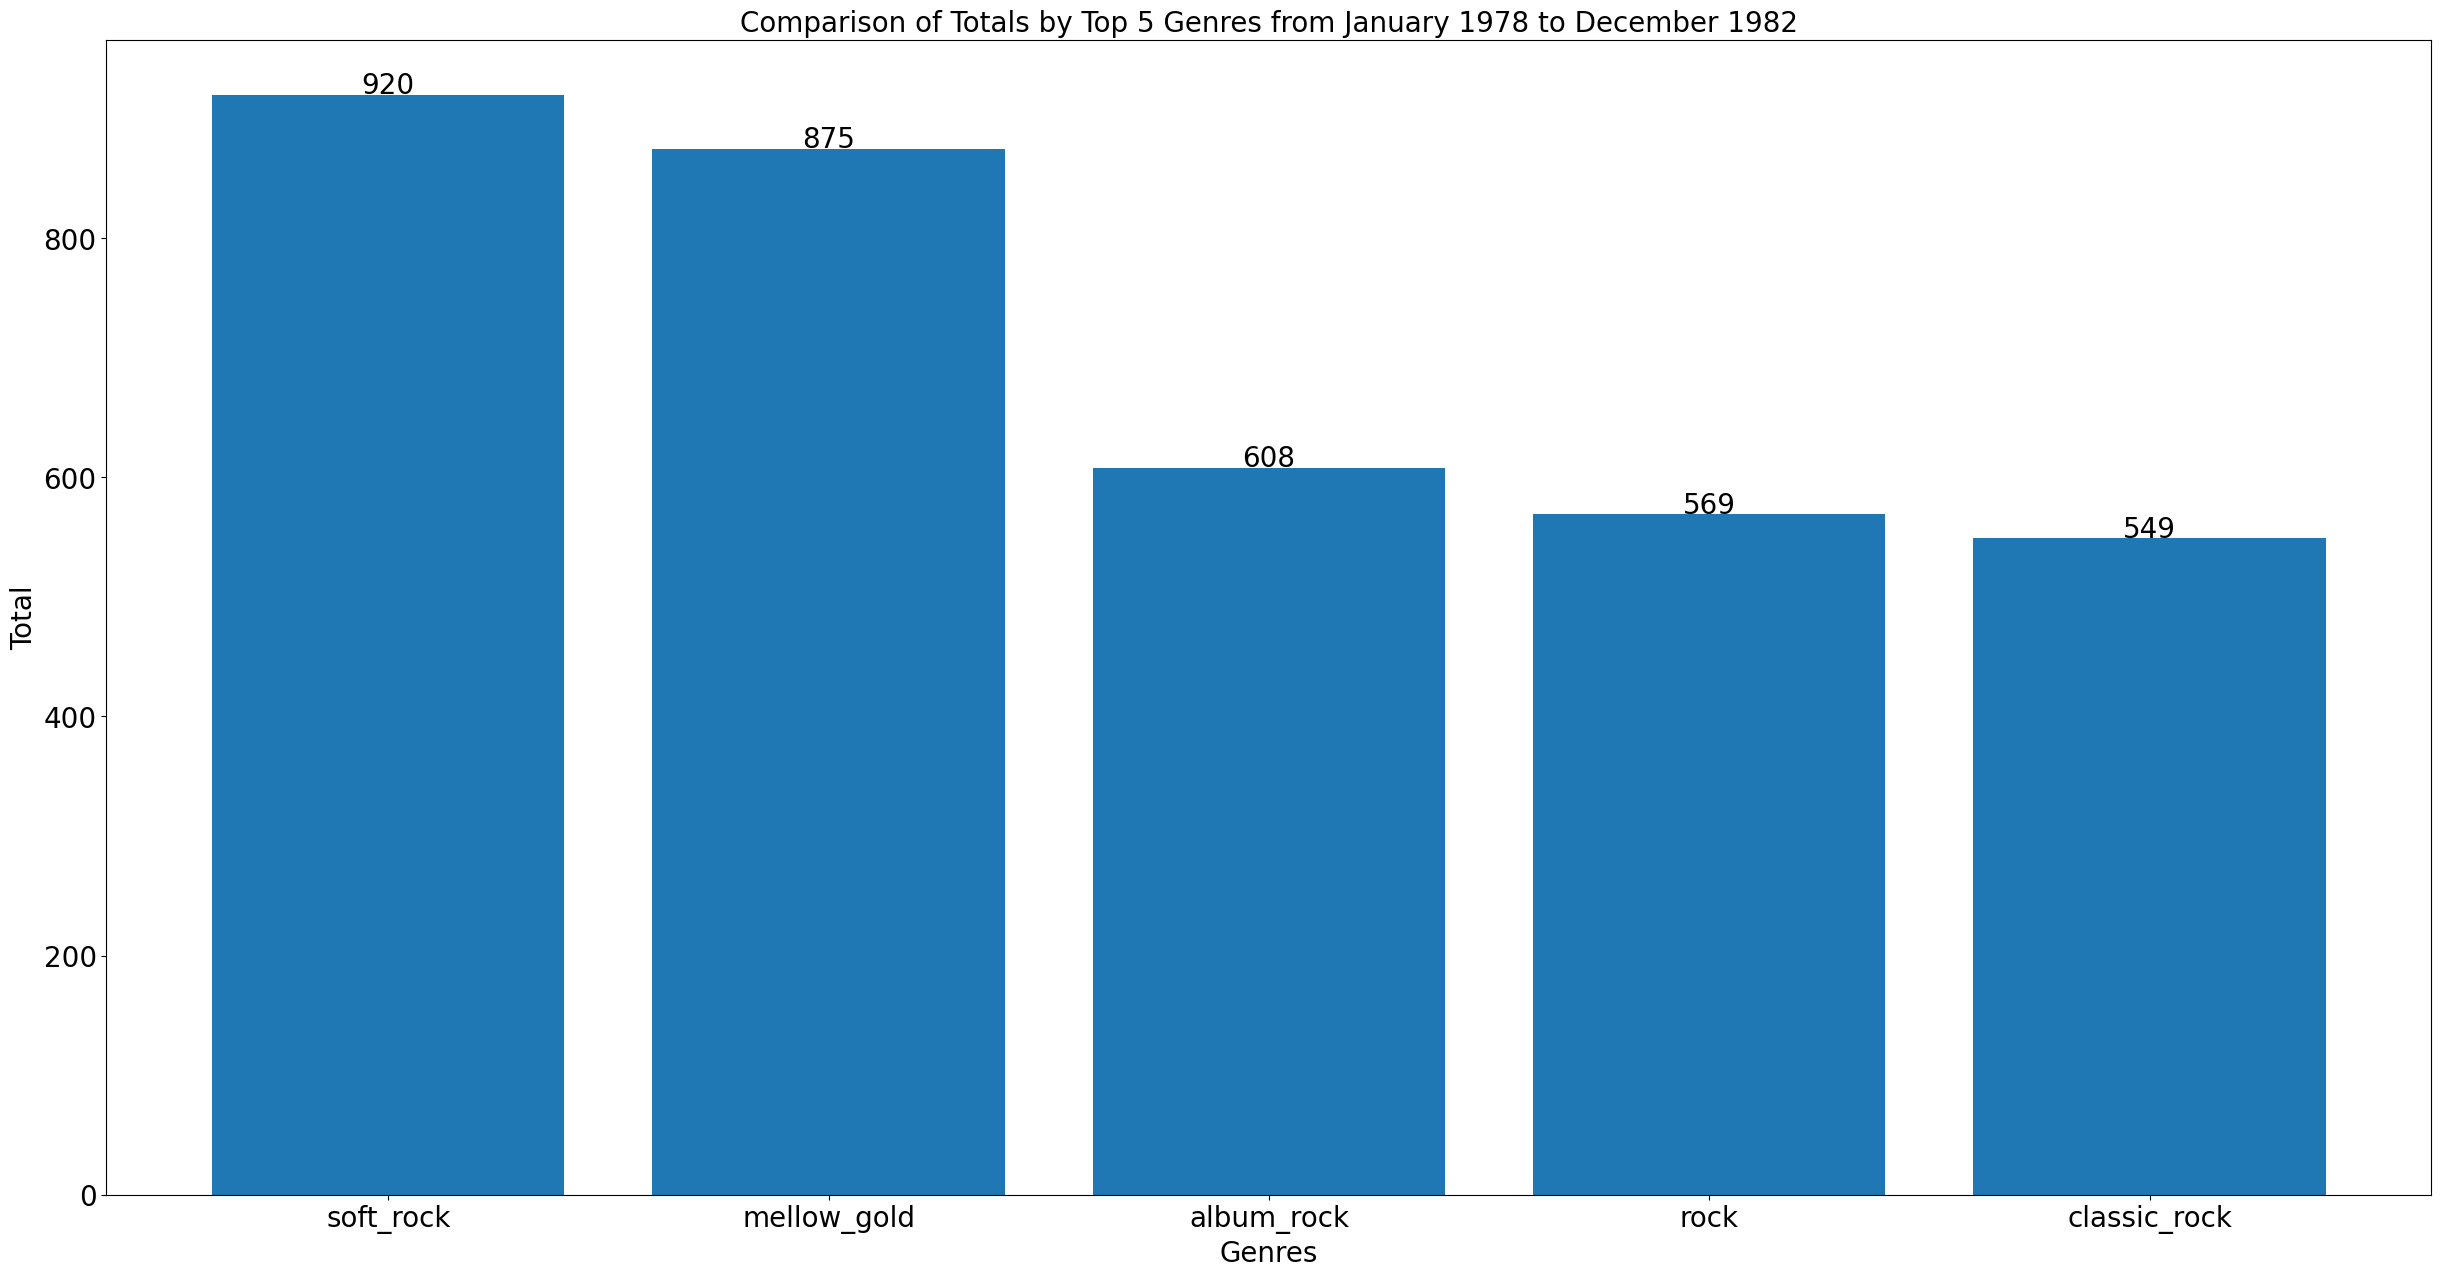

soft_rock has this performers with a TOP 1 song:	
Chicago with song (i've Been) Searchin' So Long
, Andy Gibb with song (Love Is) Thicker Than Water
, KC And The Sunshine Band with song (Shake, Shake, Shake) Shake Your Booty
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Christopher Cross with song A Chance For Heaven
, Anne Murray with song A Little Good News
, Olivia Newton-John with song A Little More Love
, Kenny Rogers with song A Love Song
, Billy Joel with song A Matter Of Trust
, Kim Carnes with song Abadabadango


mellow_gold has this performers with a TOP 1 song:	
Chicago with song (i've Been) Searchin' So Long
, John Lennon with song (Just Like) Starting Over
, Andy Gibb with song (Love Is) Thicker Than Water
, Bee Gees with song (The Lights Went Out In) Massachusetts
, Christopher Cross with song A Chance For Heaven
, Anne Murray with song A Little Good News
, Olivia Newton-John with song A Little More Love
, Kenny Rogers with song A Love Song
, Billy Joel wi

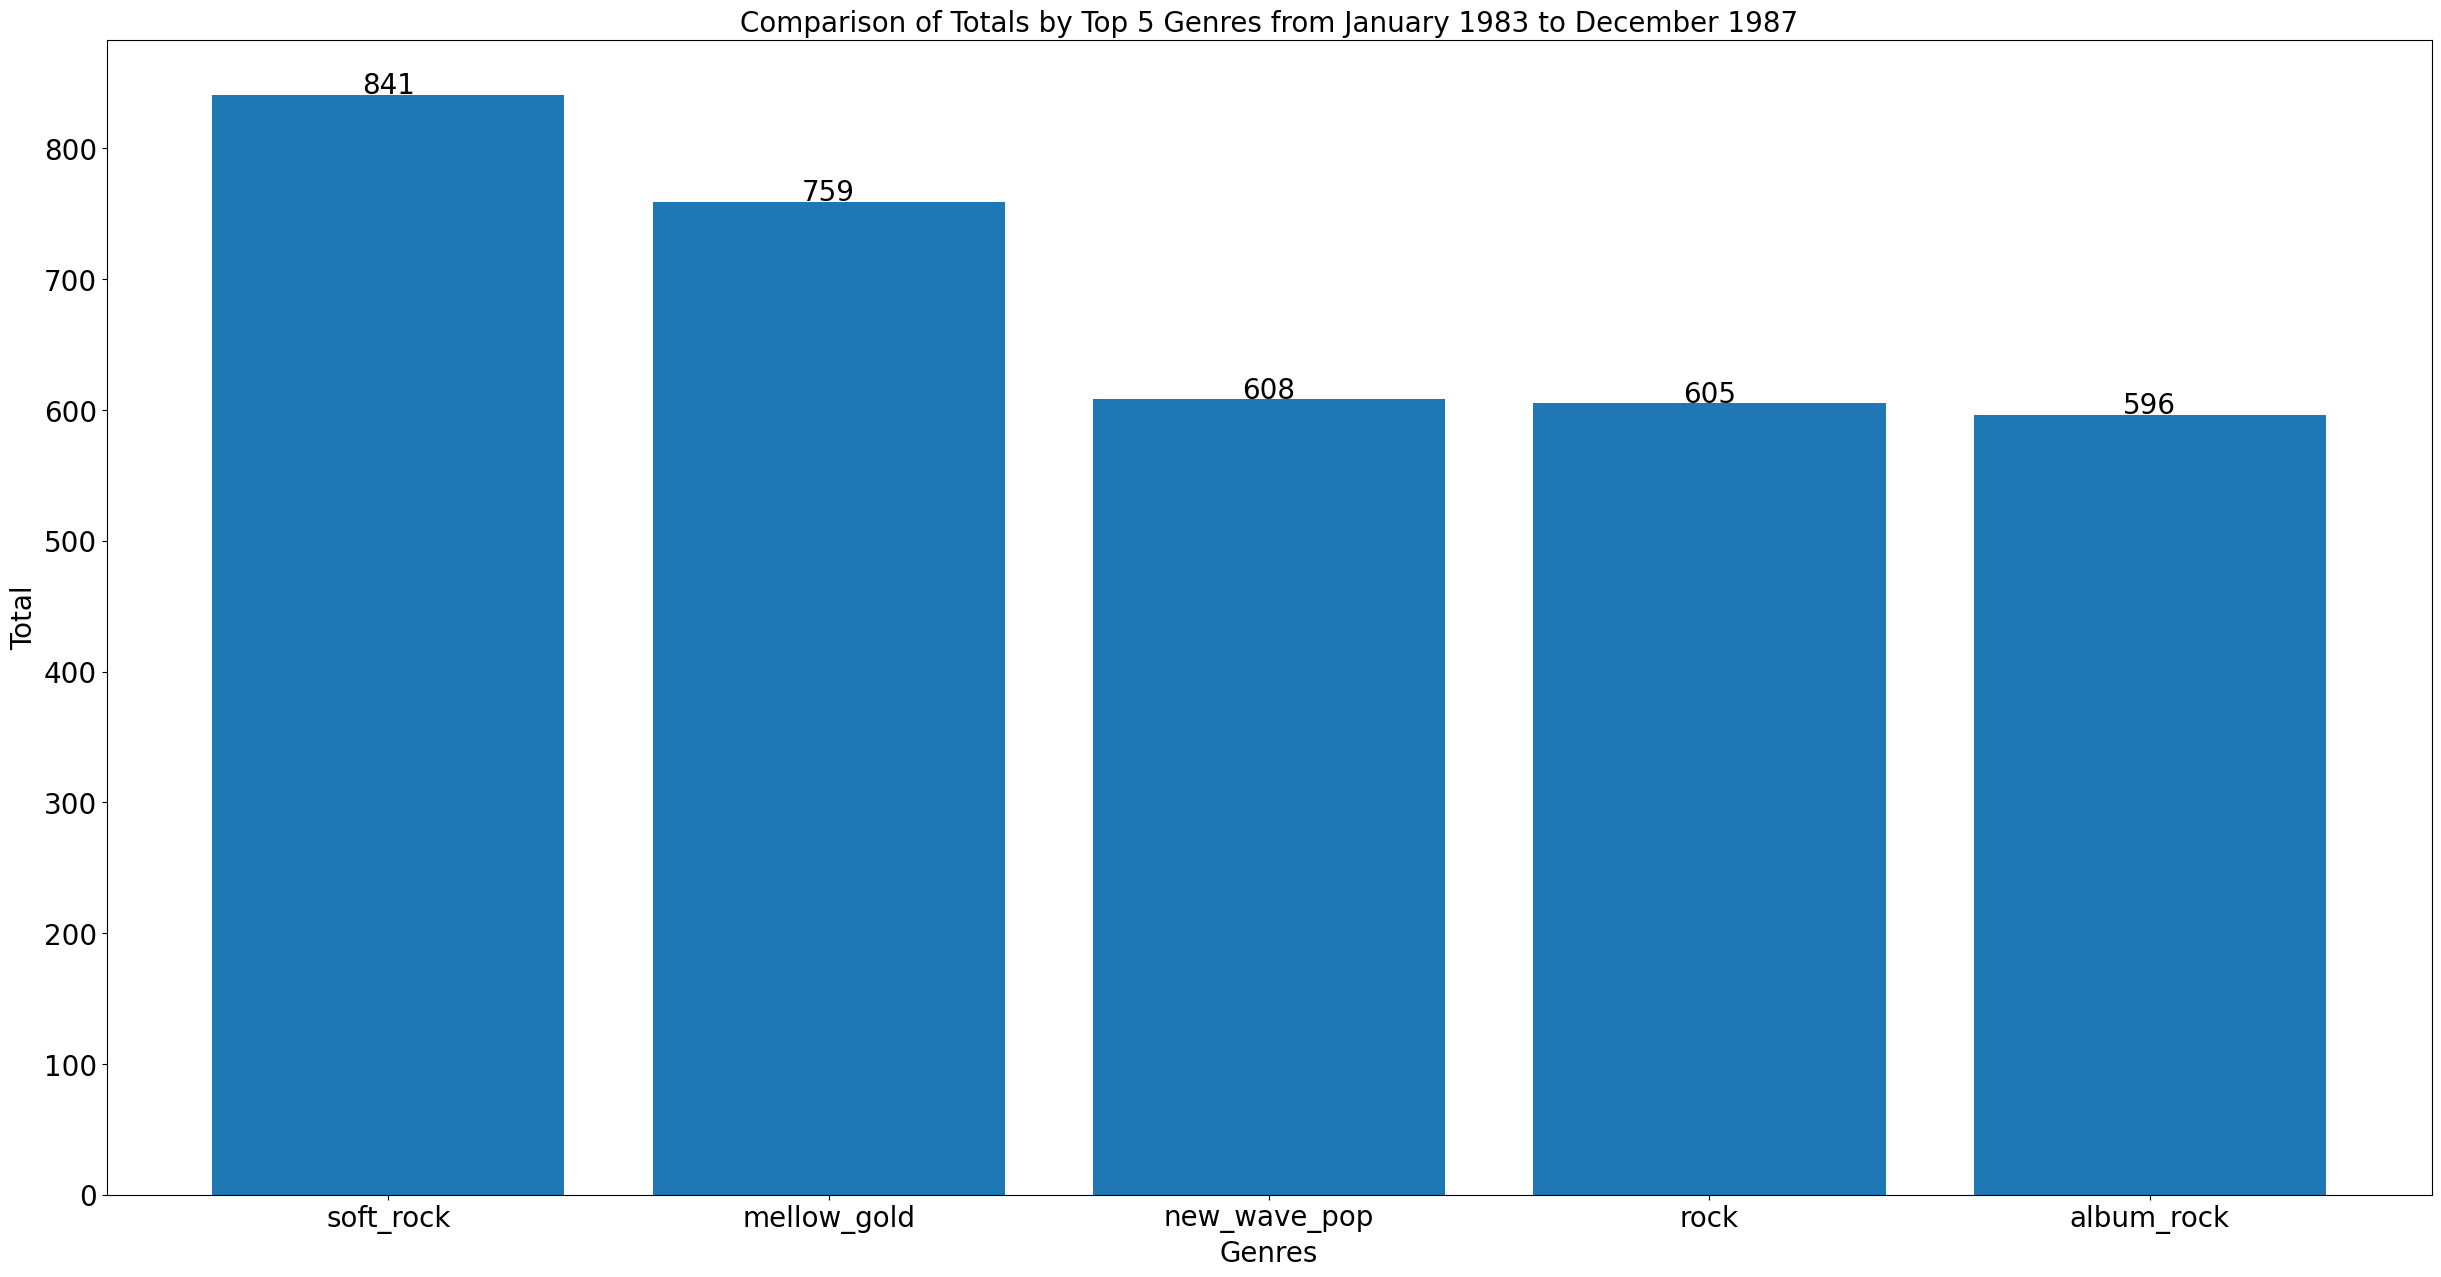

soft_rock has this performers with a TOP 1 song:	
Cutting Crew with song (Between A) Rock And A Hard Place
, Bryan Adams with song (Everything I Do) I Do It For You
, Bill Medley & Jennifer Warnes with song (I've Had) The Time Of My Life
, Duran Duran with song (Reach Up For The) Sunrise
, Huey Lewis & The News with song (She's) Some Kind Of Wonderful
, Toto with song 99
, George Michael with song A Different Corner
, Boston with song A Man I'll Never Be
, Billy Joel with song A Matter Of Trust
, Bananarama with song A Trick Of The Night


mellow_gold has this performers with a TOP 1 song:	
Cutting Crew with song (Between A) Rock And A Hard Place
, Bryan Adams with song (Everything I Do) I Do It For You
, Huey Lewis & The News with song (She's) Some Kind Of Wonderful
, Toto with song 99
, Boston with song A Man I'll Never Be
, Billy Joel with song A Matter Of Trust
, Genesis with song Abacab
, Bruce Hornsby & The Range with song Across The River
, Robert Palmer with song Addicted To Lo

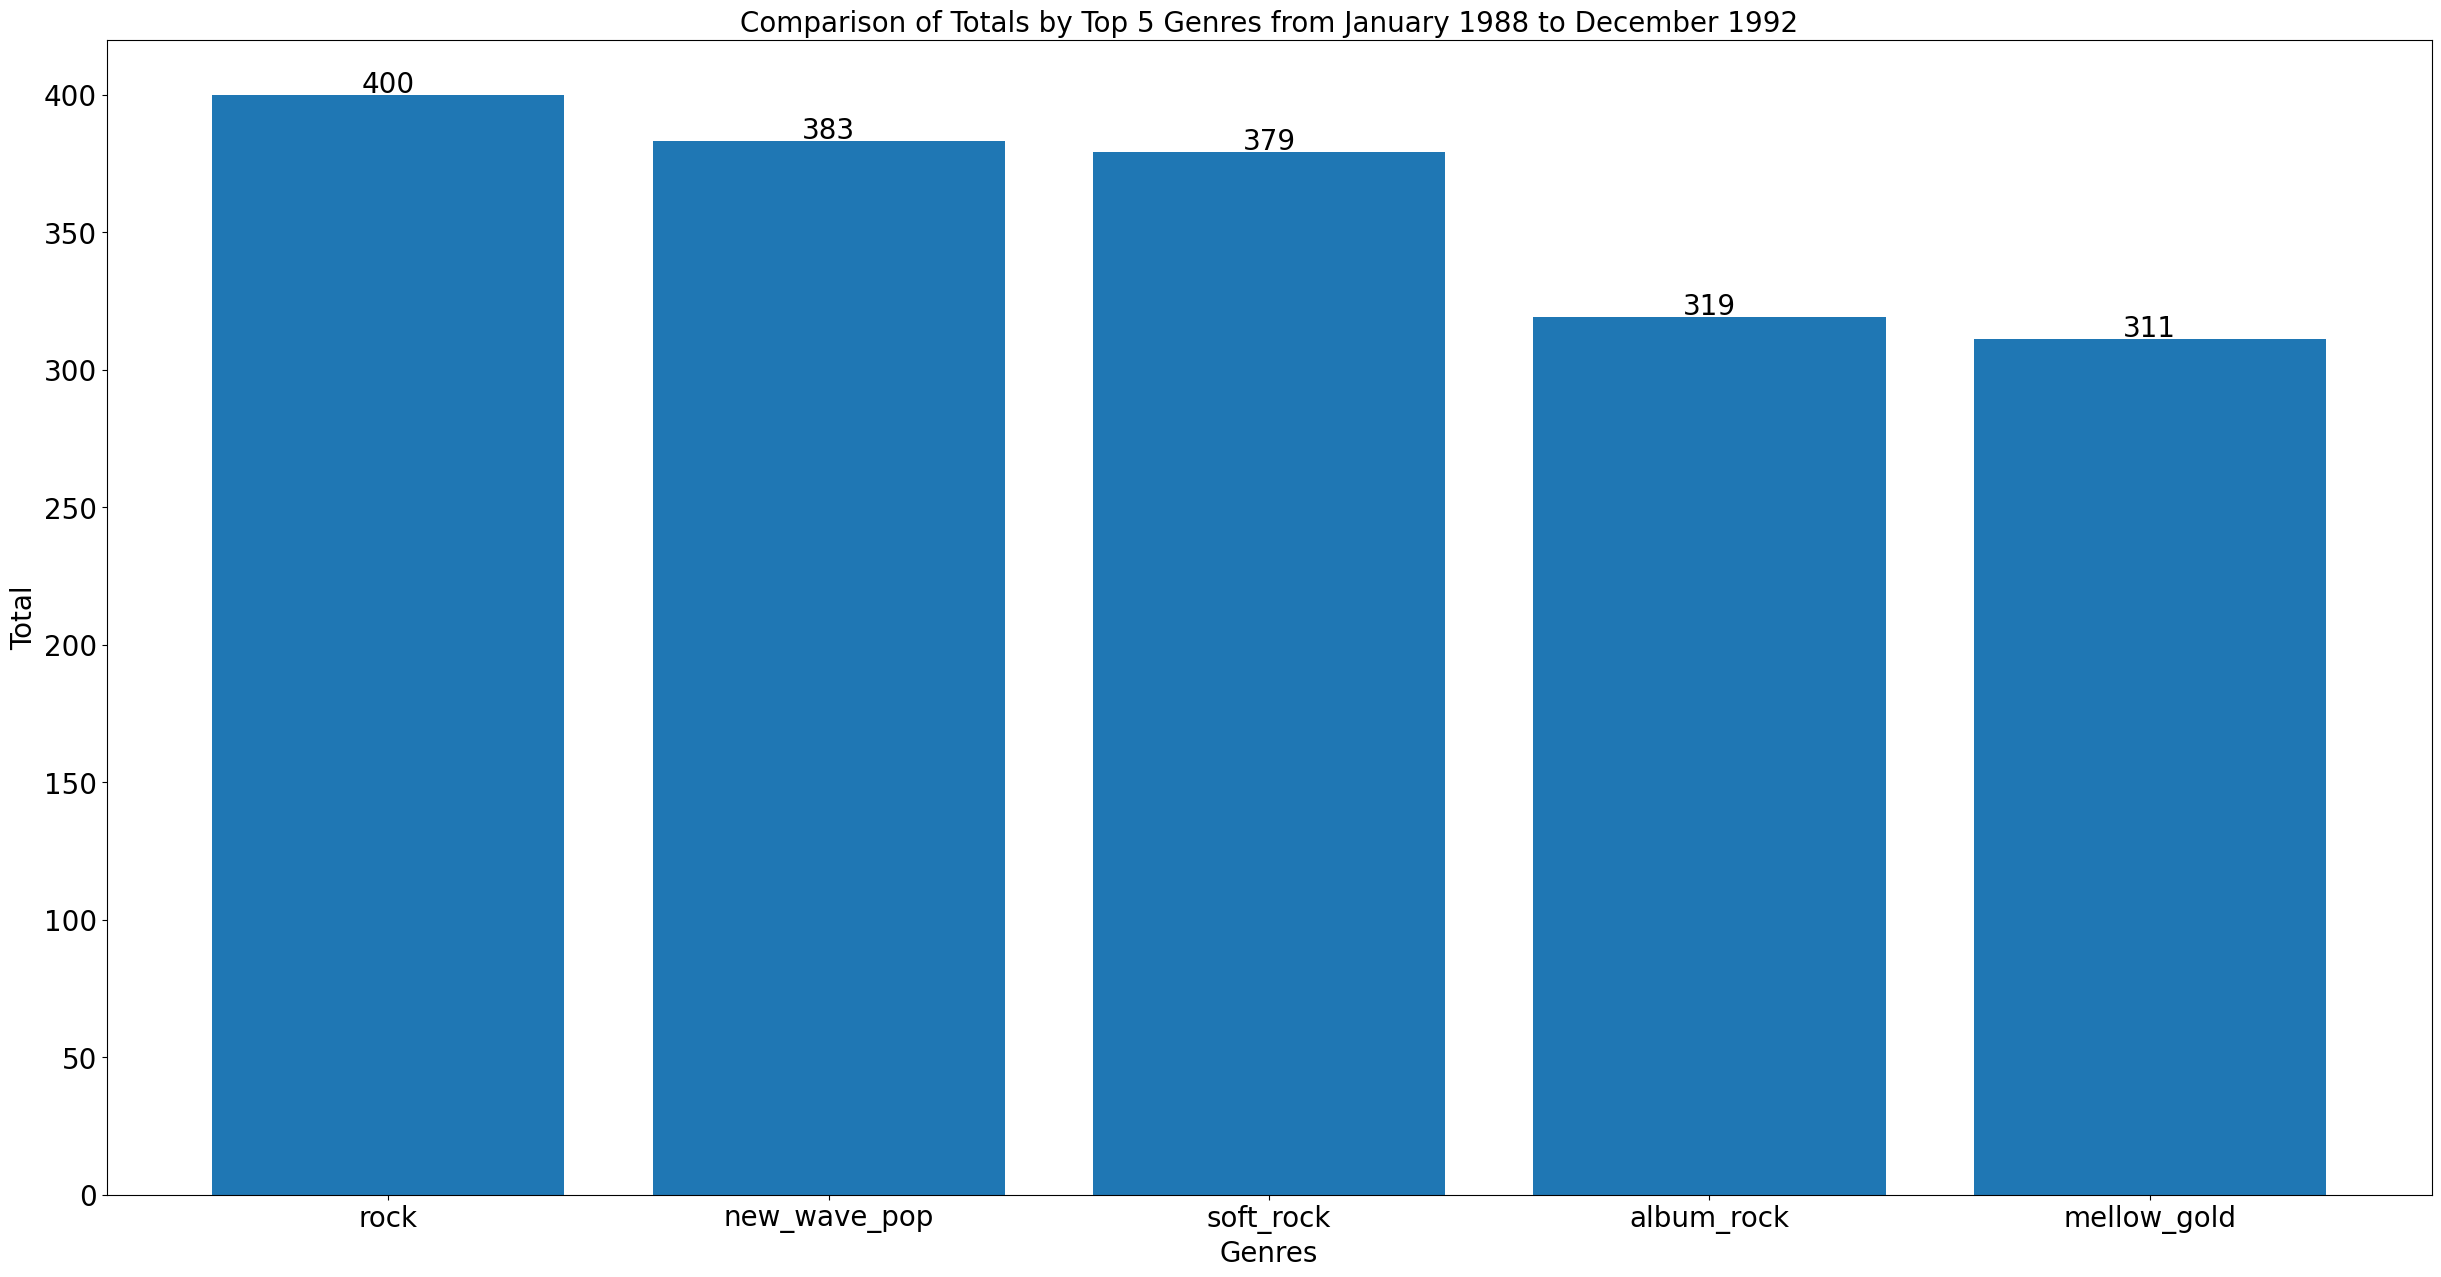

rock has this performers with a TOP 1 song:	
Bryan Adams with song (Everything I Do) I Do It For You
, Chicago with song (i've Been) Searchin' So Long
, Bon Jovi with song (You Want To) Make A Memory
, The Beach Boys with song 409
, Billy Joel with song A Matter Of Trust
, Mr. Big with song Ain't Seen Love Like That
, Cheap Trick with song Ain't That A Shame
, George Harrison with song All Those Years Ago
, Def Leppard with song Animal
, Steve Winwood with song Arc Of A Diver


new_wave_pop has this performers with a TOP 1 song:	
Paula Abdul with song (It's Just) The Way That You Love Me
, Gloria Estefan & Miami Sound Machine with song 01-02-03
, George Michael with song A Different Corner
, Cheap Trick with song Ain't That A Shame
, Rick Astley with song Ain't Too Proud To Beg
, Mike + The Mechanics with song All I Need Is A Miracle
, Bette Midler with song All I Need To Know
, Tiffany with song All This Time
, Roxette with song Almost Unreal (From "Super Mario Bros.")
, Gloria Estefa

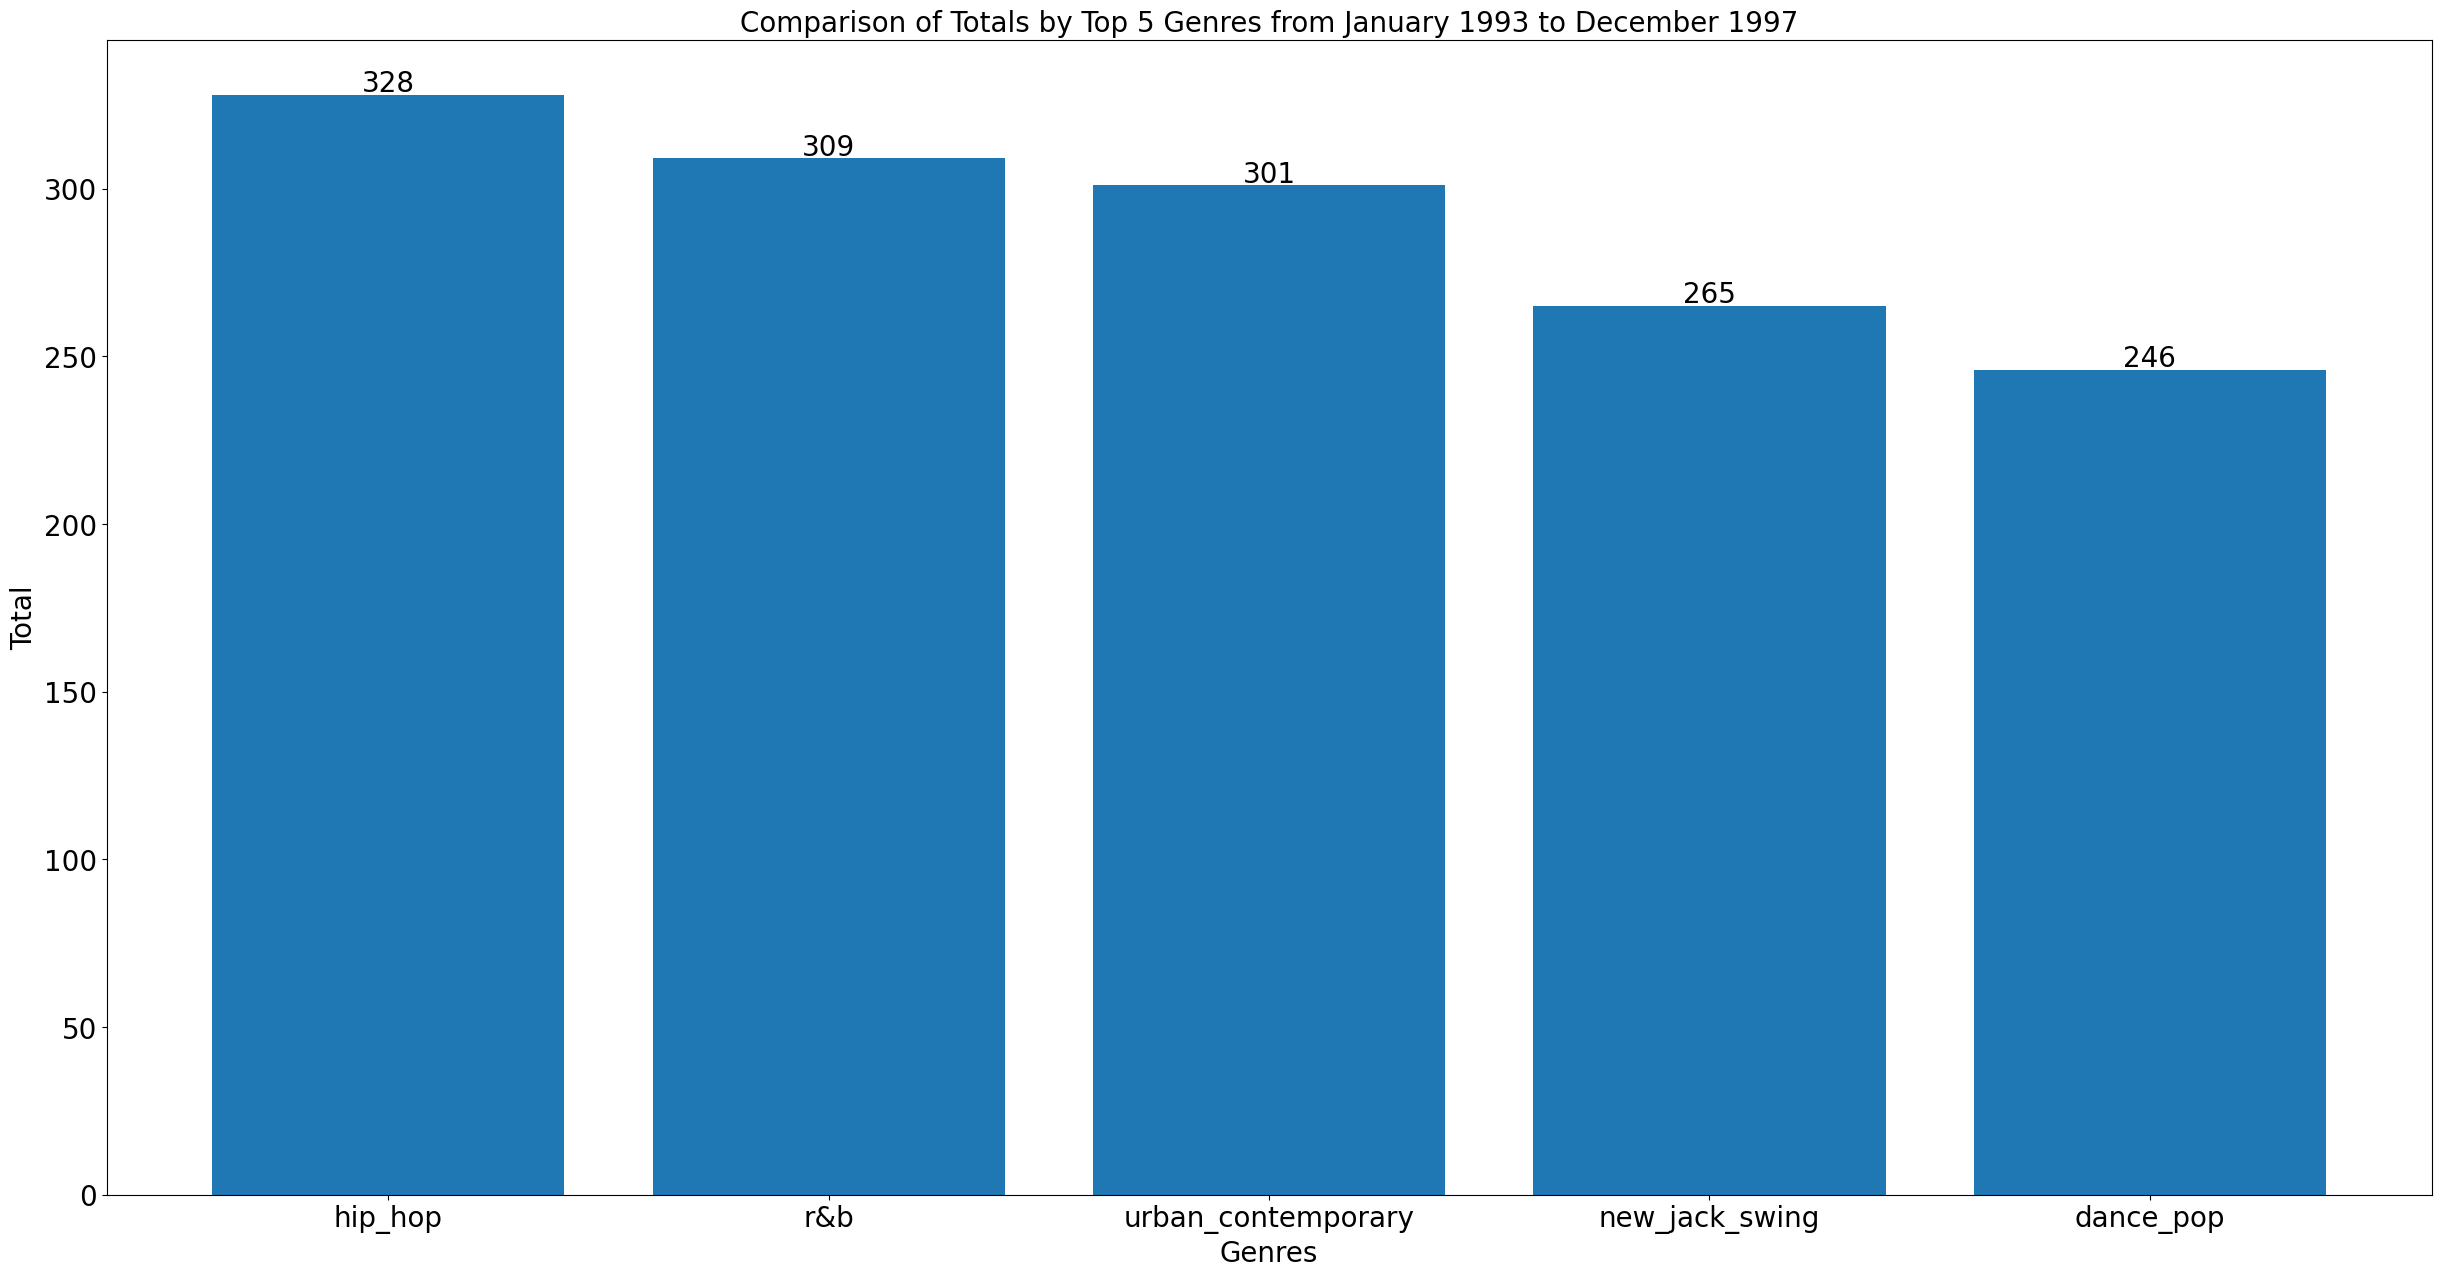

hip_hop has this performers with a TOP 1 song:	
Bone Thugs-N-Harmony with song 1st Of Tha Month
, TLC with song Ain't 2 Proud 2 Beg
, SWV with song Always On My Mind
, The Notorious B.I.G. with song Big Poppa/Warning
, Montell Jordan with song Falling
, Coolio Featuring L.V. with song Gangsta's Paradise (From "Dangerous Minds")
, 2Pac Featuring K-Ci And JoJo with song How Do U Want It/California Love
, The Notorious B.I.G. Featuring Puff Daddy & Mase with song Mo Money Mo Problems
, BLACKstreet (Featuring Dr. Dre) with song No Diggity


r&b has this performers with a TOP 1 song:	
All-4-One with song (She's Got) Skillz
, Boyz II Men with song 4 Seasons Of Loneliness
, Janet Jackson with song Again
, TLC with song Ain't 2 Proud 2 Beg
, Mariah Carey with song All I Want For Christmas Is You
, Whitney Houston with song All The Man That I Need
, SWV with song Always On My Mind
, Michael Jackson with song Another Part Of Me
, Toni Braxton with song Another Sad Love Song
, Montell Jordan with

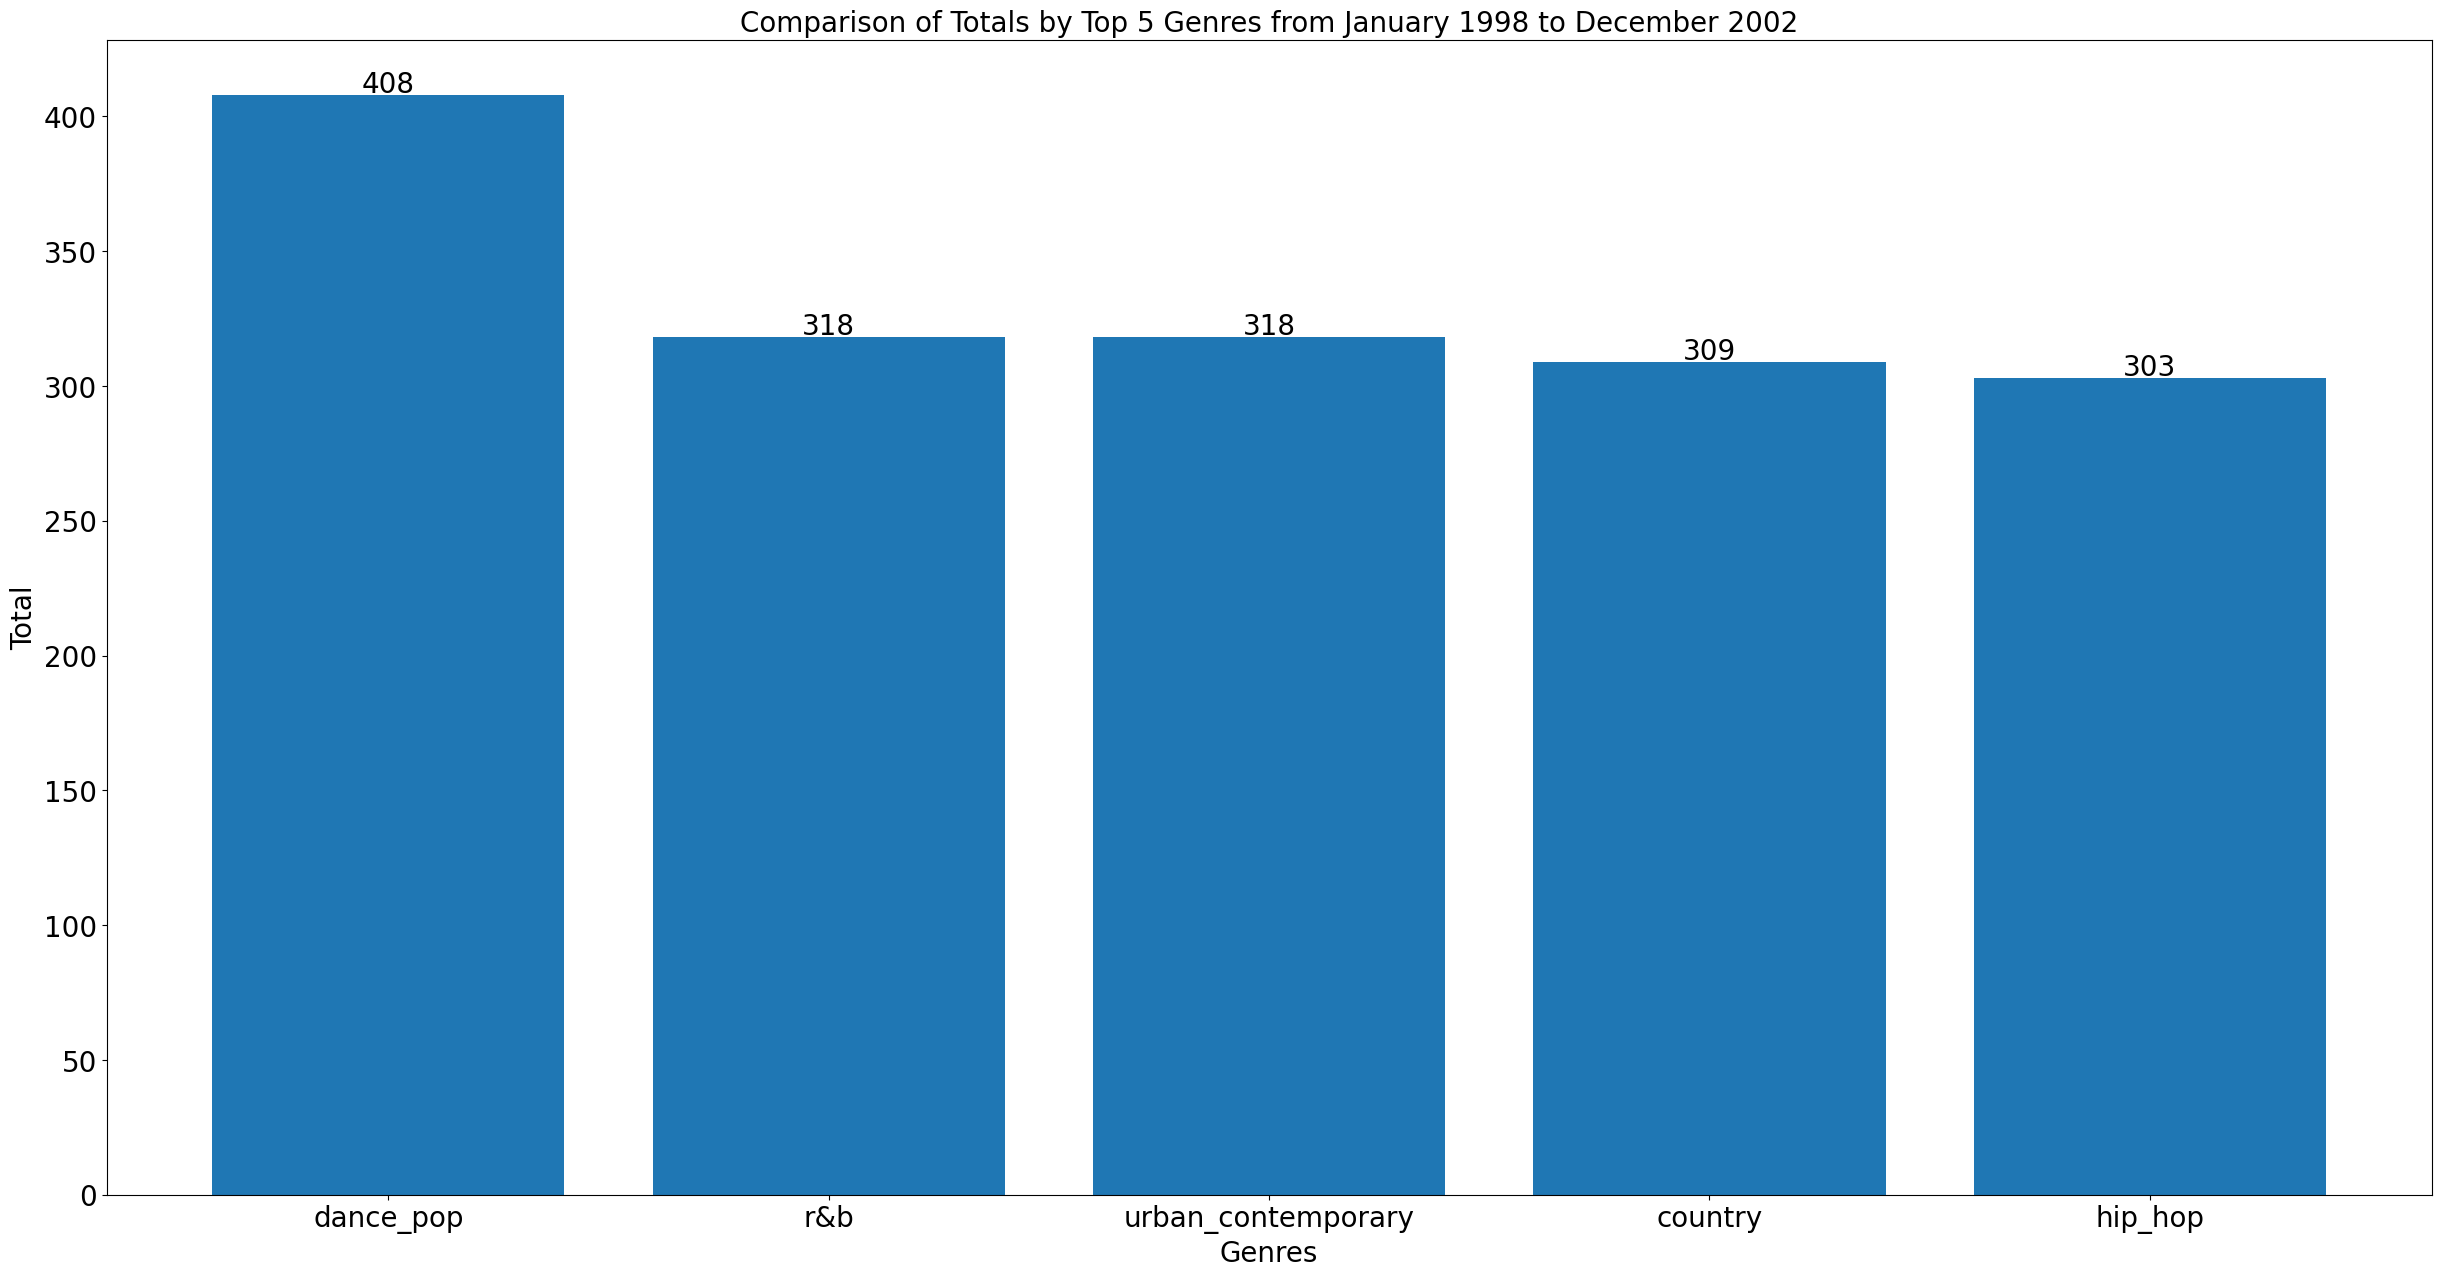

dance_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Nelly with song (Hot S**t) Country Grammar
, Celine Dion with song (If There Was) Any Other Way
, Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover")
, Kelly Clarkson with song A Moment Like This
, Aaliyah with song Age Ain't Nothing But A Number
, TLC with song Ain't 2 Proud 2 Beg
, Jennifer Lopez Featuring Ja Rule with song Ain't It Funny
, Christina Aguilera with song Ain't No Other Man
, Jennifer Lopez with song Ain't Your Mama


r&b has this performers with a TOP 1 song:	
Mary J. Blige with song (You Make Me Feel Like) A Natural Woman (From "New York Undercover")
, Alicia Keys with song A Woman's Worth
, Aaliyah with song Age Ain't Nothing But A Number
, TLC with song Ain't 2 Proud 2 Beg
, Christina Aguilera with song Ain't No Other Man
, Monica with song All Eyez On Me
, Janet with song All For You
, Mariah Carey with song All I Want For Chri

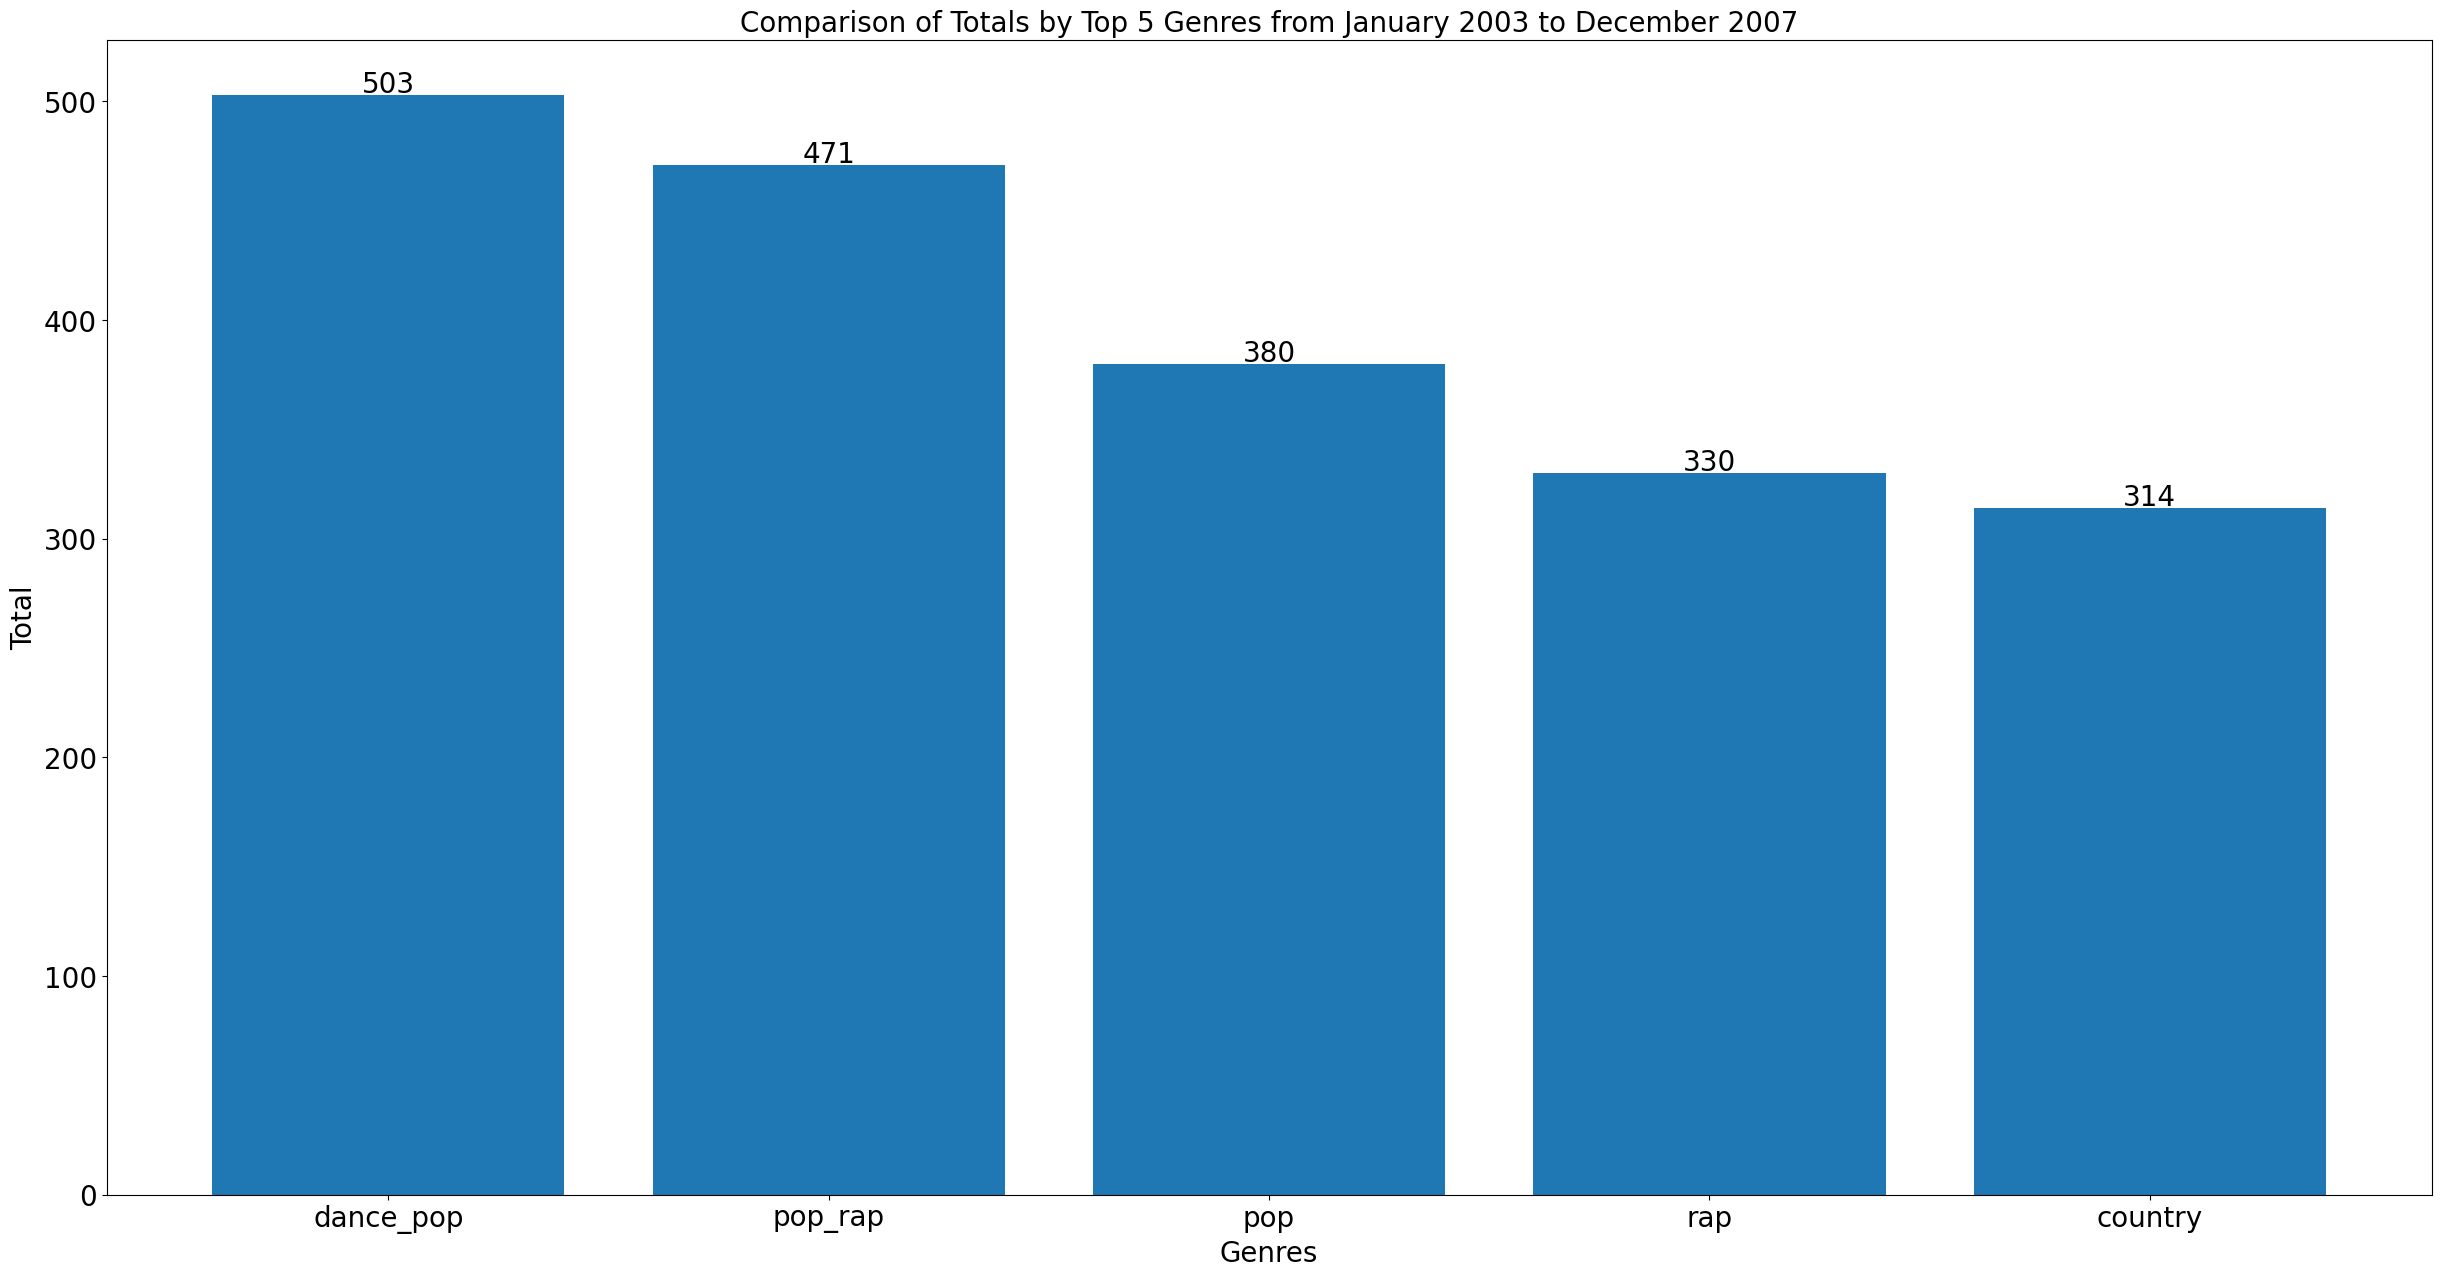

dance_pop has this performers with a TOP 1 song:	
Beyonce with song 1+1
, Gwen Stefani with song 4 In The Morning
, Avril Lavigne with song Alice
, Nelly Furtado with song All Good Things (Come To An End)
, Jennifer Lopez Featuring LL Cool J with song All I Have
, Mariah Carey with song All I Want For Christmas Is You
, Carrie Underwood with song All-American Girl
, Rihanna with song American Oxygen
, Akon with song Angel
, Beyonce Featuring Sean Paul with song Baby Boy


pop_rap has this performers with a TOP 1 song:	
Beyonce with song 1+1
, 50 Cent Featuring Nate Dogg with song 21 Questions
, Nelly Furtado with song All Good Things (Come To An End)
, Jennifer Lopez Featuring LL Cool J with song All I Have
, Akon with song Angel
, Beyonce Featuring Sean Paul with song Baby Boy
, Fantasia with song Baby Mama
, Chris Brown with song Back To Sleep
, Ne-Yo with song Beautiful Monster
, D4L with song Betcha Can't Do It Like Me


pop has this performers with a TOP 1 song:	
Plain White T's w

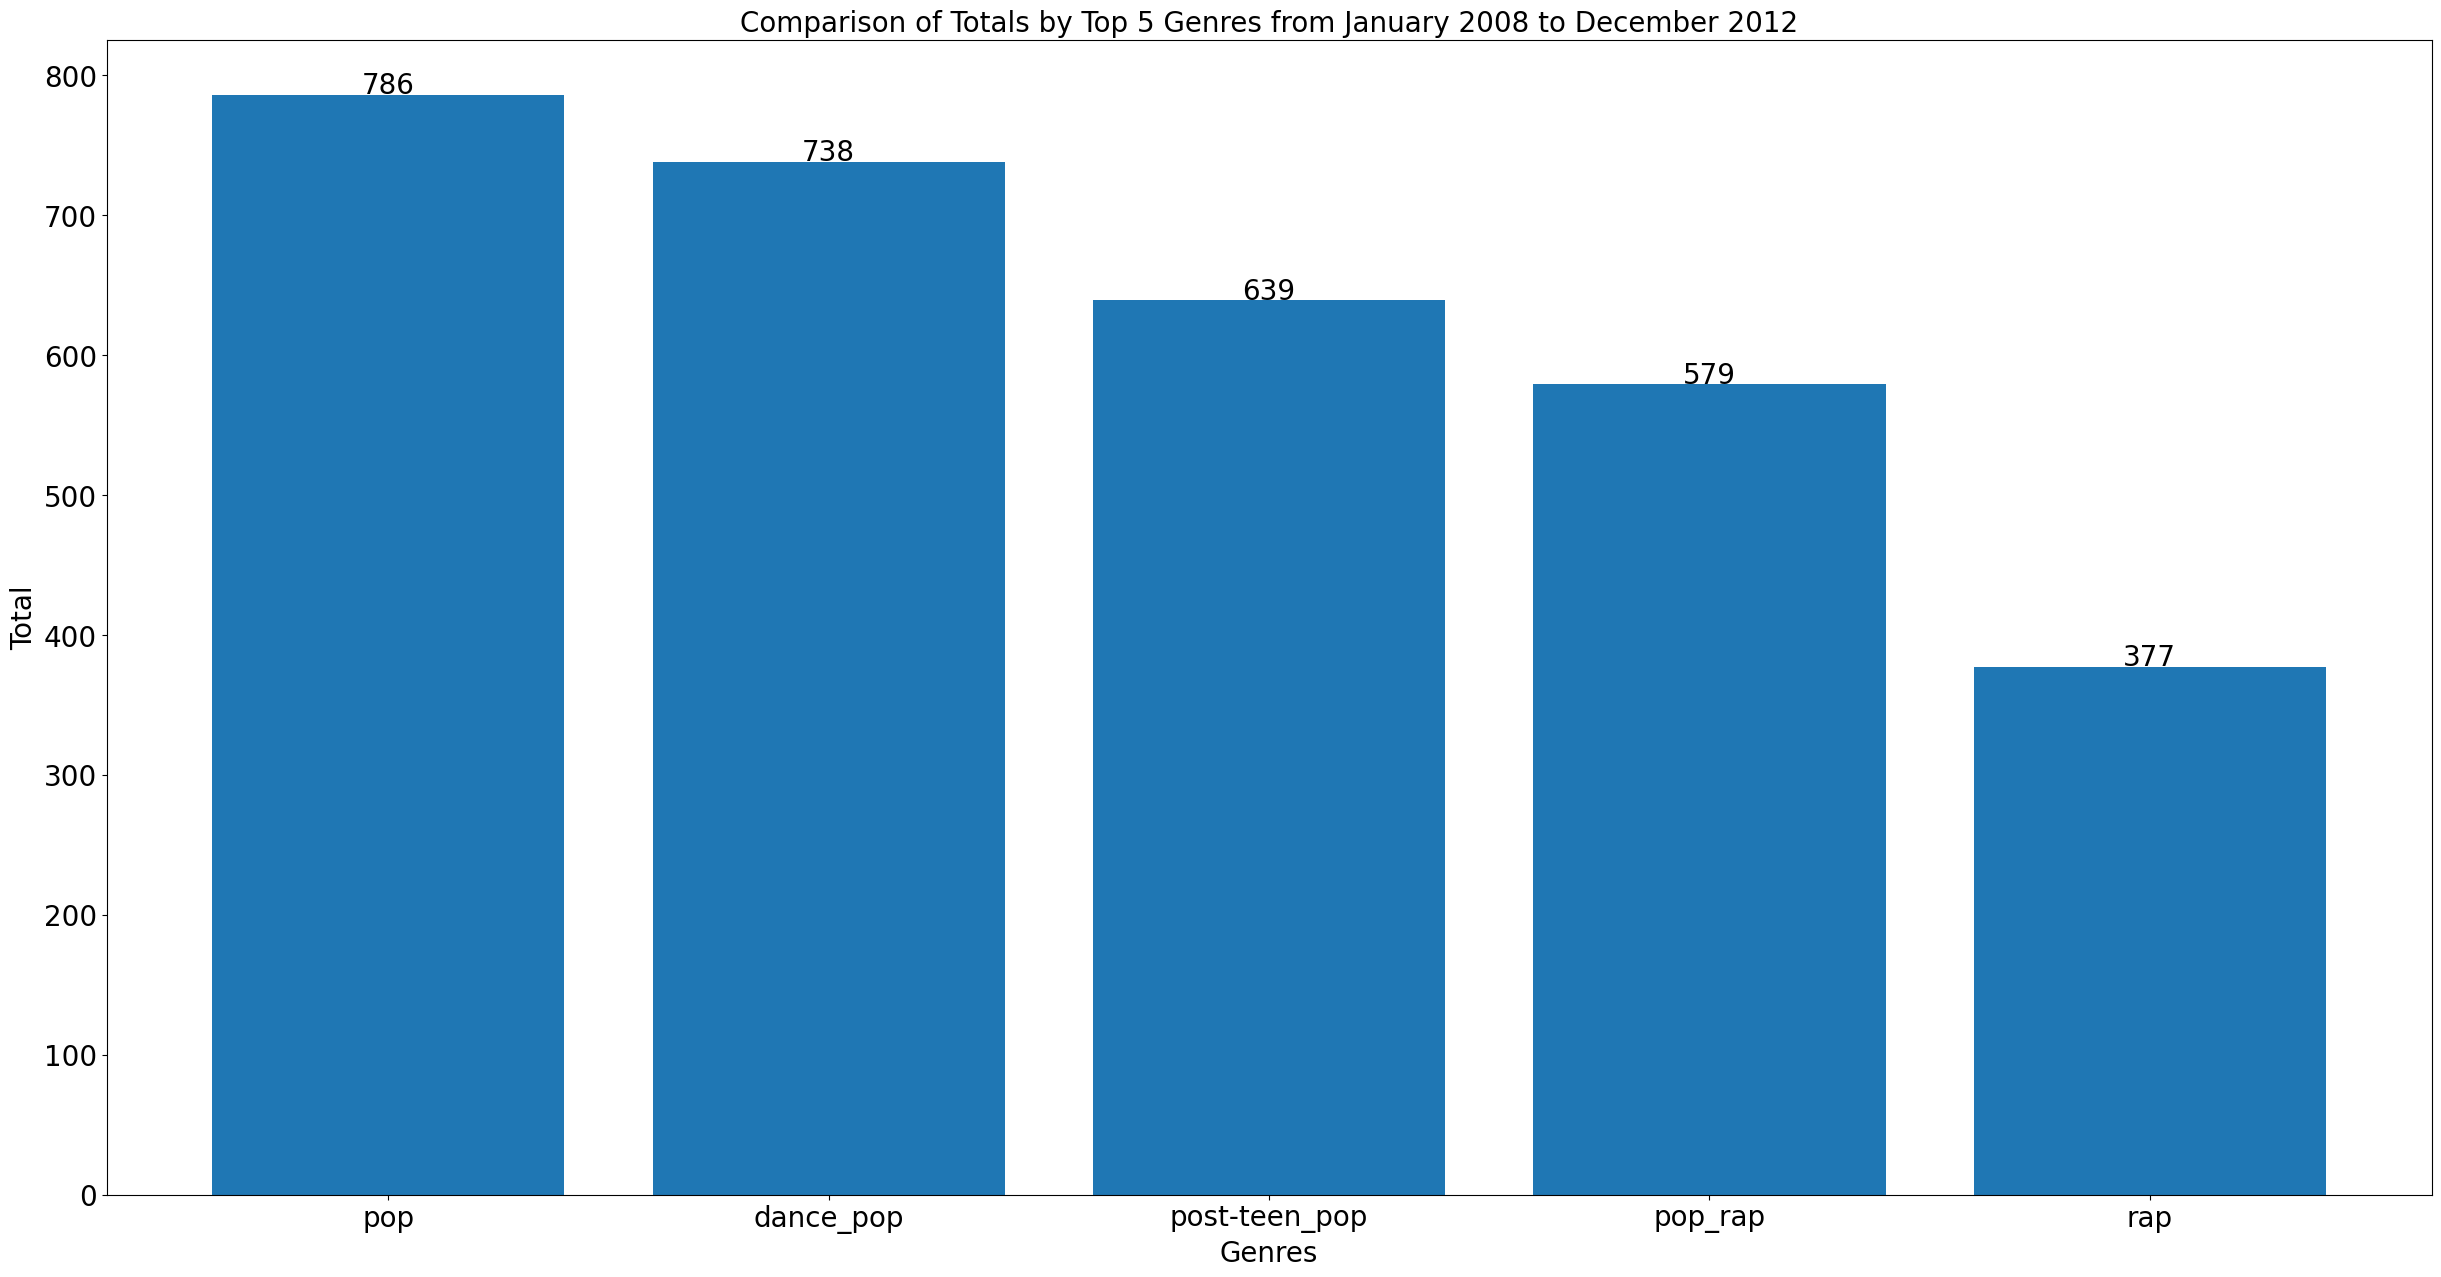

pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Taylor Swift with song ...Ready For It?
, Beyonce with song 1+1
, Bruno Mars with song 24K Magic
, P!nk with song A Million Dreams
, Kelly Clarkson with song A Moment Like This
, Coldplay with song A Sky Full Of Stars
, Lady Gaga with song A-YO
, Adele with song All I Ask
, Mariah Carey with song All I Want For Christmas Is You


dance_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Beyonce with song 1+1
, T.I. with song 24's
, Bruno Mars with song 24K Magic
, P!nk with song A Million Dreams
, Kelly Clarkson with song A Moment Like This
, Lady Gaga with song A-YO
, Taylor Swift with song Afterglow
, Mariah Carey with song All I Want For Christmas Is You
, Rihanna with song American Oxygen


post-teen_pop has this performers with a TOP 1 song:	
Britney Spears with song ...Baby One More Time
, Taylor Swift with song ...Ready For It?
, P!nk with song A 

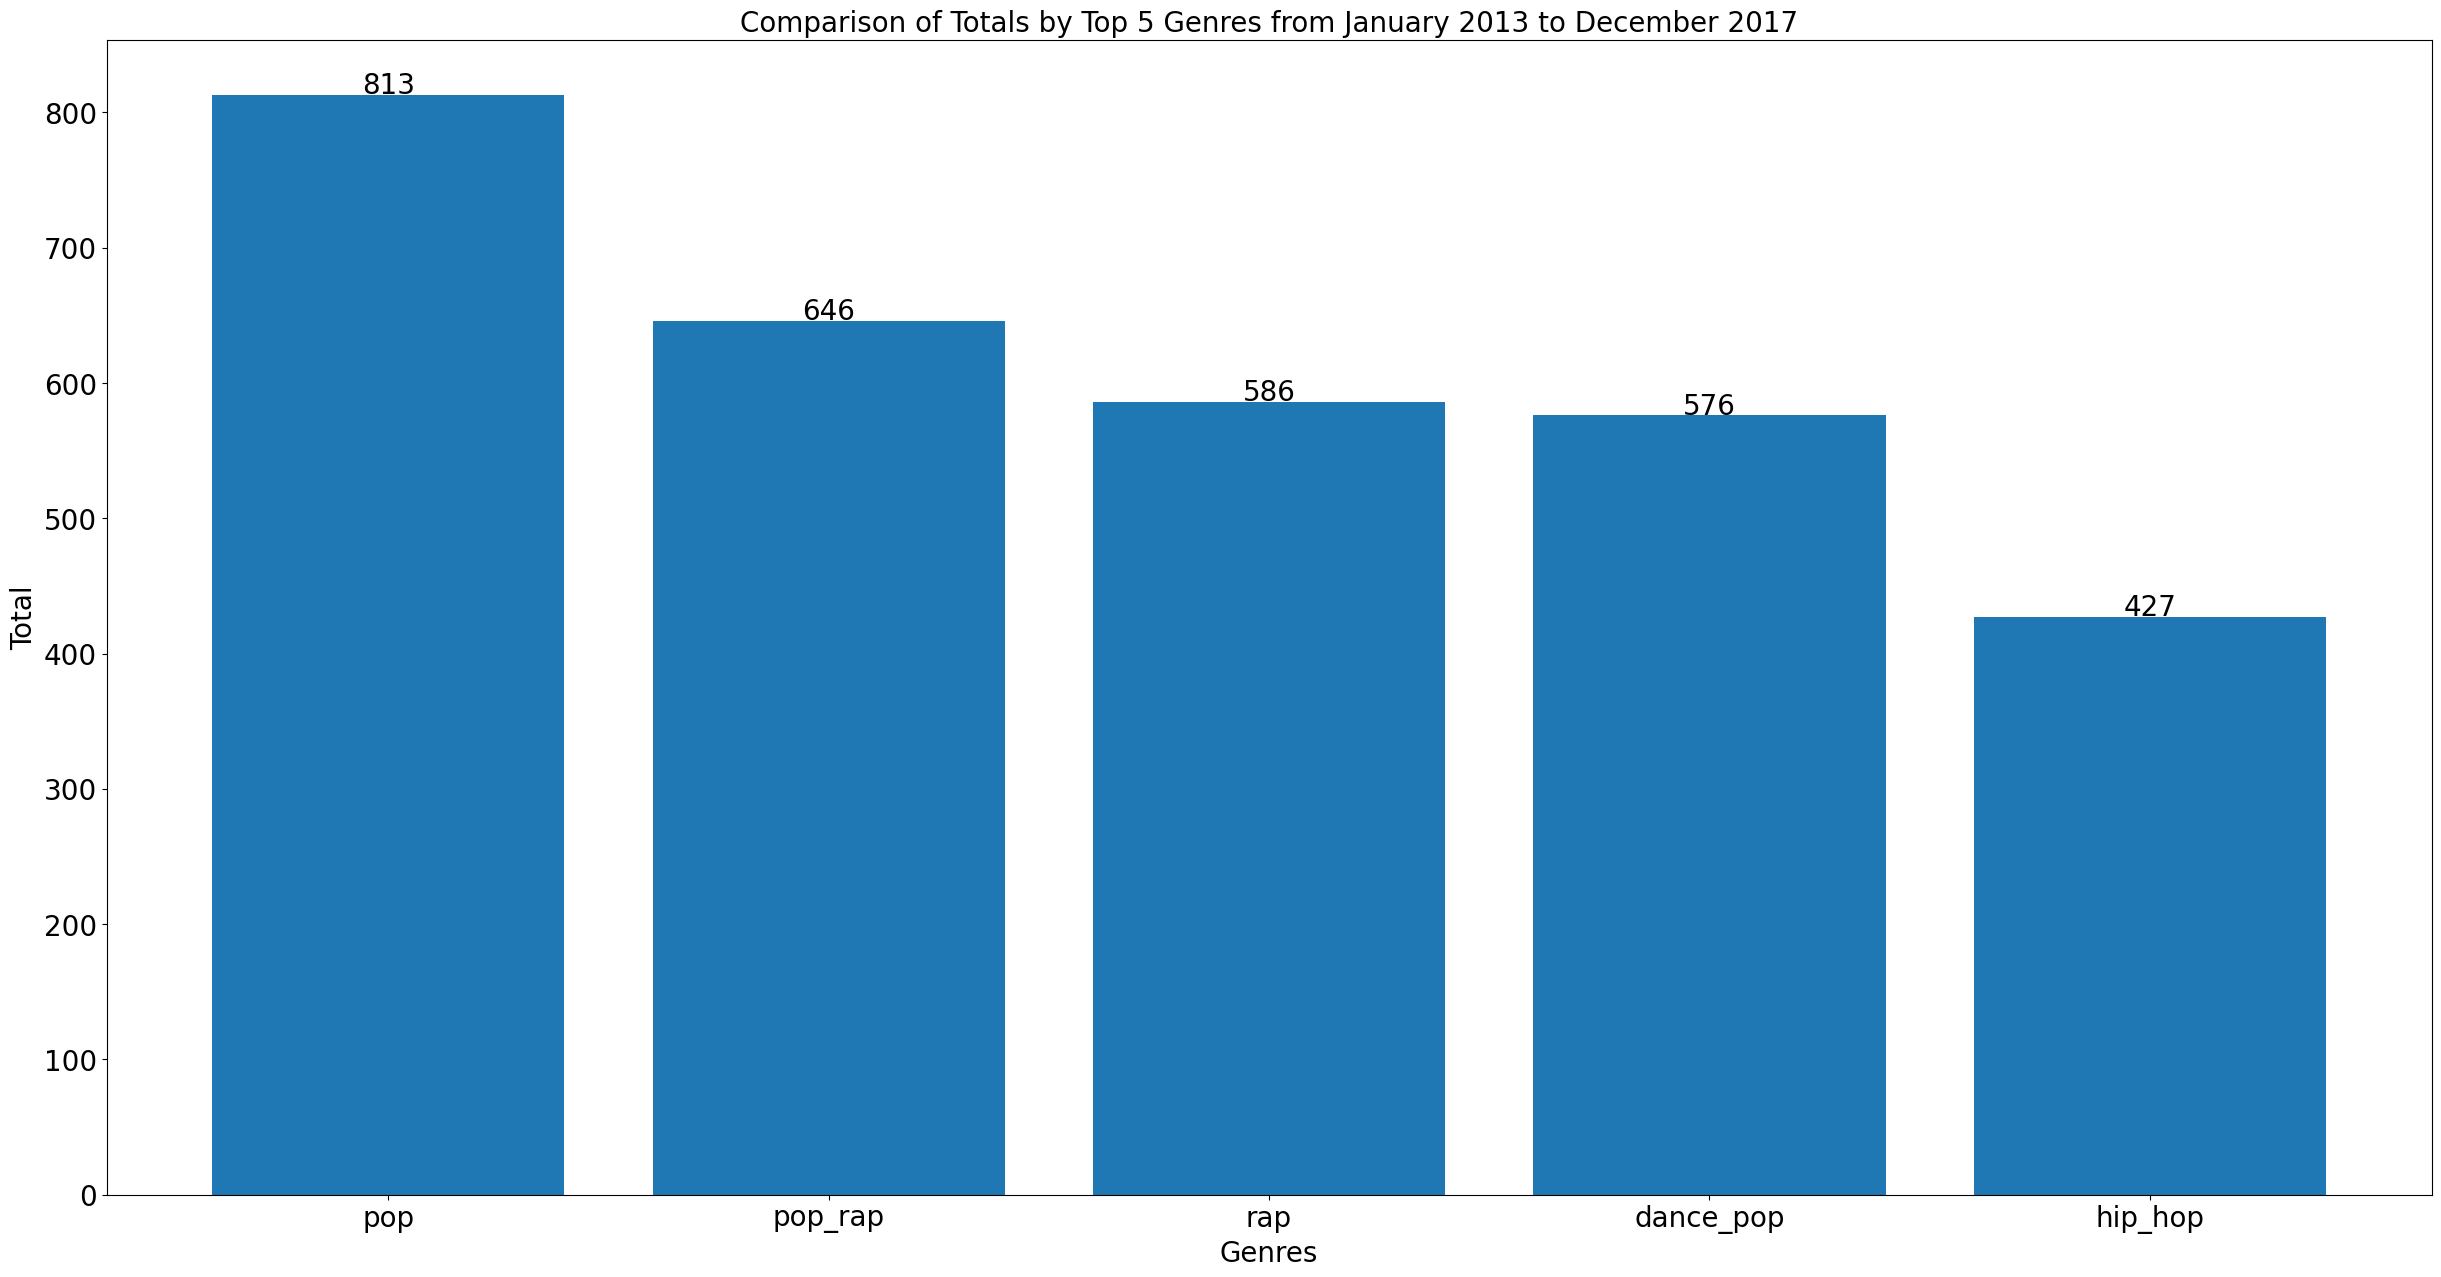

pop has this performers with a TOP 1 song:	
Taylor Swift with song ...Ready For It?
, Justin Bieber with song 2 Much
, Bruno Mars with song 24K Magic
, Miley Cyrus with song 7 Things
, The Weeknd with song A Lonely Night
, Ed Sheeran with song Afire Love
, Meghan Trainor with song All About That Bass
, Adele with song All I Ask
, John Legend with song All Of Me
, Taylor Swift Featuring Kendrick Lamar with song Bad Blood


pop_rap has this performers with a TOP 1 song:	
Migos Featuring Lil Uzi Vert with song Bad And Boujee
, Cardi B with song Be Careful
, Rae Sremmurd Featuring Gucci Mane with song Black Beatles
, Macklemore & Ryan Lewis Featuring Ray Dalton with song Can't Hold Us
, Pharrell Williams with song Come Get It Bae
, Justin Timberlake with song Cry Me A River
, Iggy Azalea Featuring Charli XCX with song Fancy
, DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne with song I'm The One
, Drake Featuring WizKid & Kyla with song One Dance
, Desiigner with son

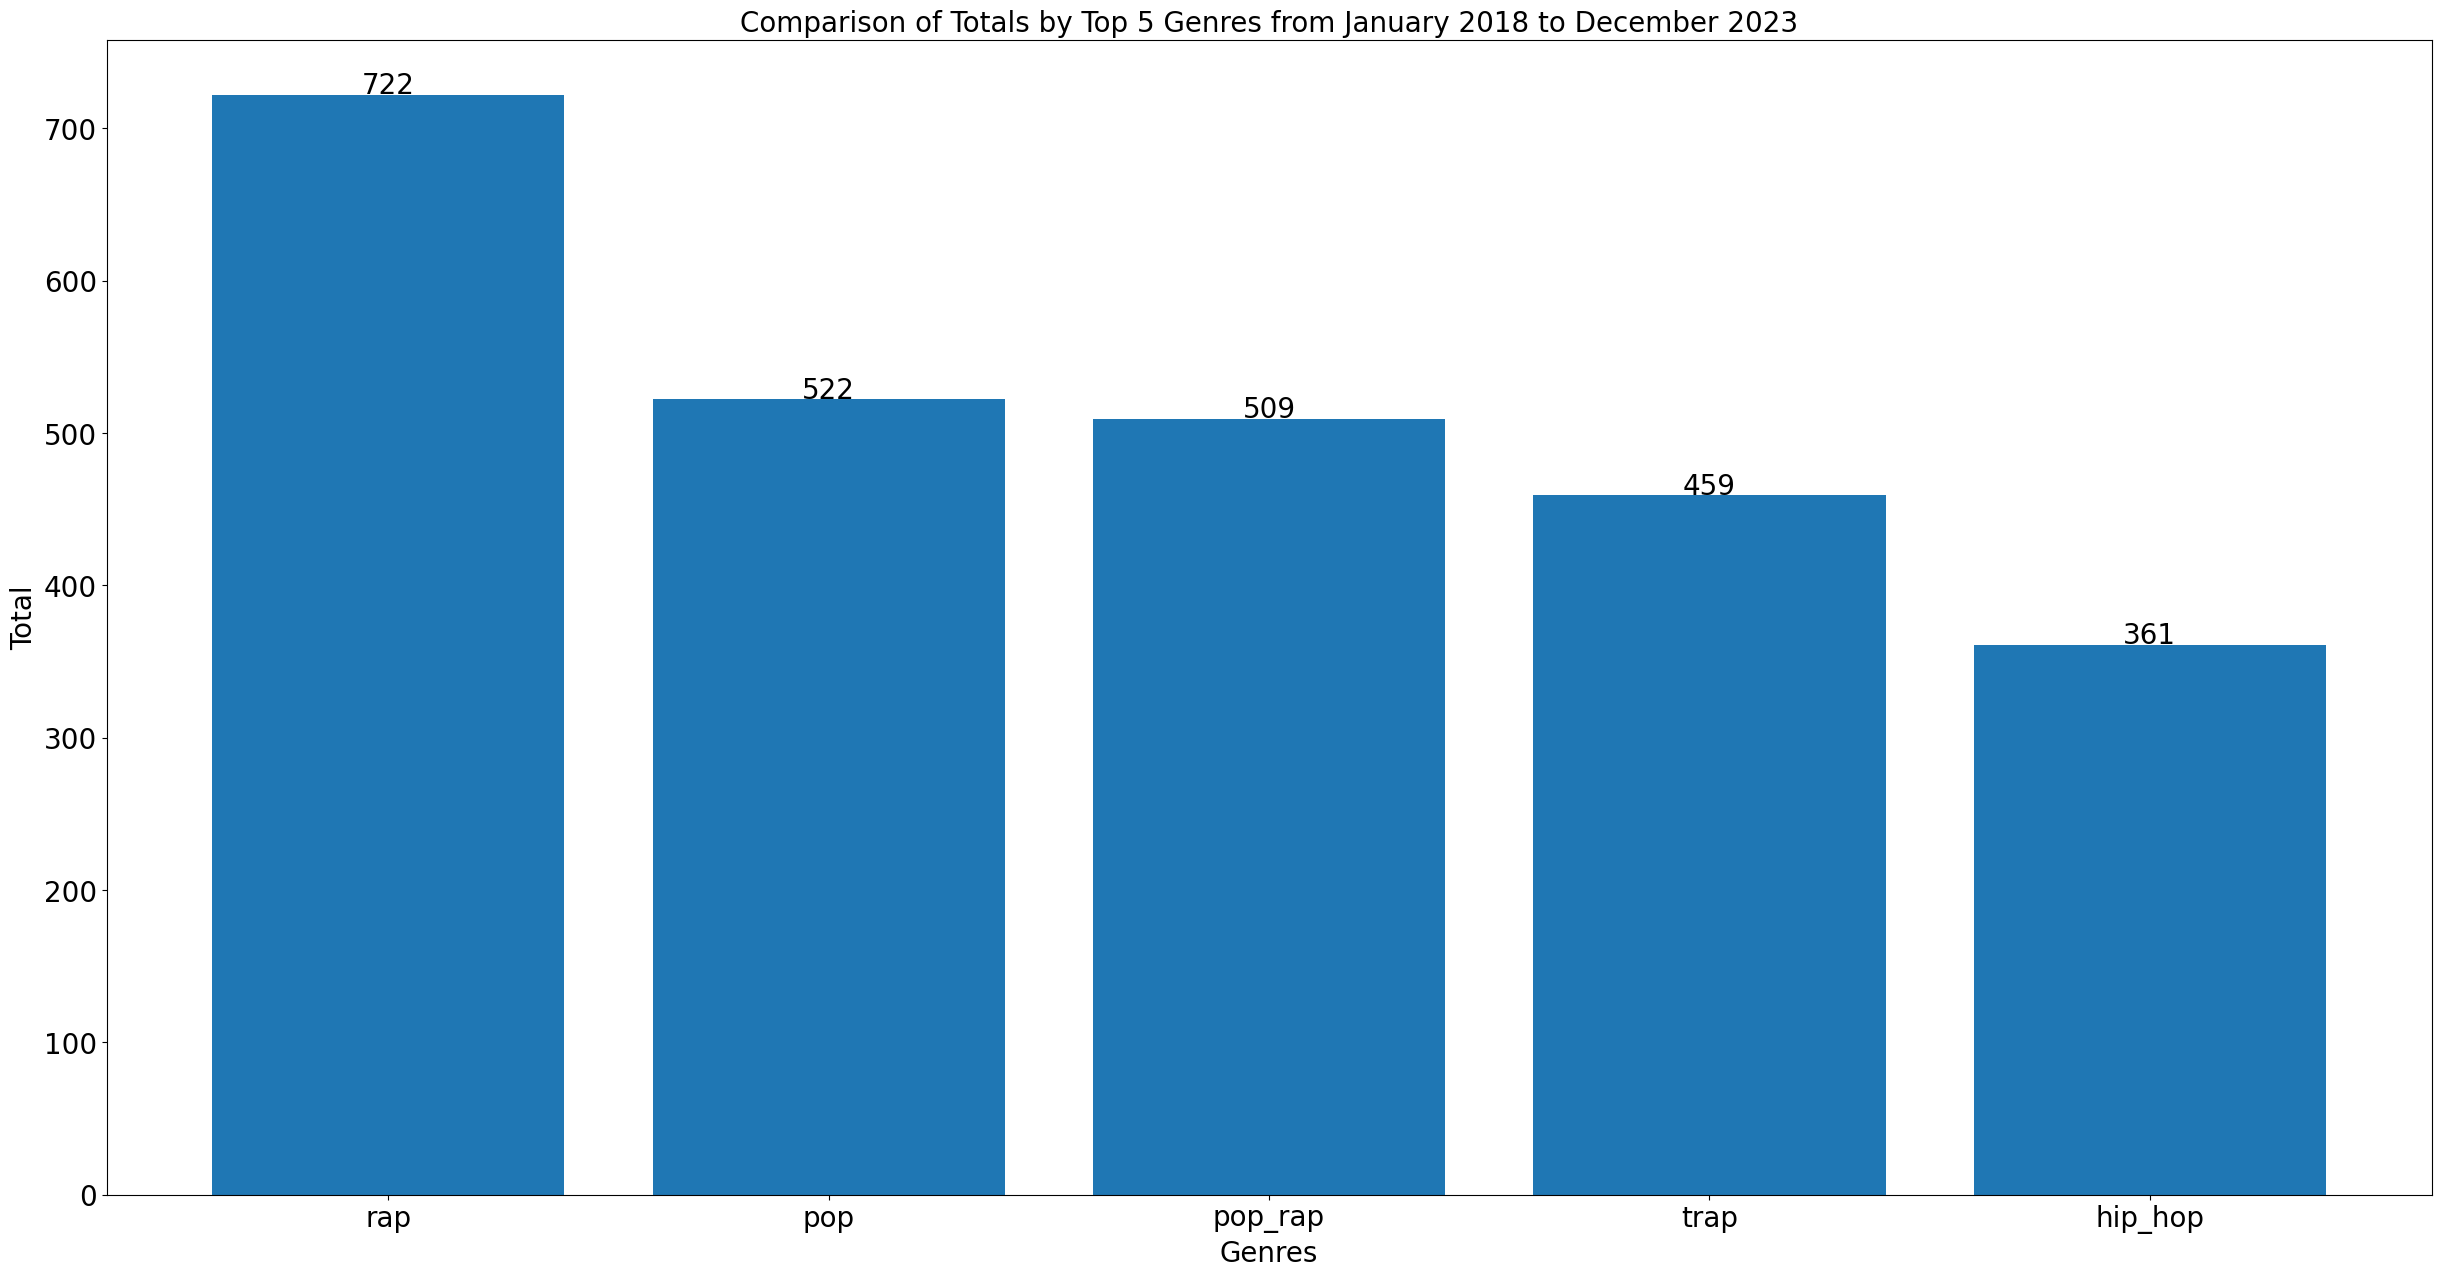

rap has this performers with a TOP 1 song:	
Drake with song 0 To 100 / The Catch Up
, Travis Scott with song 5% Tint
, Post Malone with song 92 Explorer
, Cardi B with song Be Careful
, Roddy Ricch with song Big Stepper
, Childish Gambino with song Feels Like Summer
, Cardi B, Bad Bunny & J Balvin with song I Like It
, Post Malone & Swae Lee with song Sunflower (Spider-Man: Into The Spider-Verse)


pop has this performers with a TOP 1 song:	
Taylor Swift with song ...Ready For It?
, Ariana Grande with song 34+35
, Billie Eilish with song 8
, Jonas Brothers with song A Little Bit Longer
, The Weeknd with song A Lonely Night
, Harry Styles with song Adore You
, Ed Sheeran with song Afire Love
, Mariah Carey with song All I Want For Christmas Is You
, Olivia Rodrigo with song All I Want
, Megan Thee Stallion with song B.I.T.C.H.


pop_rap has this performers with a TOP 1 song:	
Drake with song 0 To 100 / The Catch Up
, Megan Thee Stallion with song B.I.T.C.H.
, Cardi B with song Be Carefu

In [7]:
#estoy aquí 2024/01/08 20:44
def figure(df_categorica,columna_categorica,columna_numerica):
    
    df = df_categorica.copy()
    size=20
    # Bar plot using Matplotlib
    plt.figure(figsize=(30, 15))
    plt.bar(df[columna_categorica], df[columna_numerica])

    # Annotate the bars with numeric values
    for i, total in enumerate(df[columna_numerica]):
        plt.text(i, total + 1, str(total), ha='center',fontsize=size)
        # Setting font size for tick labels on x-axis and y-axis
        plt.xticks(fontsize=size)  # Change the font size here
        plt.yticks(fontsize=size)  # Change the font size here
    plt.xlabel('Genres',fontsize=size)
    plt.ylabel('Total',fontsize=size)
    anyo = df['start_date'].min().year
    anyo = str(anyo)
    anyo_fin = df['end_date'].max().year
    anyo_fin = str(anyo_fin)
    plt.title('Comparison of Totals by Top 5 Genres from January '+ anyo + " to December " + anyo_fin,fontsize=size)
    plt.show()
    
folder_path = '.\data_genre'  # Replace this with the absolute/relative path to your folder
danceability_list=[]
#danceability_dictionary={}
#danceability_dictionary.columns
# Loop through files in the folder
number_of_performers=10
for filename in os.listdir(folder_path):#cargo los csv
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df_genres_count = pd.read_csv(file_path,sep=";").set_index("index")
        df_genres_count["start_date"] = pd.to_datetime(df_genres_count["start_date"])
        df_genres_count["end_date"] = pd.to_datetime(df_genres_count["end_date"])
        df_categorica = df_genres_count.sort_values(by="totals",ascending=False).head(5).copy() #cojo las 5 categorías con más éxitos
        figure(df_categorica,'genre','totals')  #se dibujan las cajas
        #plot_categorical_numerical_relationship(df_categorica,'Genre','Count',True)
        
        danceability_dictionary={} #creo el diccionario para guardar el valor danceability de la 
        columns_df_danceability=['SongID','song','Performer','spotify_genre_list_no_dups','spotify_genre_scatter', 'spotify_genre_count','danceability','start_date','end_date']
        df_danceability=pd.DataFrame(columns=columns_df_danceability)
        #creo el dataframe vacío
        #df_danceability._append
        iteration_number=0
        
        for index,row in df_categorica.iterrows():#recorro cada csv con los datos totales por fecha y género
            value_to_find=row['genre'] # para saber que valor busco
            condition_1= (df_Hot_Stuff_with_genres['WeekID_As_Date'] >= row["start_date"]) & (df_Hot_Stuff_with_genres['WeekID_As_Date'] <= row["end_date"]) # filtro por los rangos de fecha
            condition_2= df_Hot_Stuff_with_genres['Week Position'] == 1 # filtro para que sean números 1
            performer = df_Hot_Stuff_with_genres[(condition_1) & (condition_2)].copy() # Creo un dataframe para buscar el artista o grupo con ese género
            performer.reset_index(inplace=True)
            condition_3=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['spotify_genre_list_no_dups'].apply(lambda x: value_to_find in x)].copy() #busco los registros que coinciden con el género 
            condition_3.rename(columns={'Performer': 'Performer_x'}, inplace=True) #para poder igualar los nombres de las columnas
            
            df_artists_of_the_genre = pd.merge(condition_3, performer, on='Performer_x', how='inner') # creo un df de artistas que coinciden  con ese género
                    
            unique_values_Performer= df_artists_of_the_genre['Performer_x'].unique() # busco valores de artistas que coinciden con ese género
            unique_df_Performer = pd.DataFrame(unique_values_Performer, columns=['Performer']) 
            unique_df_Performer = unique_df_Performer.head(number_of_performers).copy() #extraigo por defecto 10 number_of_performers=10
            ####
            unique_values_SongID= df_artists_of_the_genre['SongID_x'].unique() # extraigo valores únicos por canción
            unique_df_SongID = pd.DataFrame(unique_values_SongID, columns=['SongID']) #extraigo las canciones
            unique_df_SongID = unique_df_Performer.head(number_of_performers).copy() 
            print(f"{value_to_find} has this performers with a TOP 1 song:",end='\t\r\n')
            loop=0


            for index_1, row_1 in unique_df_SongID.head(number_of_performers).iterrows(): #recorro los valores para buscar las canciones
                df_song=df_artists_of_the_genre[df_artists_of_the_genre['Performer_x']==row_1['Performer']].copy()

                for index_2,row_2 in df_song.head(1).iterrows():# cojo la primera entrada
                    song = row_2['Song']
                    SongID = f"{song}{row_1['Performer']}"
                    artist_band= f"{row_1['Performer']}"
                    if loop != 0:#formateo en pantalla por si es el primer elemento artista/grupo y canción
                        print(f", {row_1['Performer']} with song {song}")
                    else:
                        print(f"{row_1['Performer']} with song {song}")
                    loop=+1
                    df_danceability_temp=df_Hot_100_Audio_Features[df_Hot_100_Audio_Features['SongID'] == SongID].copy()
                    danceability_value=df_danceability_temp["danceability"].values
                    spotify_genre_list_no_dups=df_danceability_temp["spotify_genre_list_no_dups"].values
                    if isinstance(danceability_value, np.ndarray):
                        if len(danceability_value)>=1:
                            danceability_value = float(danceability_value[0])
                        else:
                            danceability_value=0    
                    else:
                        danceability_value=0
                    if len(spotify_genre_list_no_dups)==0:
                            spotify_genre_list_no_dups=['unknown']
                    else:
                            spotify_genre_list_no_dups=spotify_genre_list_no_dups[0]

                    #print(f" danceability_value:{danceability_value} type:{type(danceability_value)}")
                    df_danceability_row_data={}
                    df_danceability_row_data = {
                    'SongID': SongID,
                    'song': song,
                    'Performer': artist_band,
                    'spotify_genre_list_no_dups': spotify_genre_list_no_dups,
                    'spotify_genre_scatter': value_to_find,
                    'spotify_genre_count': row['totals'],
                    'danceability': danceability_value * 100,
                    'start_date': row["start_date"], 
                    'end_date': row["end_date"]
                                            }
                    danceability_list.append(df_danceability_row_data)
                    #df_danceability = pd.concat([df_danceability, pd.DataFrame(df_danceability_row_data)])

                    #print("df_danceability_row_data:",df_danceability_row_data,sep="\r\n\t")
                    #for row_values in df_danceability_row_data:
                    #    df_danceability = df_danceability.append(row_values, ignore_index=True)
            print("")
            print("")
df_danceability = pd.DataFrame(danceability_list)
#print(danceability_list)


In [ ]:
df_danceability.head(10)


In [ ]:
df_danceability
#estoy aquí
#2024/01/07 16:43

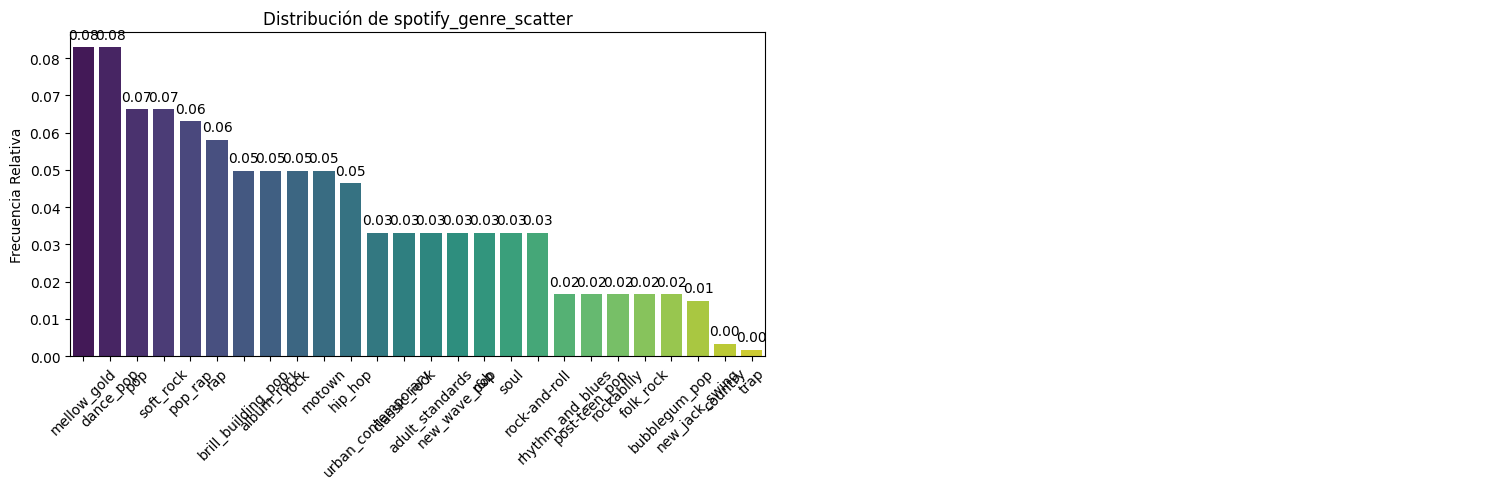

In [6]:
pinta_distribucion_categoricas(df_danceability,["spotify_genre_scatter"], relativa= True, mostrar_valores= True)

(2,)


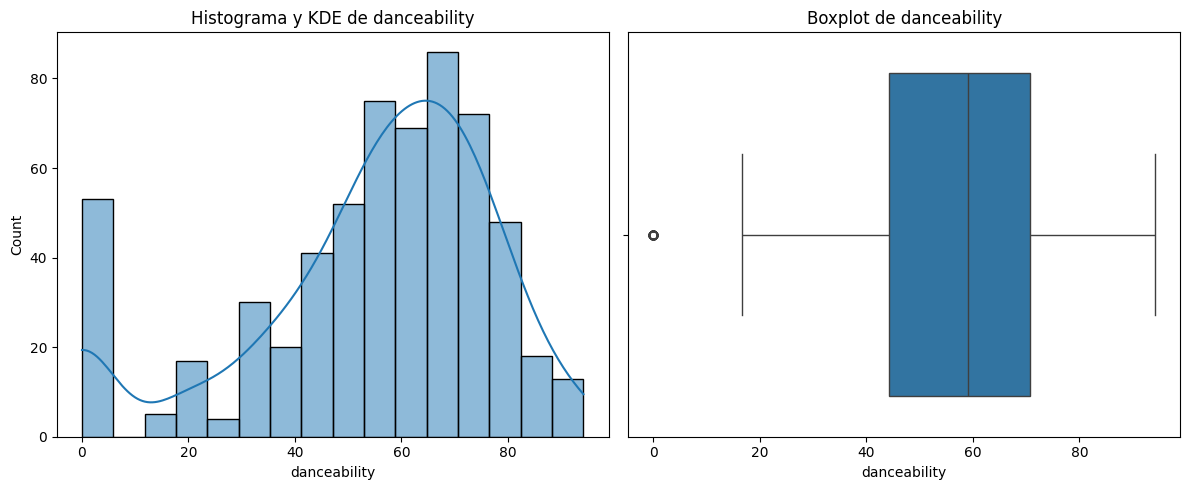

In [7]:
plot_combined_graphs(df_danceability,["danceability"])

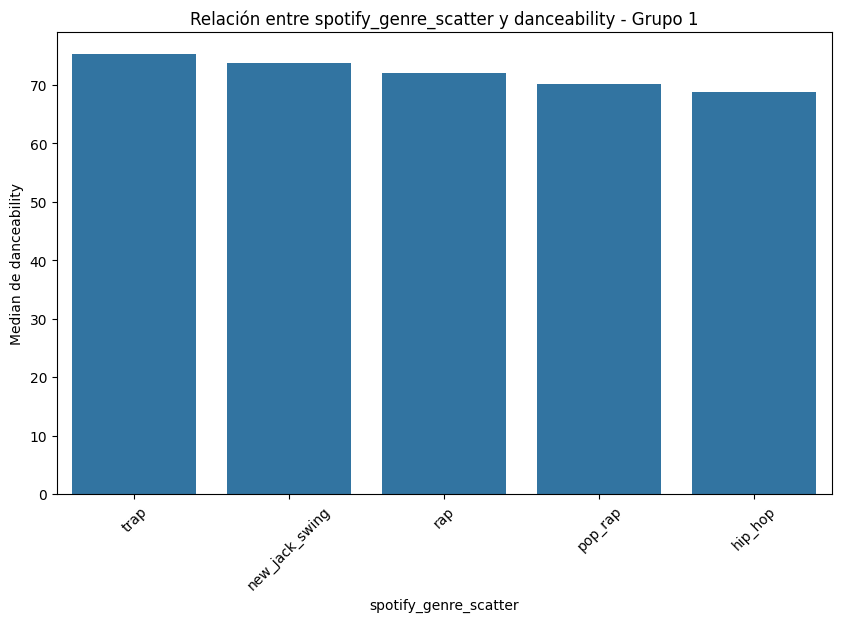

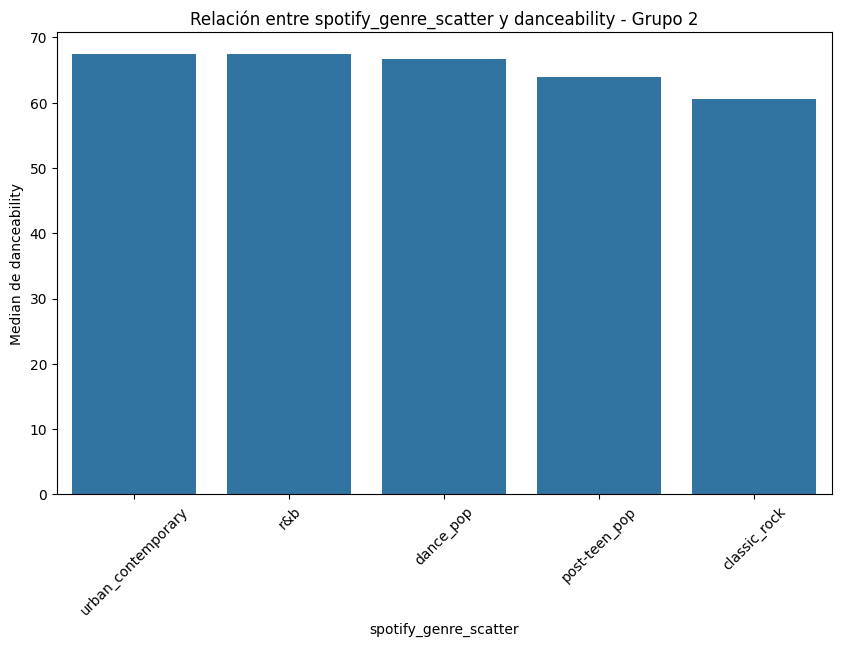

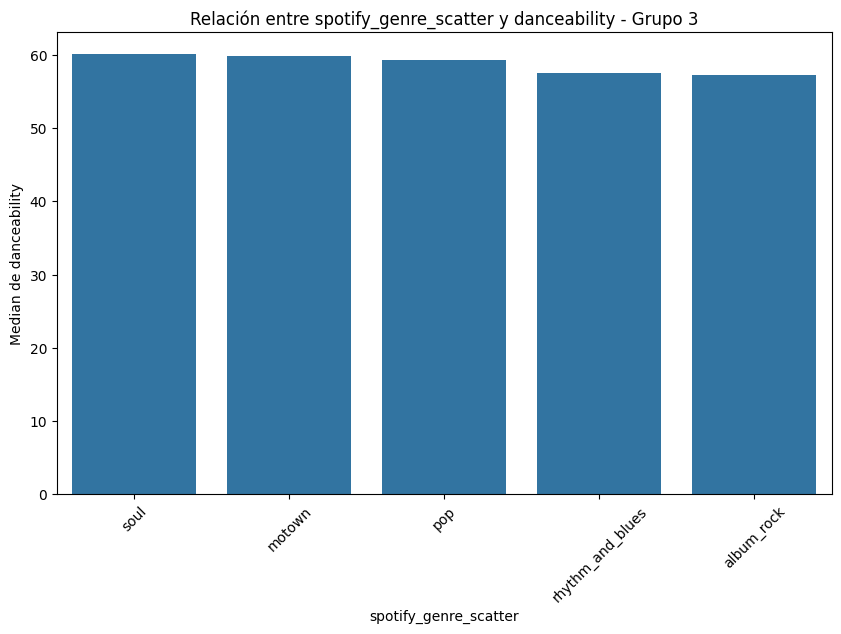

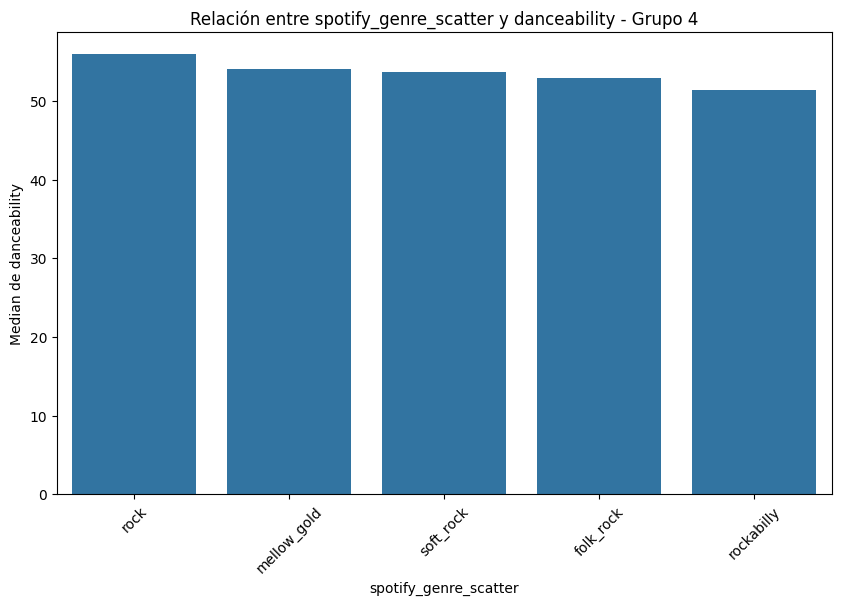

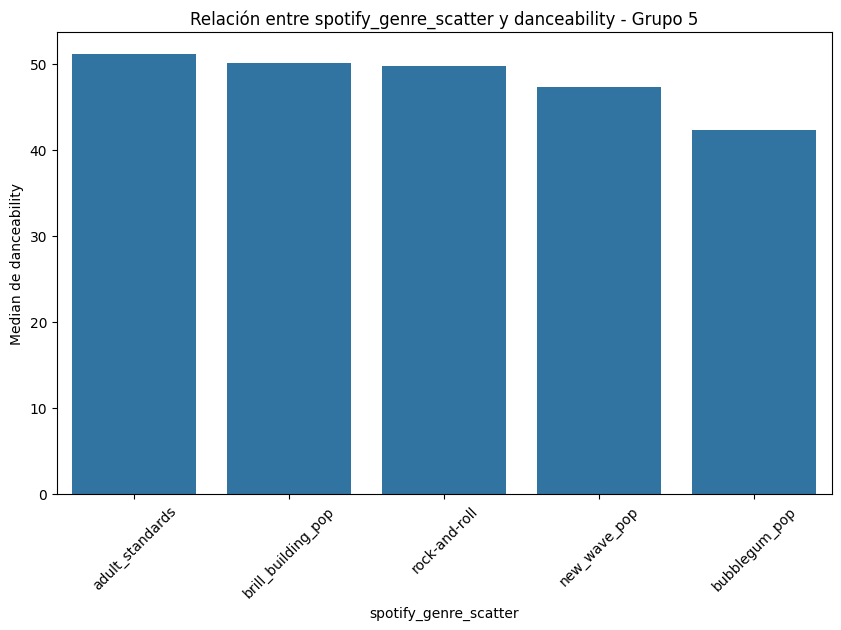

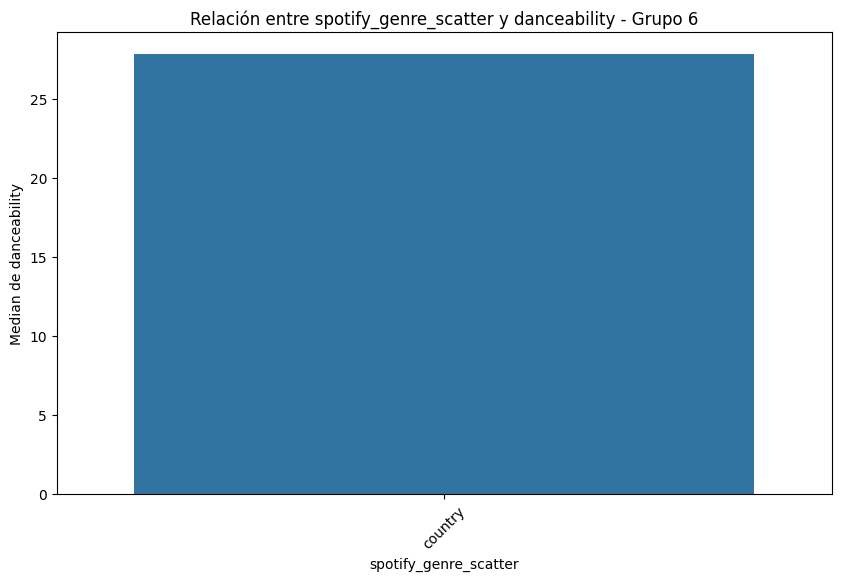

In [8]:
plot_categorical_numerical_relationship(df_danceability,"spotify_genre_scatter","danceability", measure = "median")

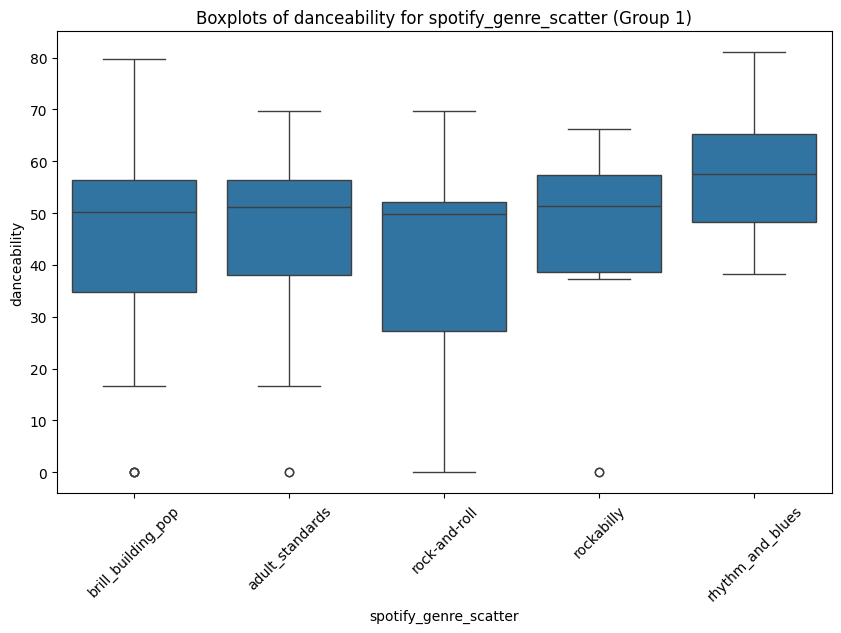

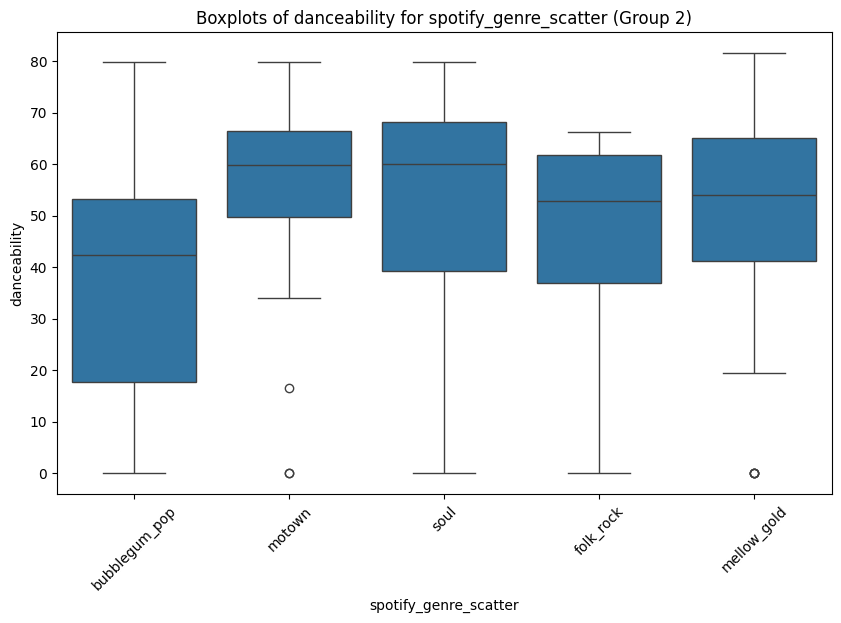

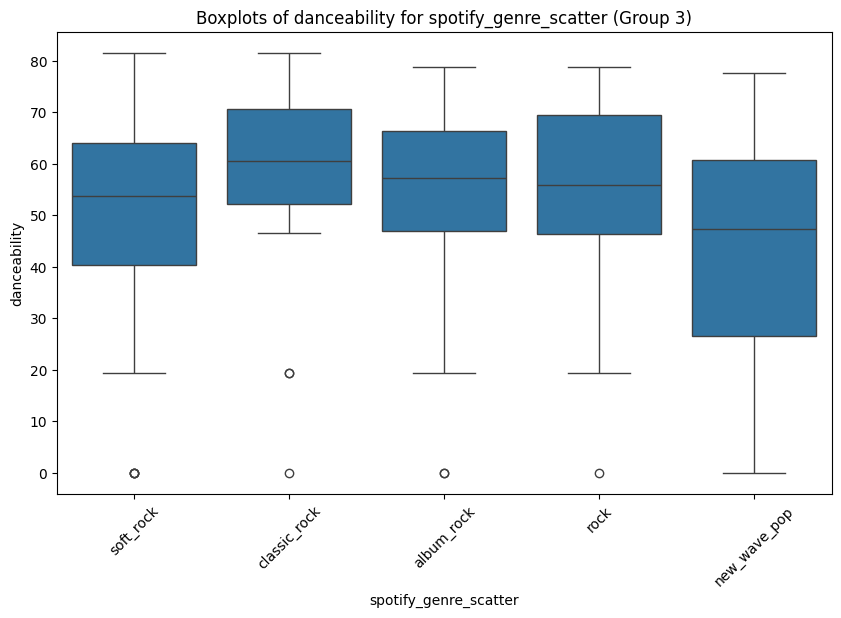

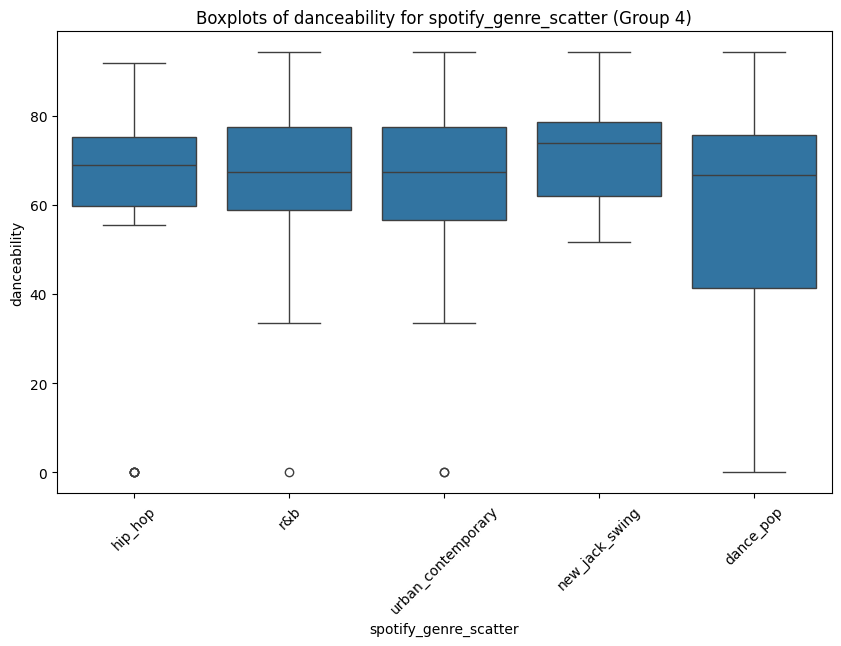

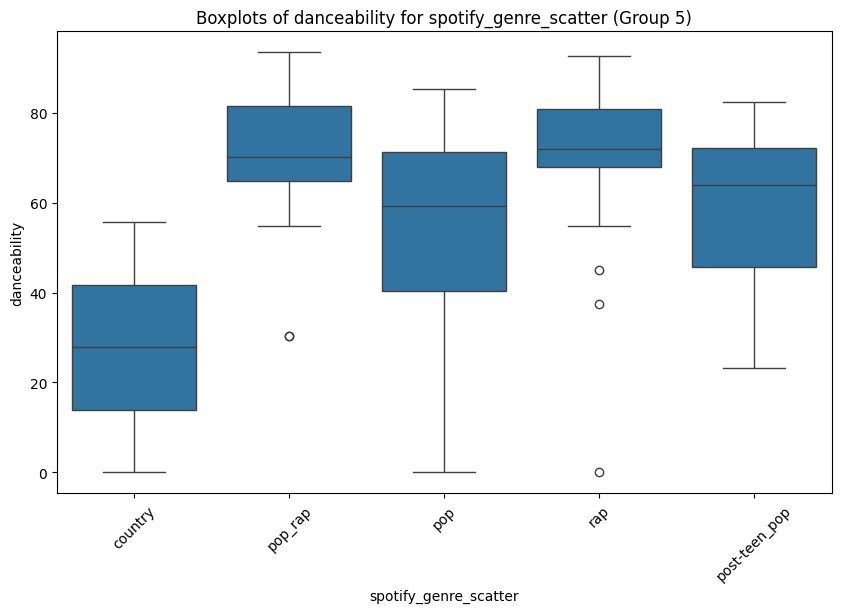

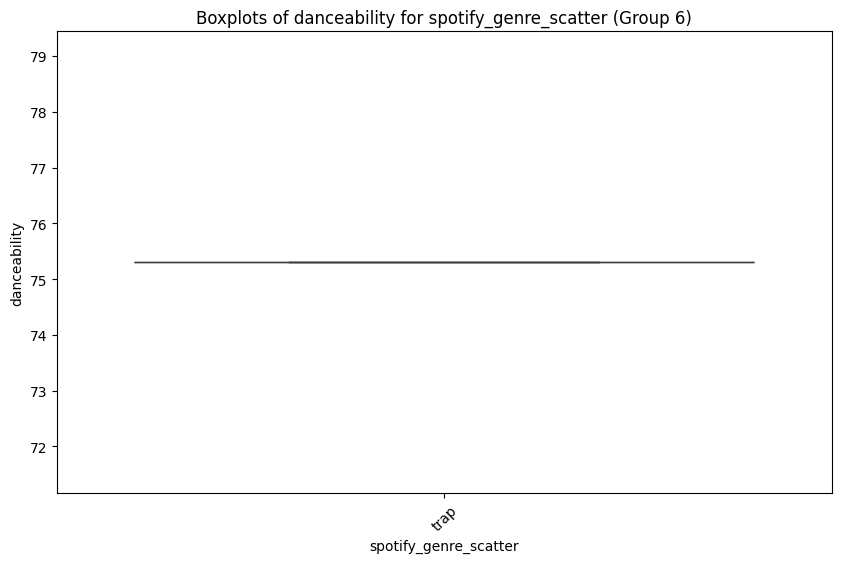

In [9]:
plot_grouped_boxplots(df_danceability,"spotify_genre_scatter","danceability")

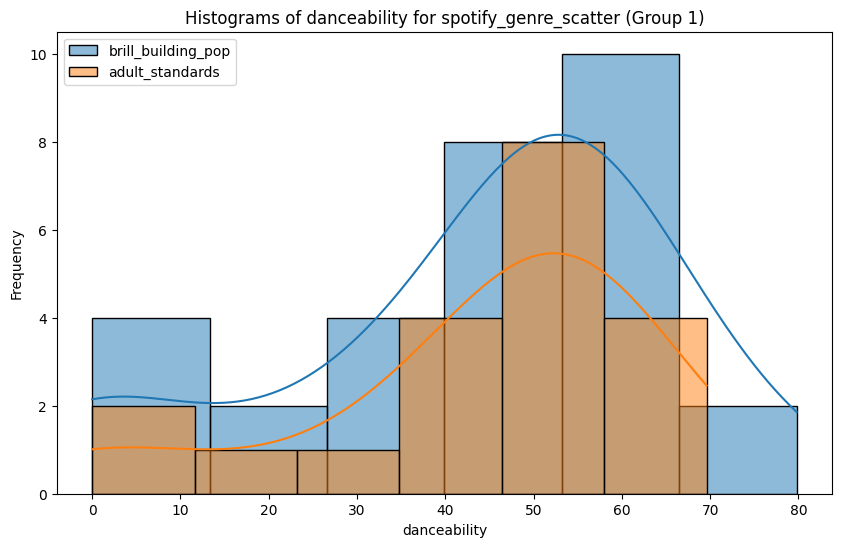

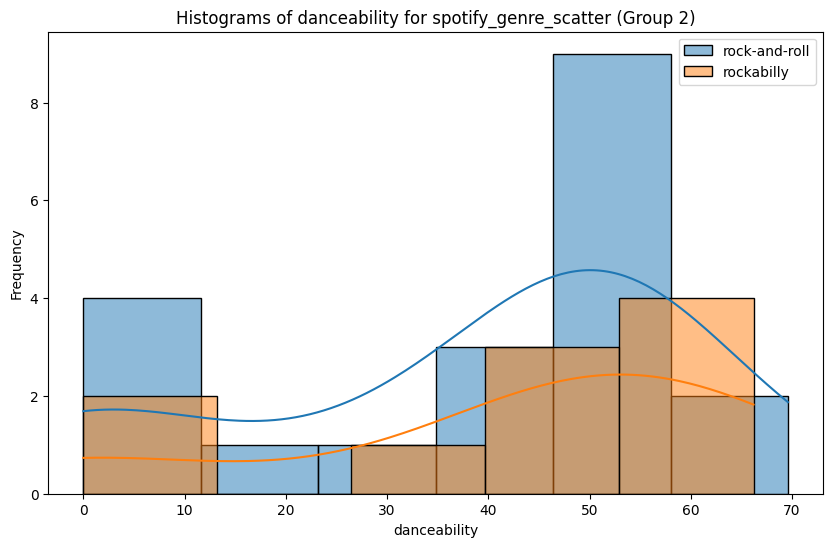

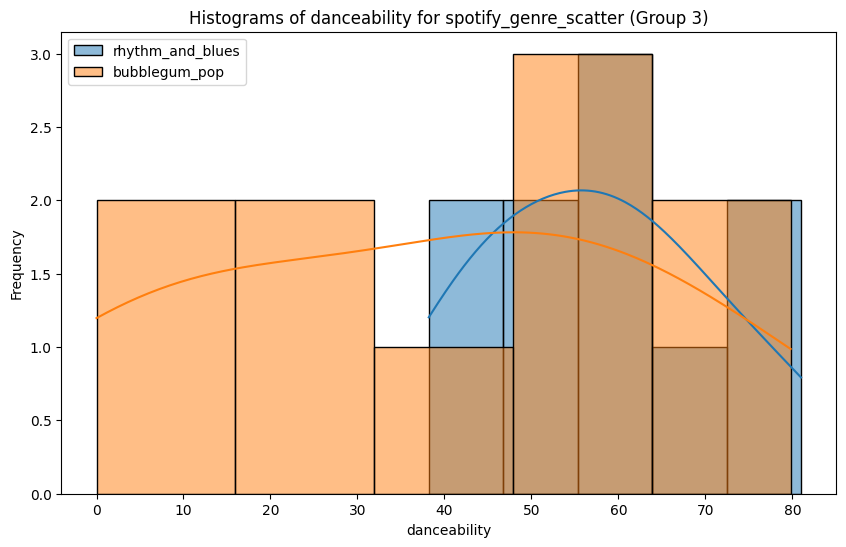

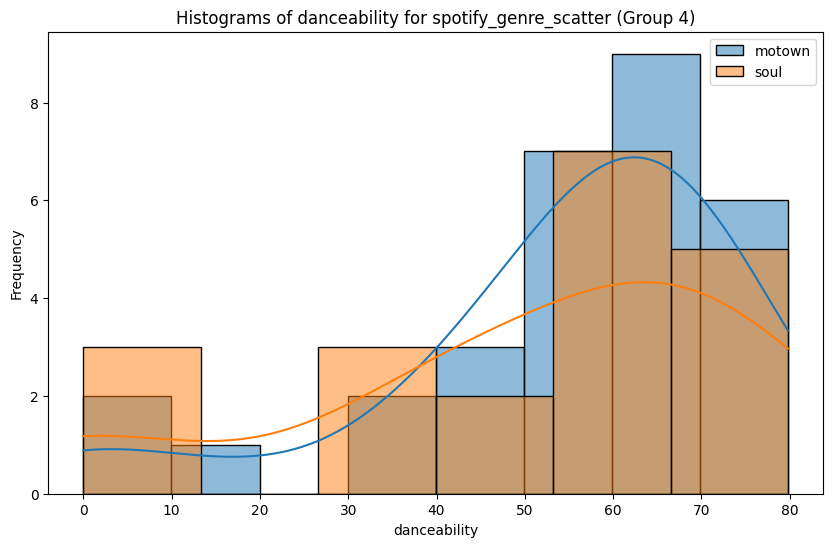

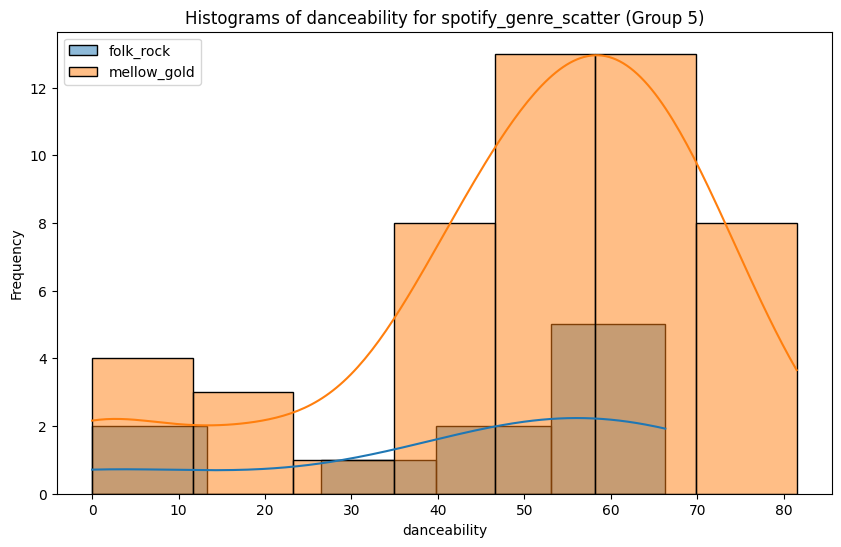

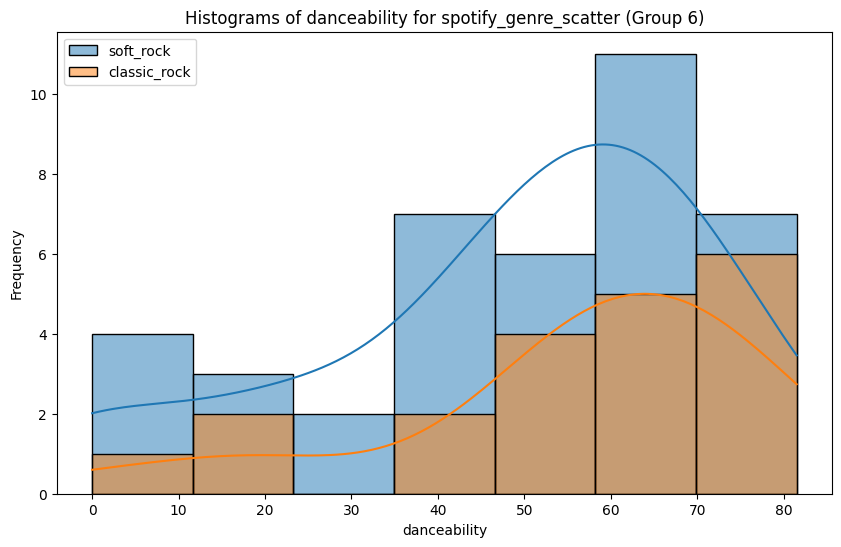

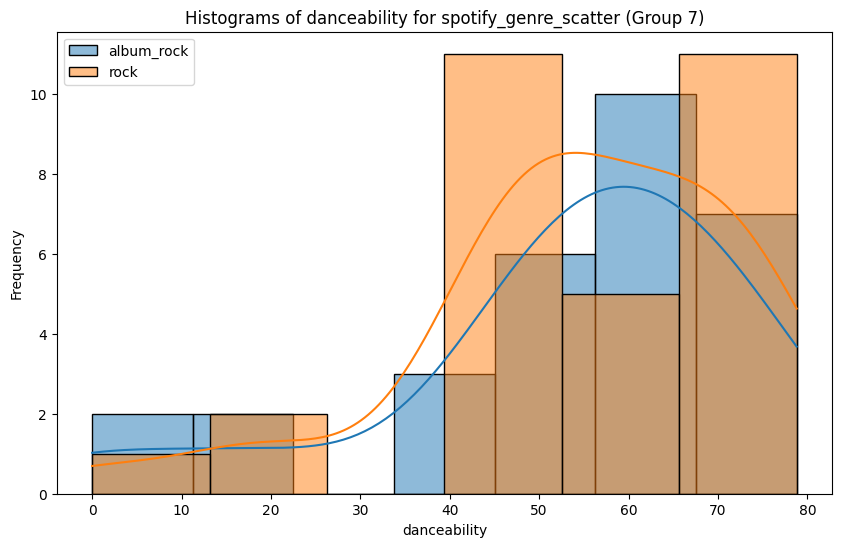

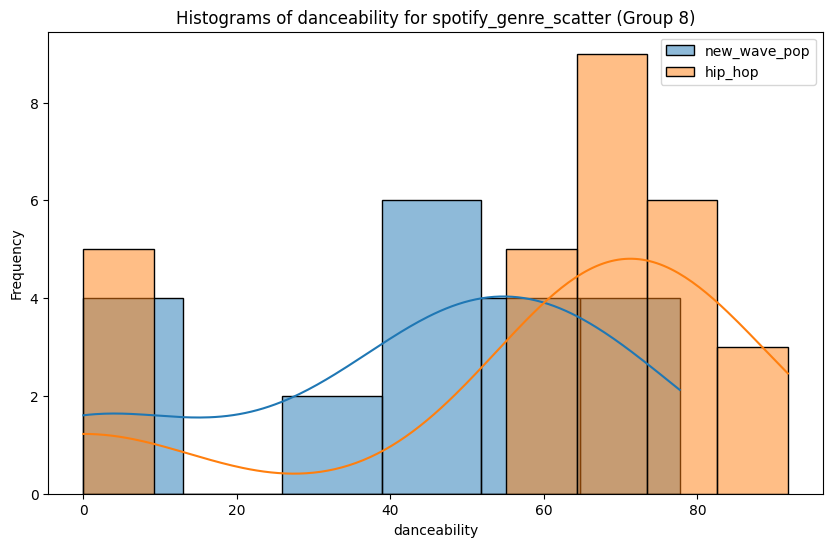

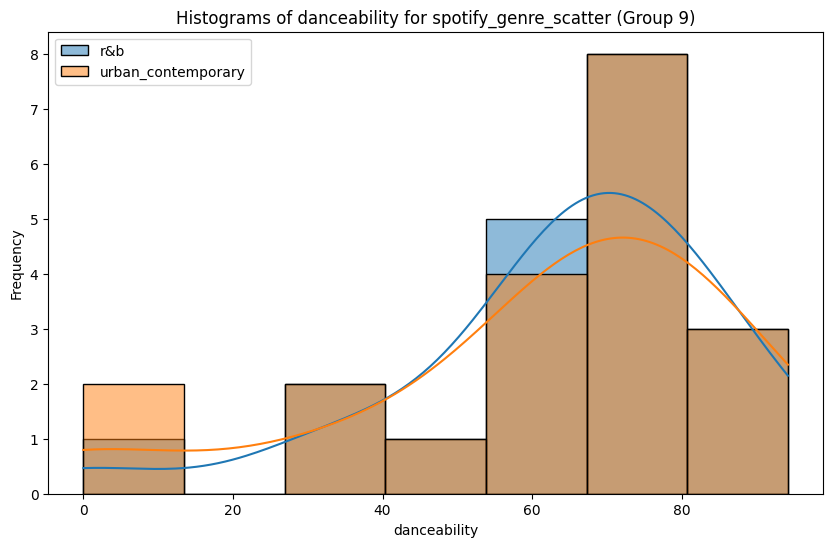

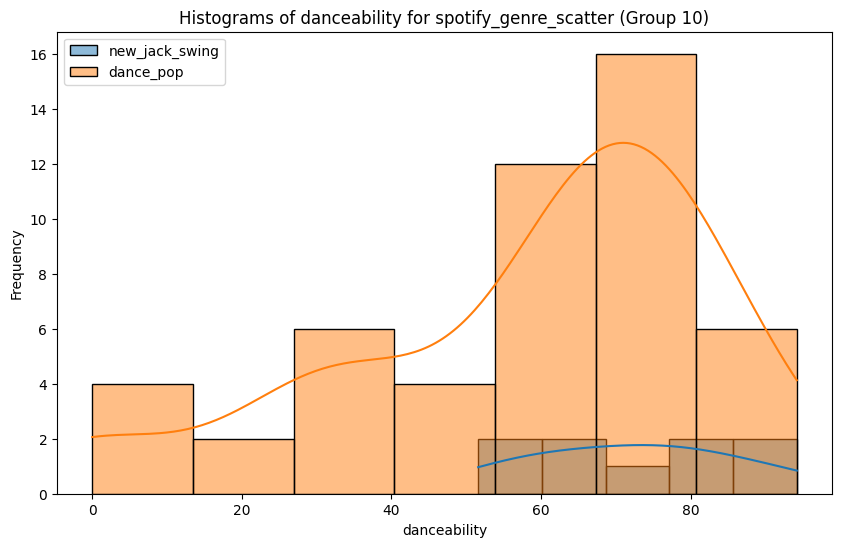

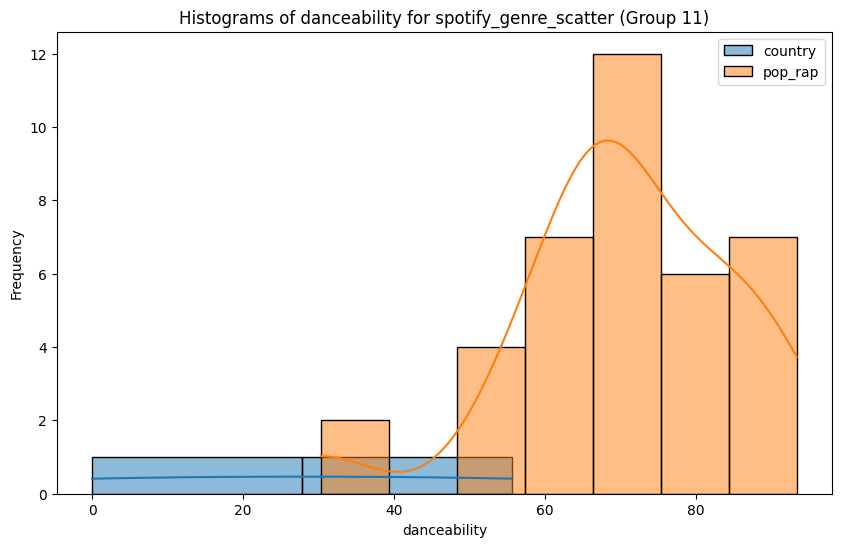

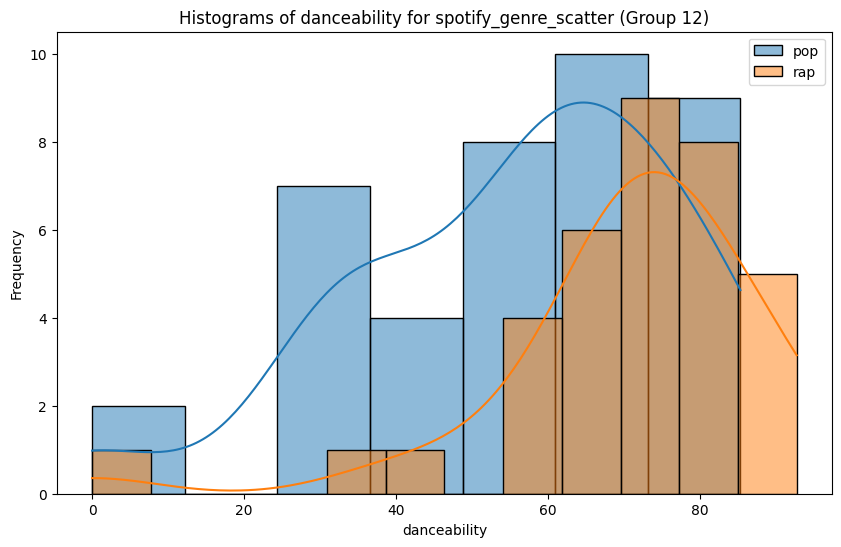

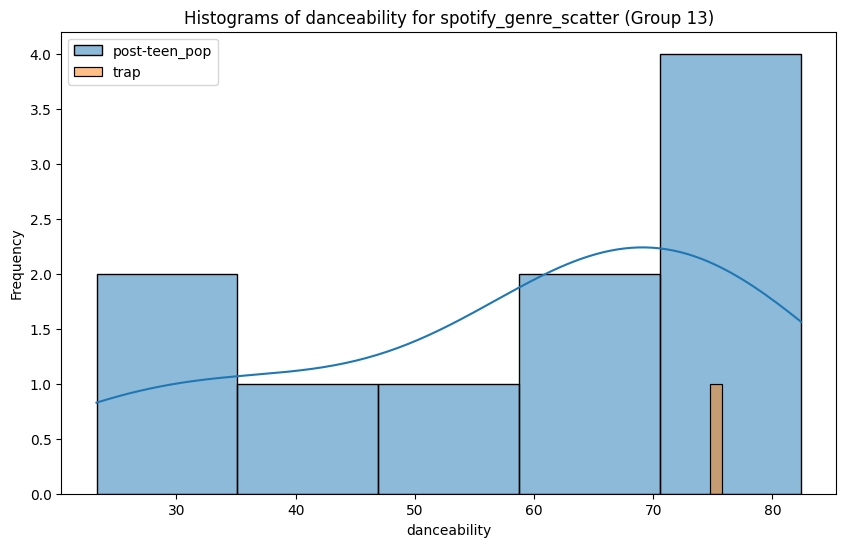

In [10]:
plot_grouped_histograms(df_danceability,"spotify_genre_scatter", "danceability",2)

In [11]:
#pinta_distribucion_categoricas(df_danceability,["spotify_genre_scatter"], relativa= False, mostrar_valores= False)
df_danceability.groupby("spotify_genre_scatter")["danceability"].describe()

count       mean        std   min     25%    50%  \
spotify_genre_scatter                                                     
adult_standards         20.0  44.240000  19.296643   0.0  38.050  51.15   
album_rock              30.0  53.166667  20.214152   0.0  46.925  57.25   
brill_building_pop      30.0  43.600000  21.886888   0.0  34.825  50.15   
bubblegum_pop           10.0  37.710000  27.778627   0.0  17.750  42.35   
classic_rock            20.0  56.145000  21.222021   0.0  52.275  60.50   
country                  2.0  27.850000  39.385848   0.0  13.925  27.85   
dance_pop               50.0  57.800000  24.917988   0.0  41.400  66.65   
folk_rock               10.0  43.700000  25.010265   0.0  37.000  52.90   
hip_hop                 28.0  58.885714  29.167952   0.0  59.650  68.85   
mellow_gold             50.0  50.312000  20.465029   0.0  41.275  54.10   
motown                  30.0  54.536667  20.166026   0.0  49.775  59.90   
new_jack_swing           9.0  72.322222  13.775411  51.6  62.100  73.80   
new_wave_pop            20.0  42.745000  25.583475   0.0  26.600  47.30   
pop                     40.0  55.712500  21.415393   0.0  40.450  59.30   
pop_rap                 38.0  70.676316  14.593176  30.3  64.900  70.25   
post-teen_pop           10.0  58.470000  19.983774  23.3  45.650  63.95   
r&b                     20.0  63.930000  21.838862   0.0  58.750  67.40   
rap                     35.0  70.822857  17.663989   0.0  67.900  72.00   
rhythm_and_blues        10.0  57.510000  13.498514  38.2  48.250  57.50   
rock                    30.0  54.430000  18.047068   0.0  46.425  55.95   
rock-and-roll           20.0  37.815000  22.316651   0.0  27.175  49.75   
rockabilly              10.0  42.040000  23.617141   0.0  38.575  51.45   
soft_rock               40.0  48.357500  22.797052   0.0  40.400  53.75   
soul                    20.0  50.295000  25.509946   0.0  39.300  60.10   
trap                     1.0  75.300000        NaN  75.3  75.300  75.30   
urban_contemporary      20.0  61.325000  26.234747   0.0  56.625  67.40   

                          75%   max  
spotify_genre_scatter                
adult_standards        56.425  69.6  
album_rock             66.275  78.8  
brill_building_pop     56.300  79.8  
bubblegum_pop          53.150  79.8  
classic_rock           70.700  81.5  
country                41.775  55.7  
dance_pop              75.675  94.2  
folk_rock              61.725  66.3  
hip_hop                75.125  91.8  
mellow_gold            64.975  81.5  
motown                 66.450  79.8  
new_jack_swing         78.700  94.2  
new_wave_pop           60.750  77.7  
pop                    71.175  85.3  
pop_rap                81.450  93.4  
post-teen_pop          72.200  82.4  
r&b                    77.550  94.2  
rap                    80.900  92.7  
rhythm_and_blues       65.175  81.0  
rock                   69.400  78.8  
rock-and-roll          52.150  69.6  
rockabilly             57.250  66.2  
soft_rock              64.000  81.5  
soul                   68.225  79.8  
trap                   75.300  75.3  
urban_contemporary     77.550  94.2

In [12]:
df_danceability[["danceability","spotify_genre_count"]].describe()

danceability  spotify_genre_count
count    603.000000           603.000000
mean      54.493864           588.112769
std       23.268579           216.397929
min        0.000000           246.000000
25%       44.200000           391.500000
50%       59.000000           586.000000
75%       70.650000           737.000000
max       94.200000          1319.000000

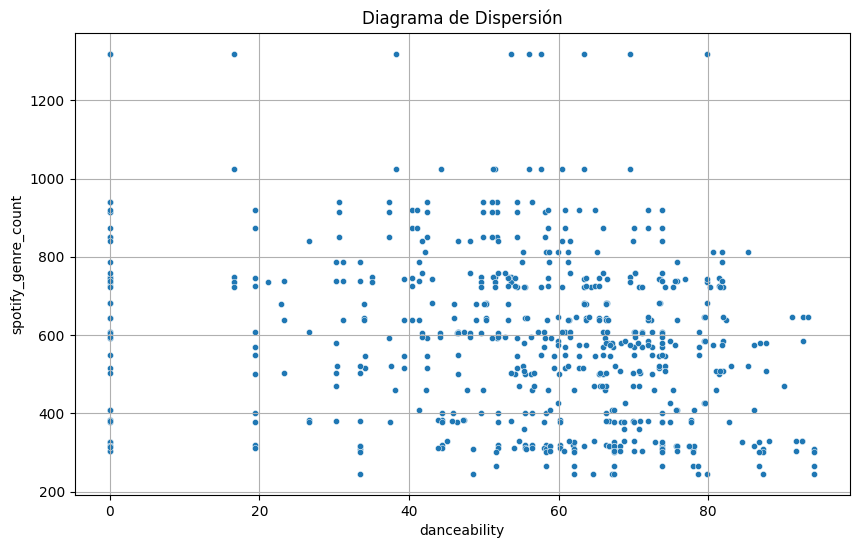

In [8]:
grafico_dispersion_con_correlacion(df_danceability,"danceability","spotify_genre_count", 20)

In [9]:
df_danceability[["danceability","spotify_genre_count"]].corr()

danceability  spotify_genre_count
danceability             1.000000            -0.197617
spotify_genre_count     -0.197617             1.000000

**Periodo de 01/01/1958 a 31/12/1962**


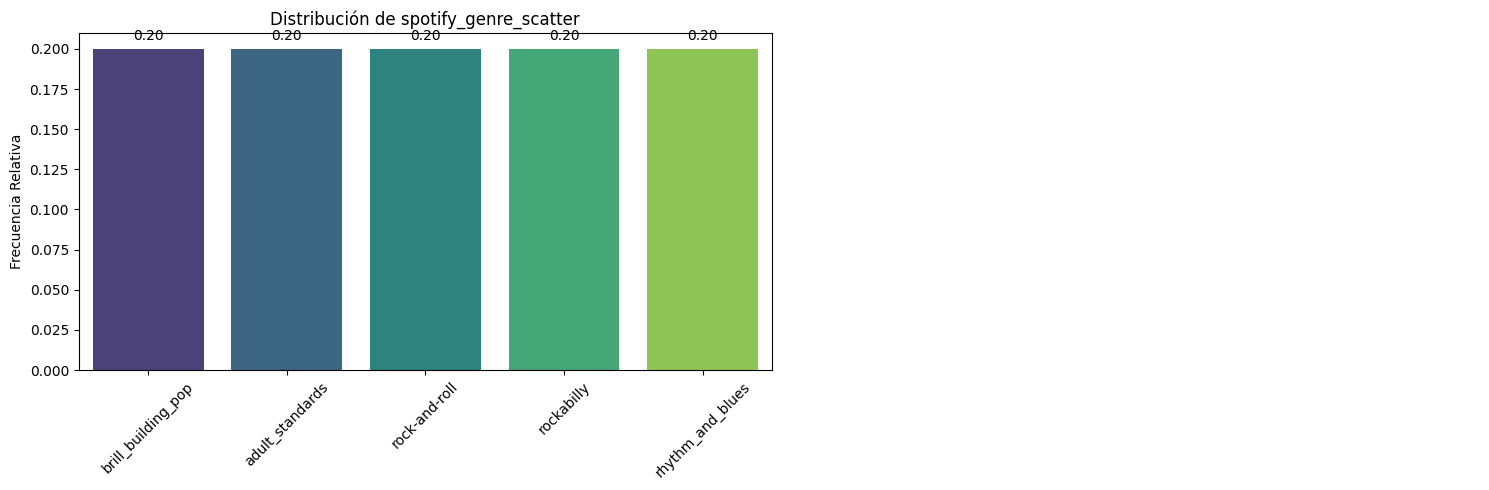

**Periodo de 01/01/1958 a 31/12/1962**
(2,)


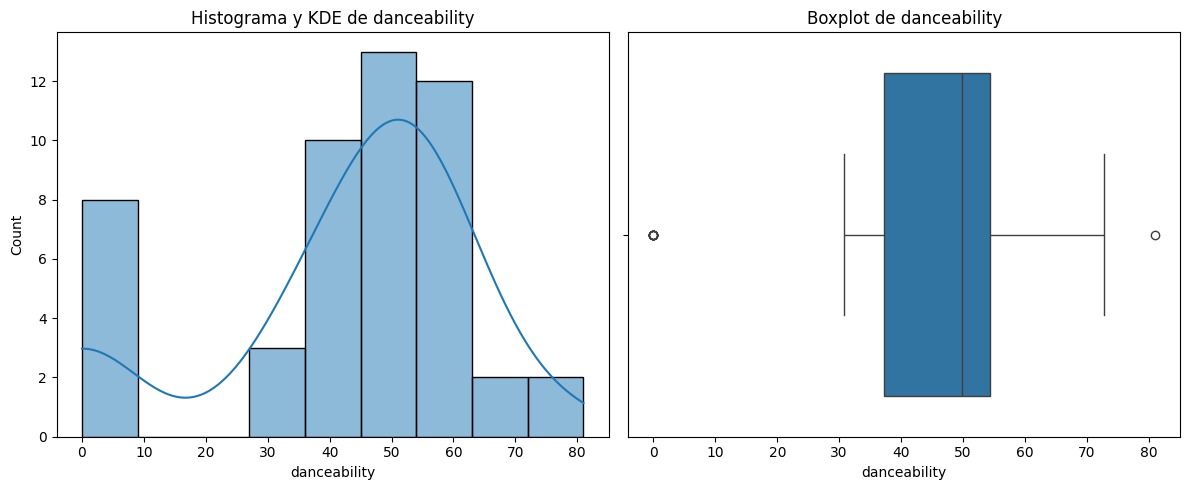

**Periodo de 01/01/1958 a 31/12/1962**


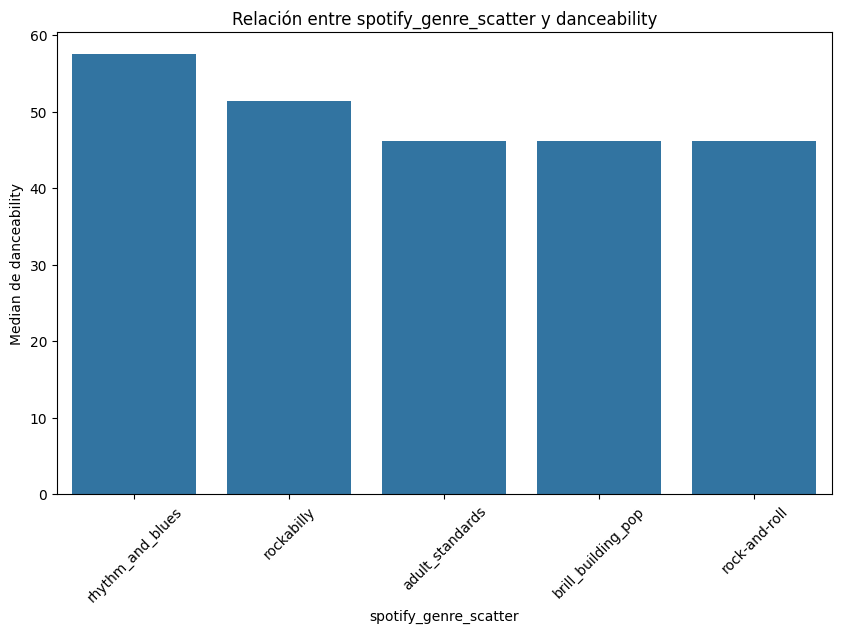

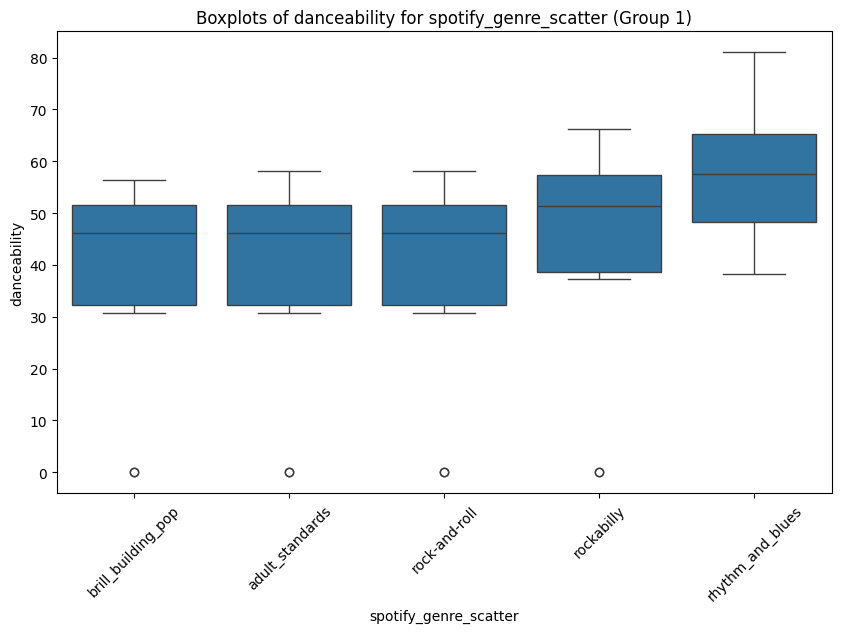

**Periodo de 01/01/1958 a 31/12/1962**


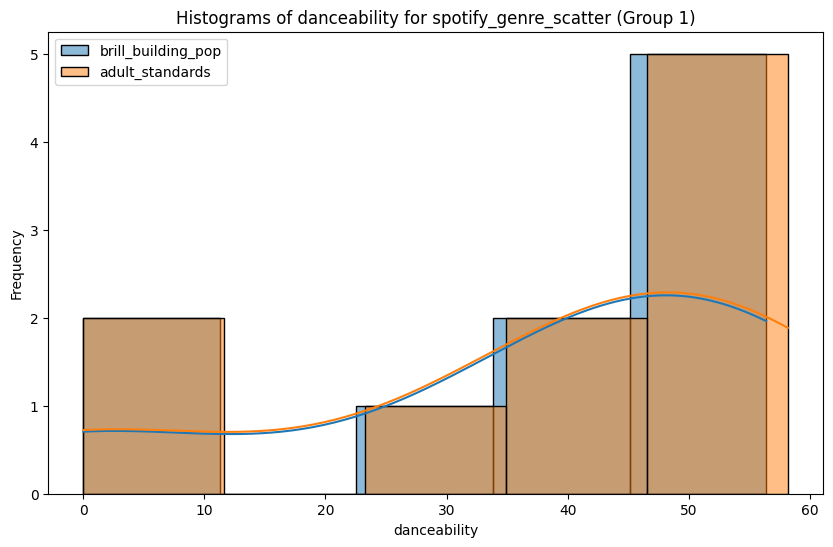

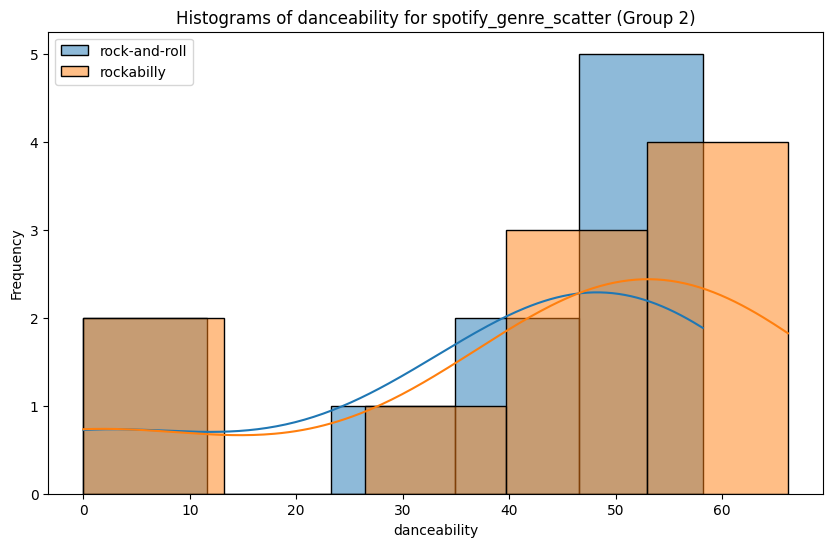

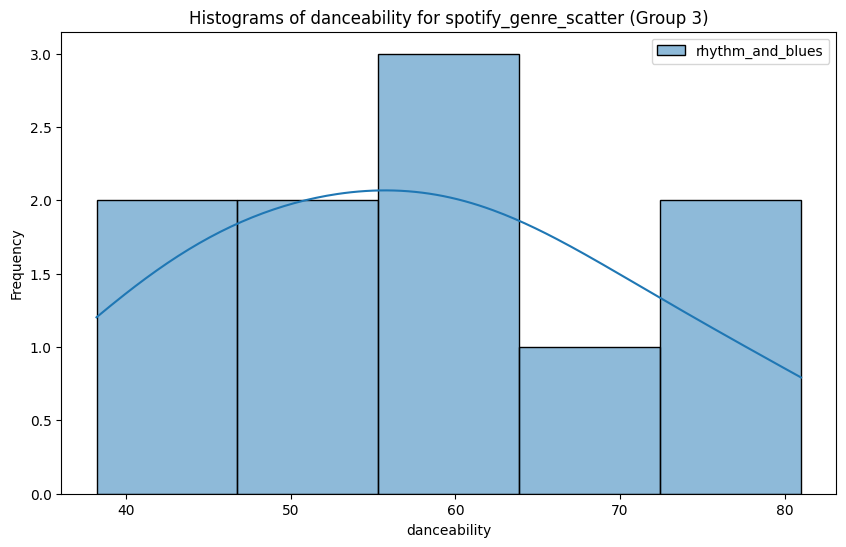

**Periodo de 01/01/1958 a 31/12/1962**
       danceability  spotify_genre_count
count      50.00000            50.000000
mean       42.42200           752.200000
std        21.19282           192.318189
min         0.00000           461.000000
25%        37.30000           594.000000
50%        49.90000           852.000000
75%        54.40000           914.000000
max        81.00000           940.000000
**Periodo de 01/01/1958 a 31/12/1962**


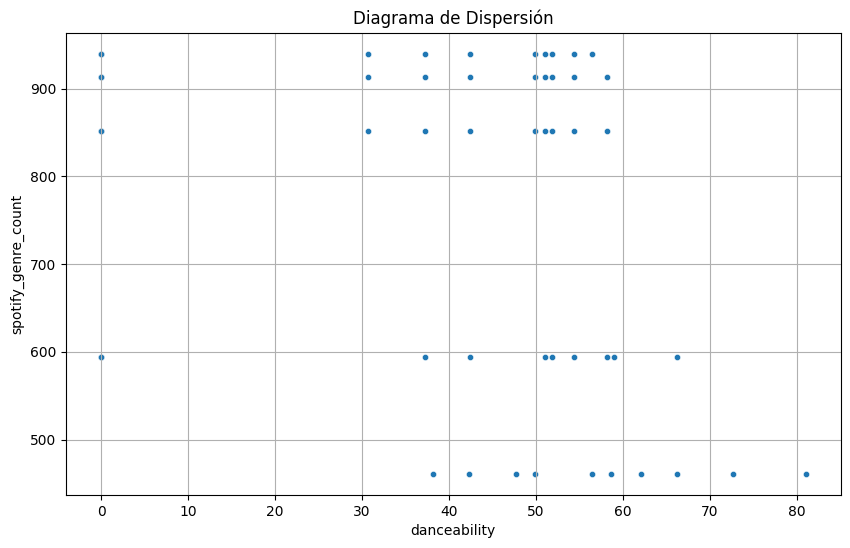

**Periodo de 01/01/1958 a 31/12/1962**
                     danceability  spotify_genre_count
danceability             1.000000            -0.327621
spotify_genre_count     -0.327621             1.000000
**Periodo de 01/01/1963 a 31/12/1967**


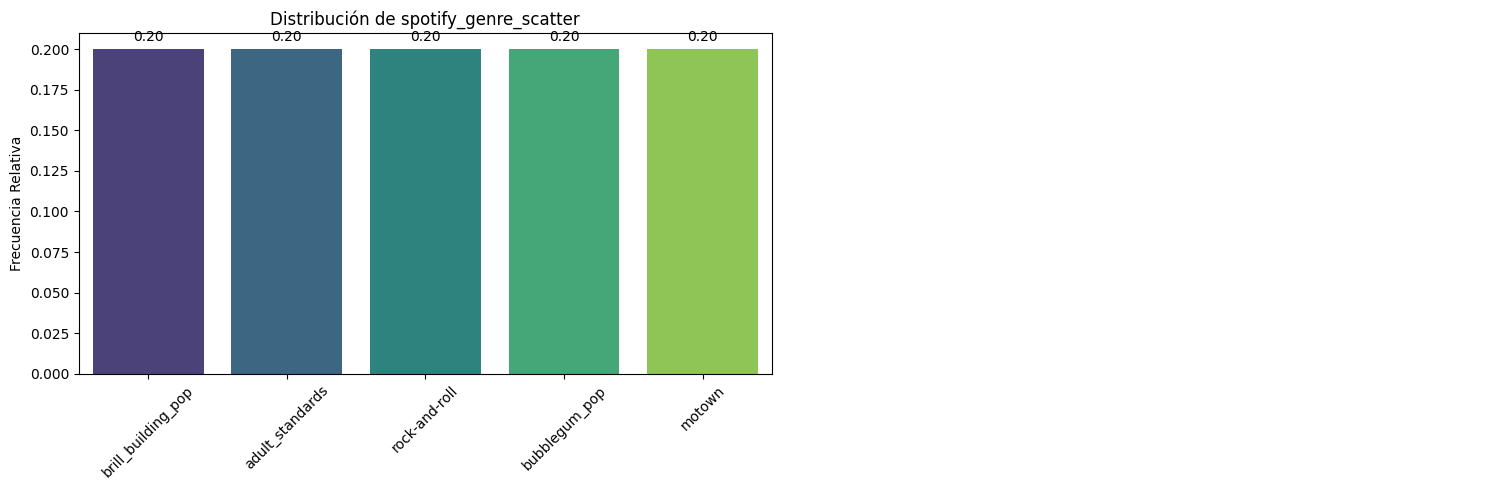

**Periodo de 01/01/1963 a 31/12/1967**
(2,)


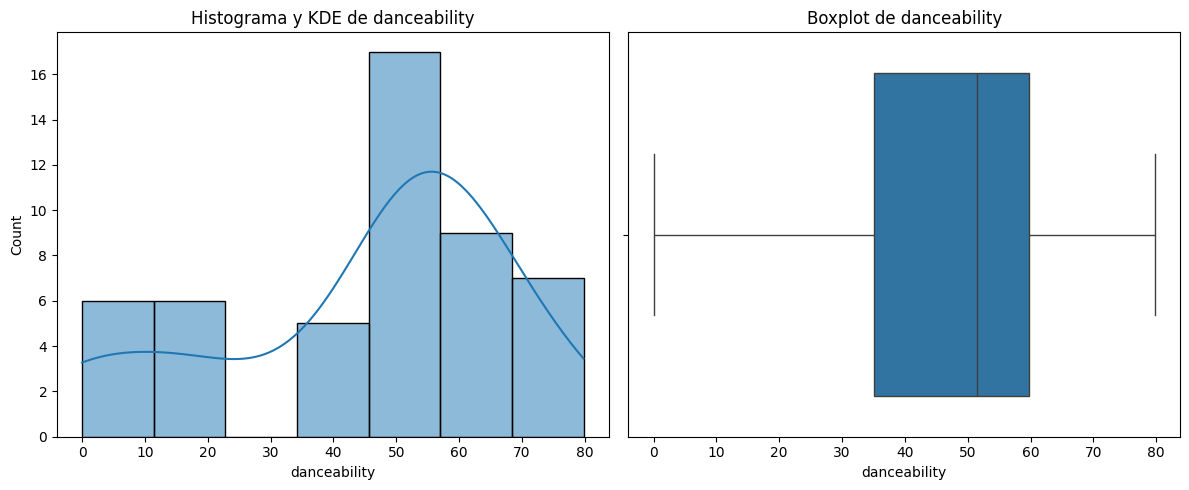

**Periodo de 01/01/1963 a 31/12/1967**


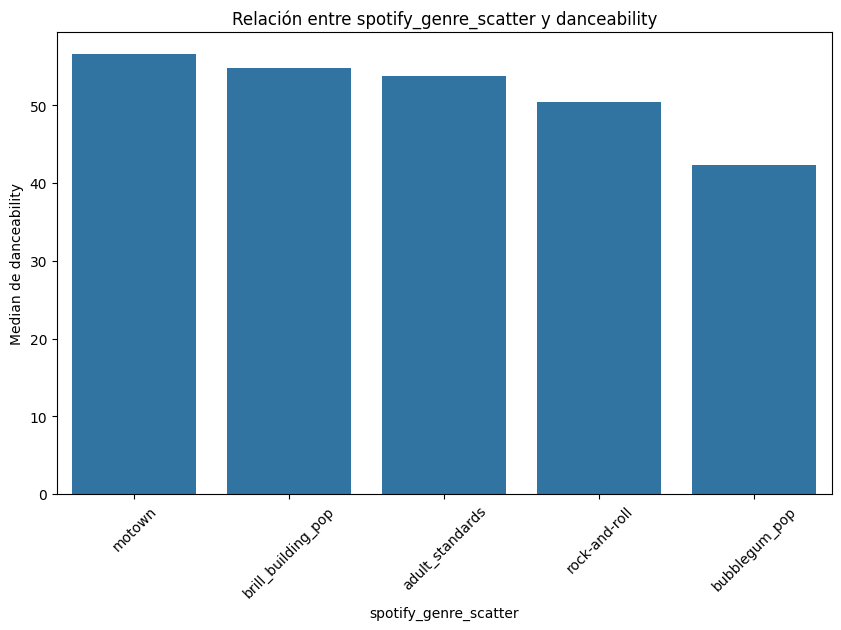

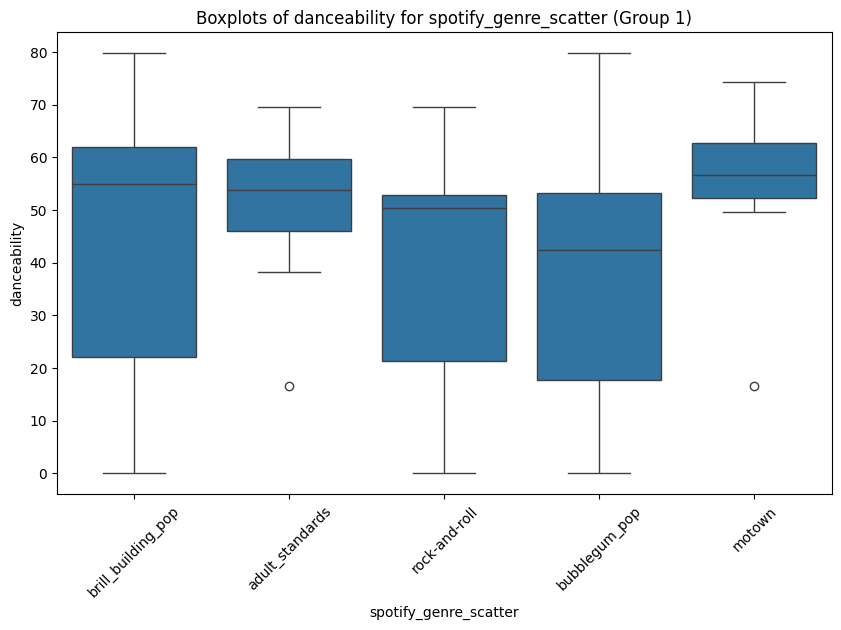

**Periodo de 01/01/1963 a 31/12/1967**


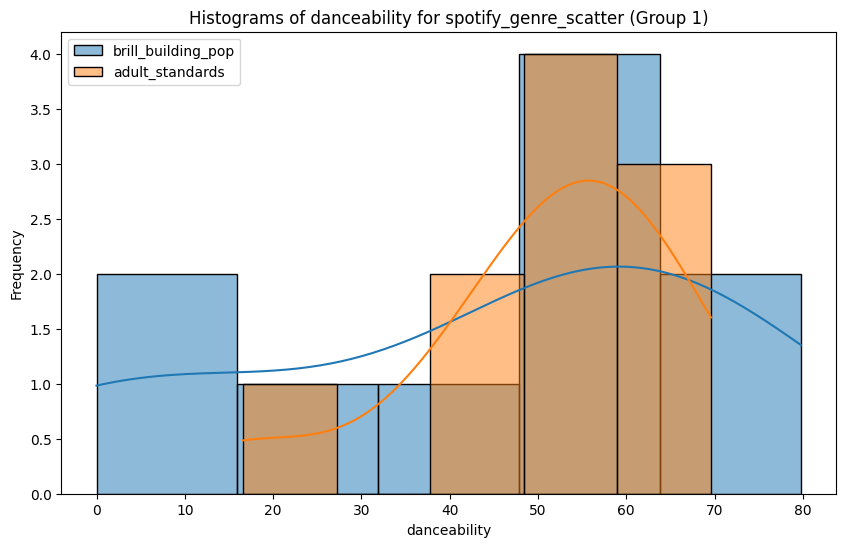

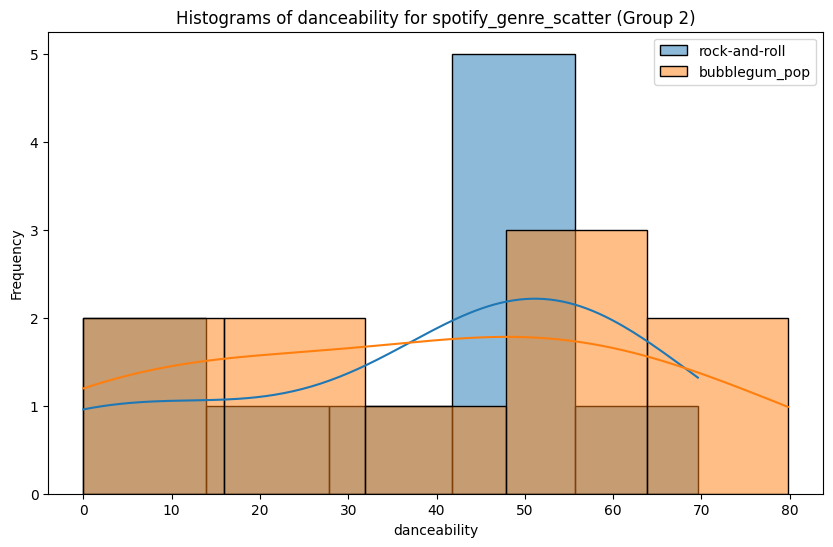

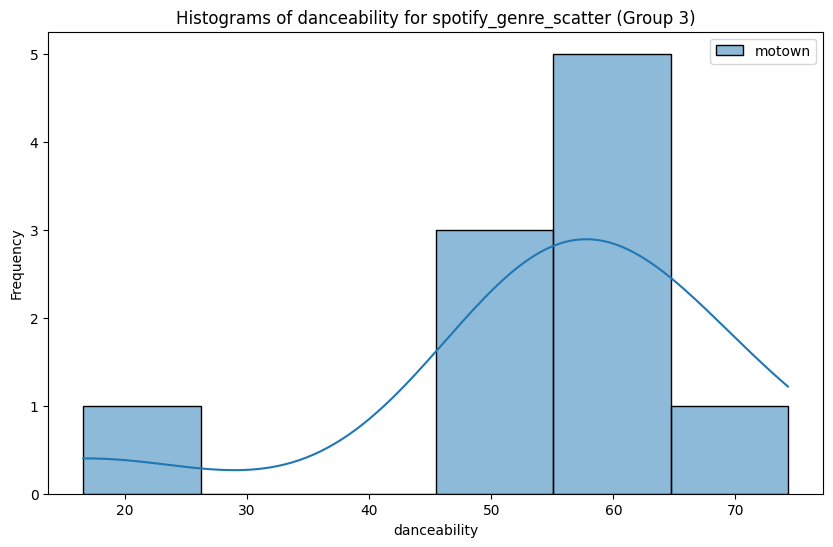

**Periodo de 01/01/1963 a 31/12/1967**
       danceability  spotify_genre_count
count     50.000000            50.000000
mean      44.990000           910.400000
std       23.093088           235.213841
min        0.000000           723.000000
25%       35.100000           737.000000
50%       51.500000           749.000000
75%       59.725000          1024.000000
max       79.800000          1319.000000
**Periodo de 01/01/1963 a 31/12/1967**


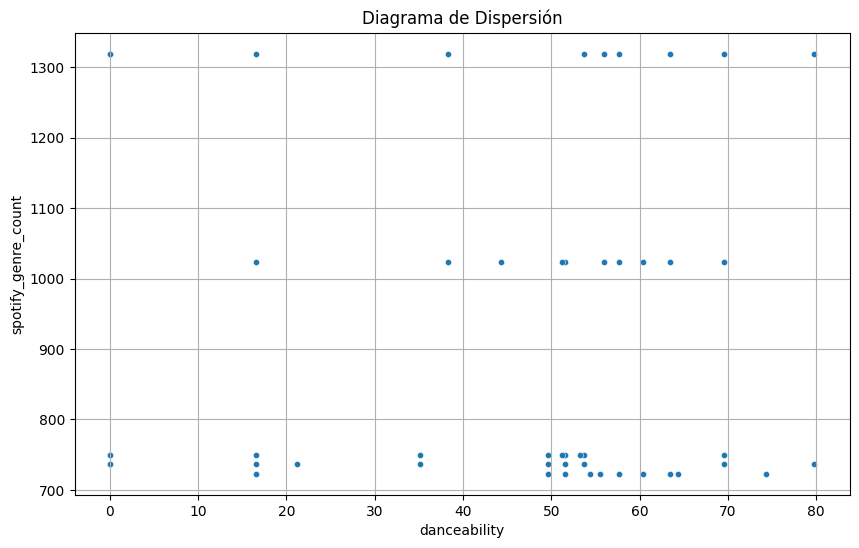

**Periodo de 01/01/1963 a 31/12/1967**
                     danceability  spotify_genre_count
danceability             1.000000             0.023087
spotify_genre_count      0.023087             1.000000
**Periodo de 01/01/1968 a 31/12/1972**


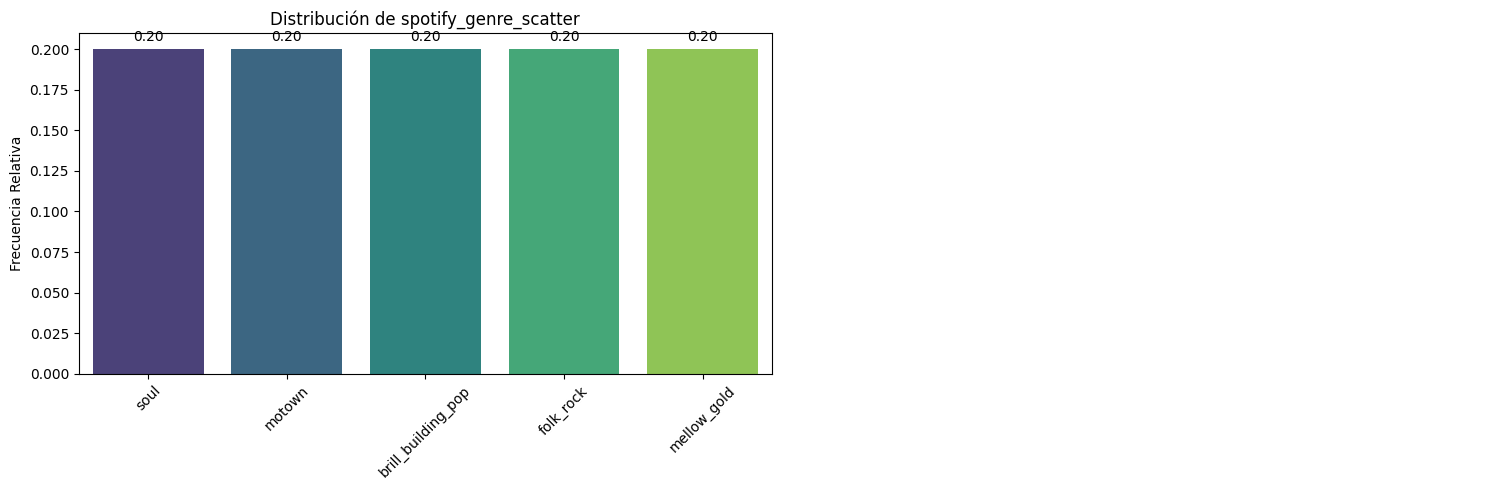

**Periodo de 01/01/1968 a 31/12/1972**
(2,)


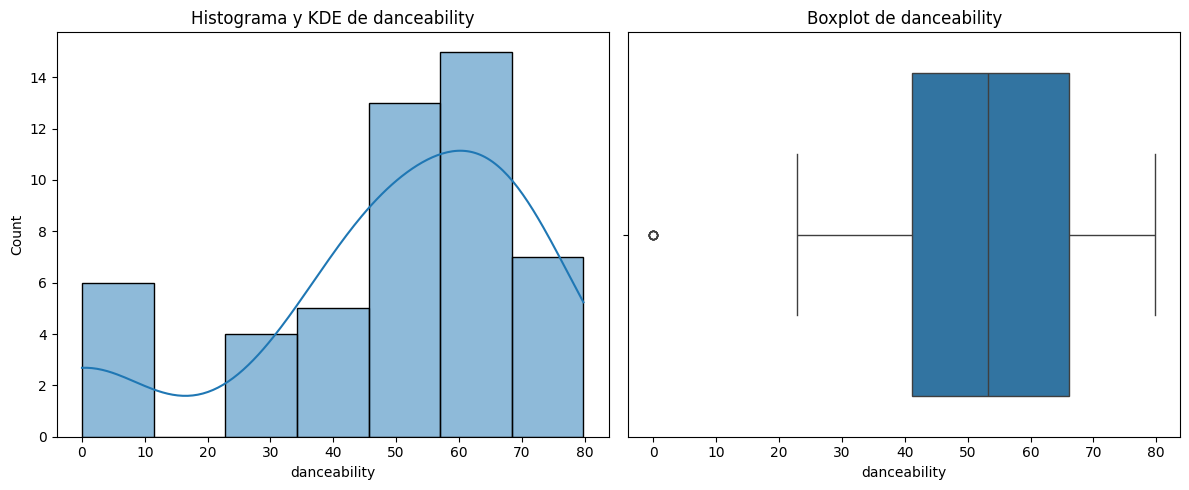

**Periodo de 01/01/1968 a 31/12/1972**


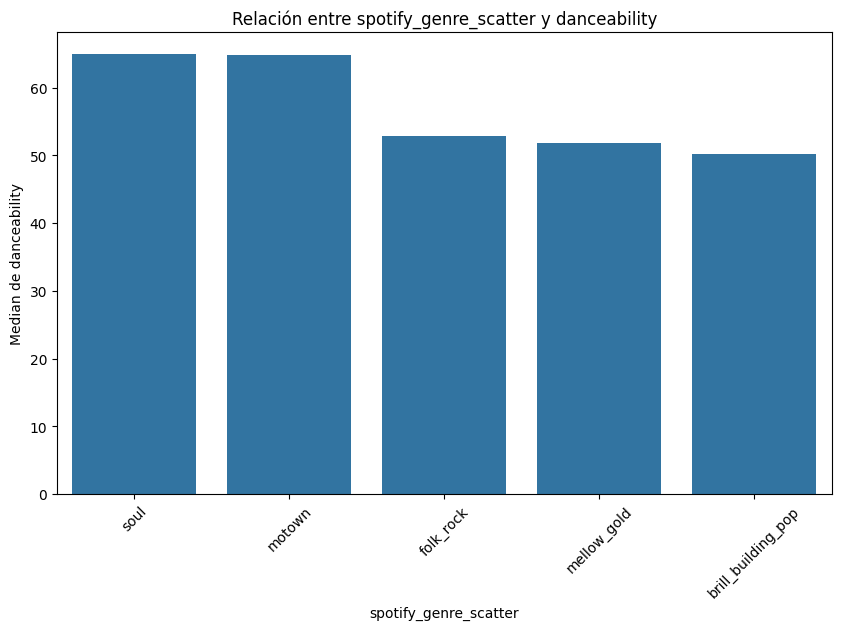

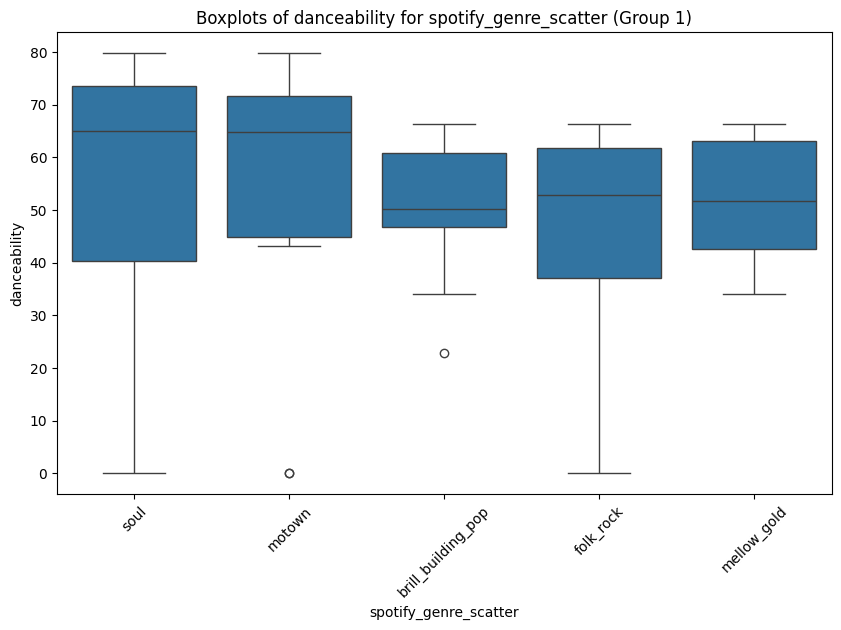

**Periodo de 01/01/1968 a 31/12/1972**


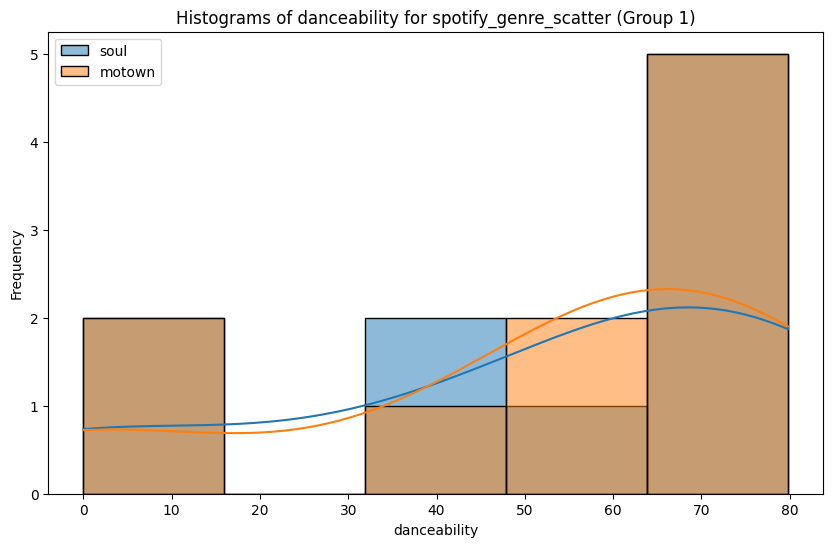

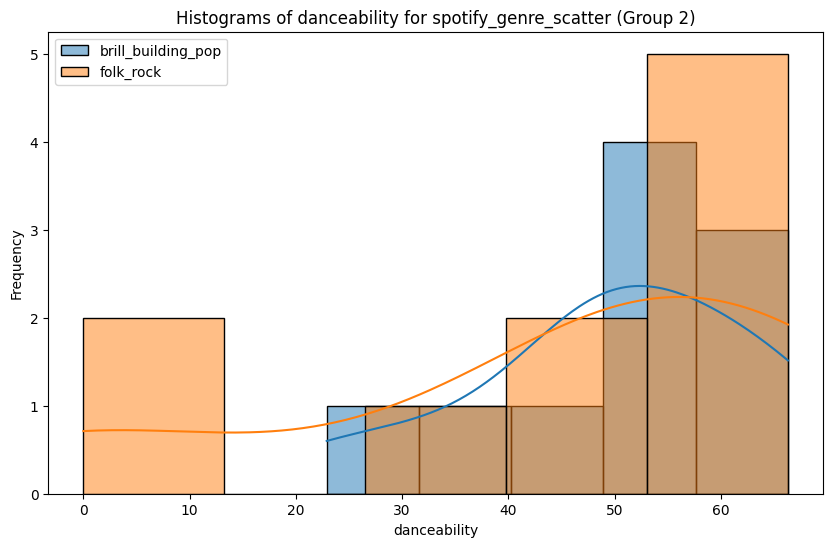

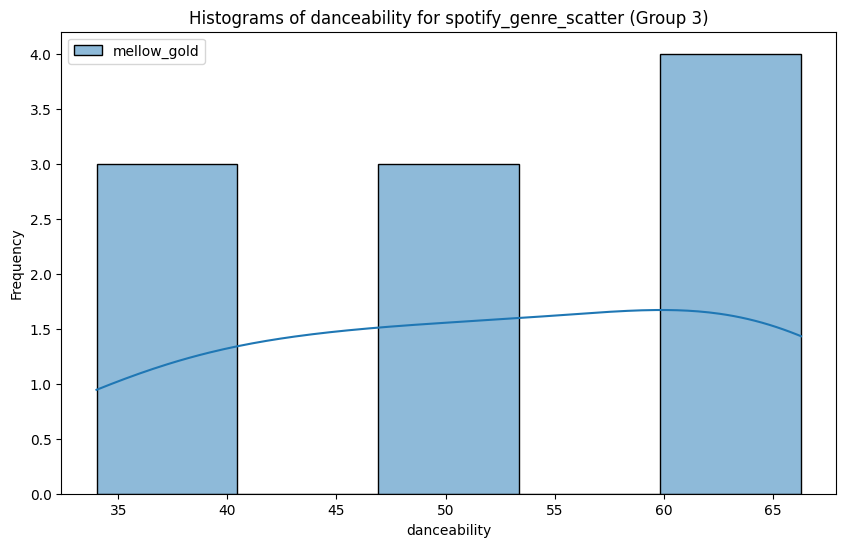

**Periodo de 01/01/1968 a 31/12/1972**
       danceability  spotify_genre_count
count     50.000000            50.000000
mean      49.828000           677.600000
std       22.614489            37.599392
min        0.000000           639.000000
25%       41.075000           644.000000
50%       53.300000           679.000000
75%       66.075000           683.000000
max       79.800000           743.000000
**Periodo de 01/01/1968 a 31/12/1972**


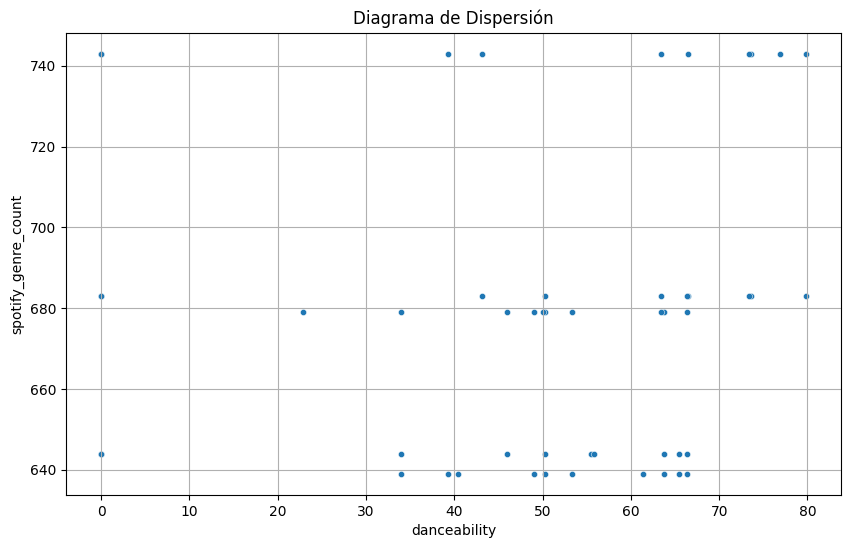

**Periodo de 01/01/1968 a 31/12/1972**
                     danceability  spotify_genre_count
danceability             1.000000             0.056609
spotify_genre_count      0.056609             1.000000
**Periodo de 01/01/1973 a 31/12/1977**


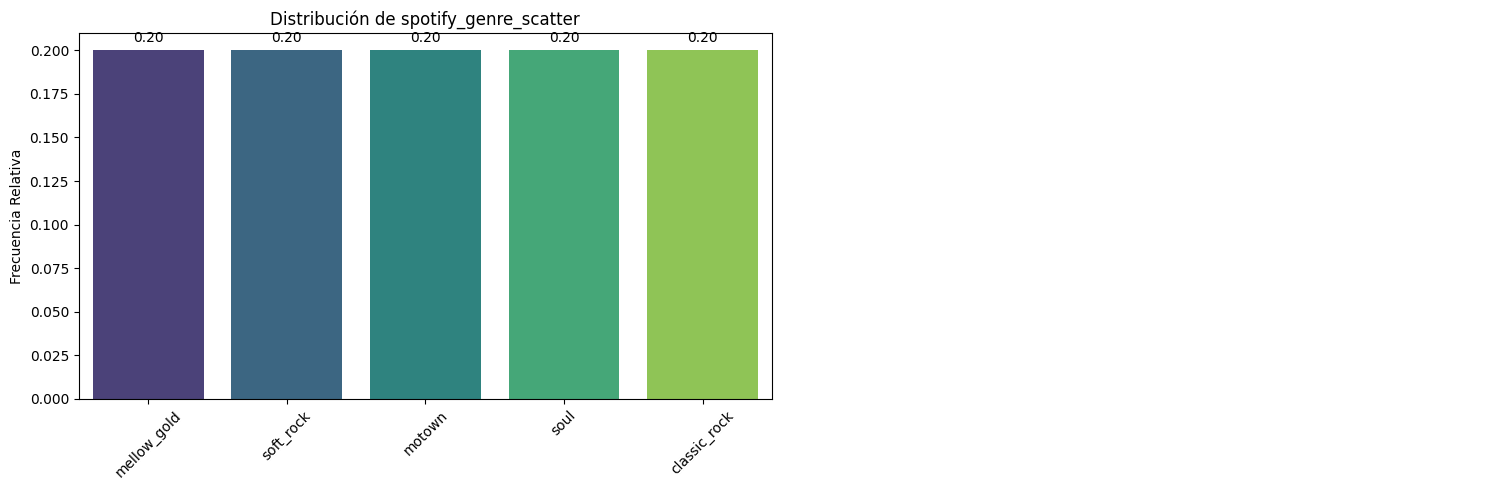

**Periodo de 01/01/1973 a 31/12/1977**
(2,)


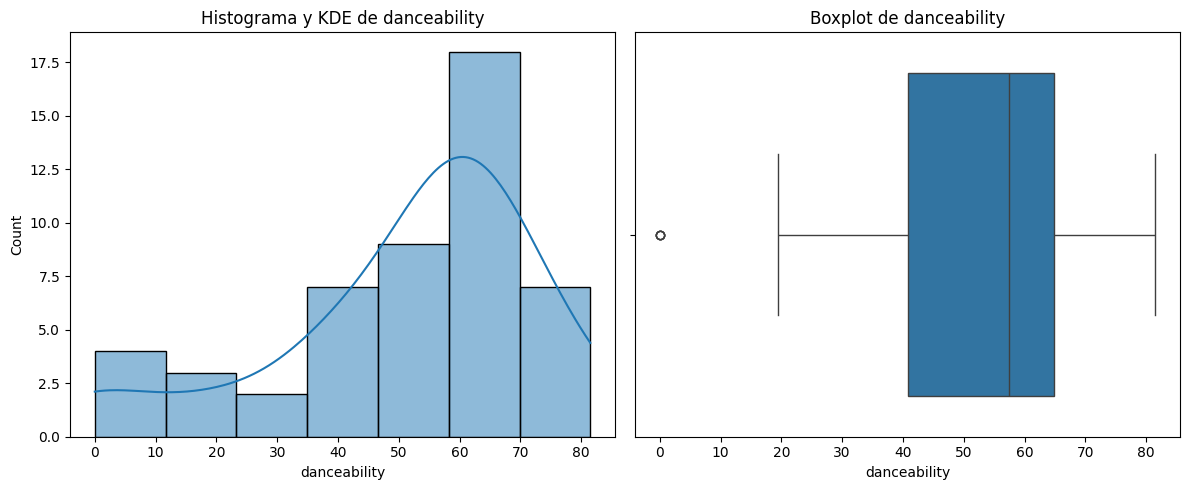

**Periodo de 01/01/1973 a 31/12/1977**


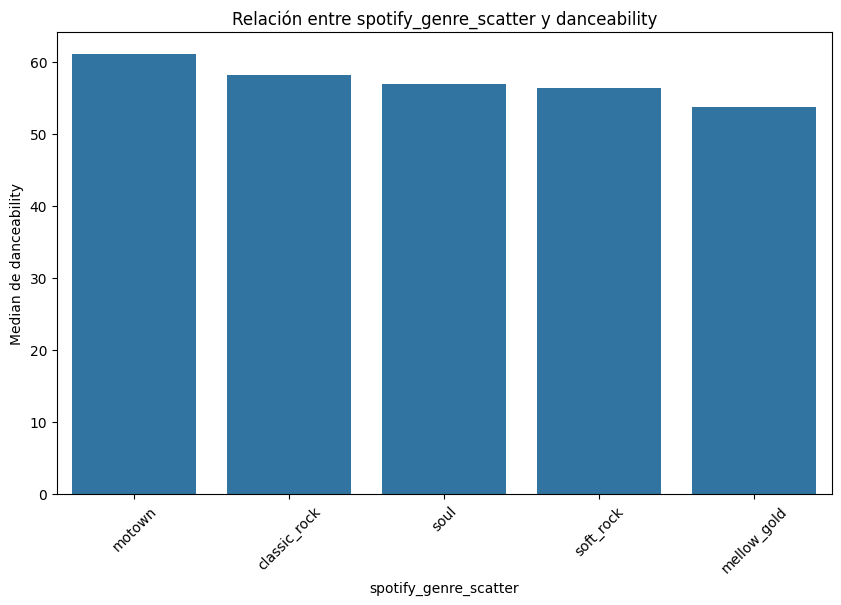

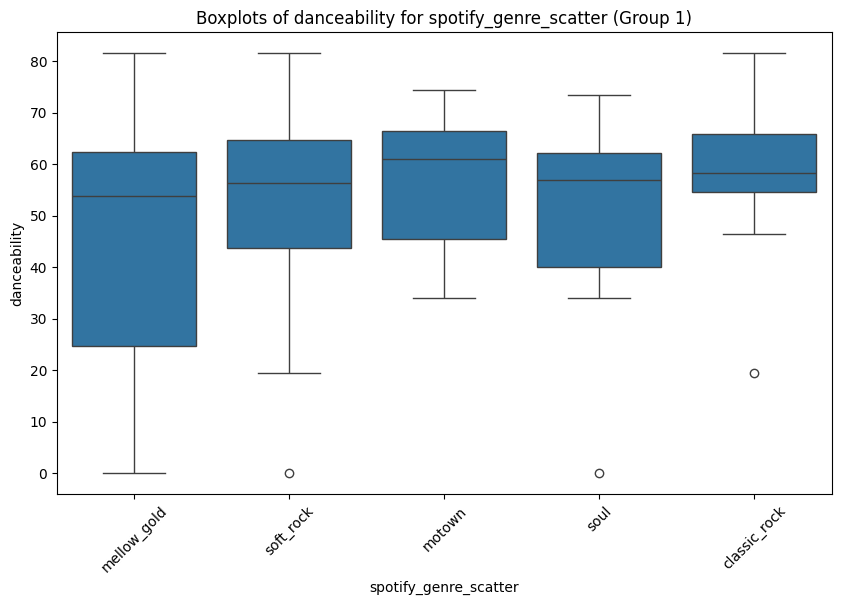

**Periodo de 01/01/1973 a 31/12/1977**


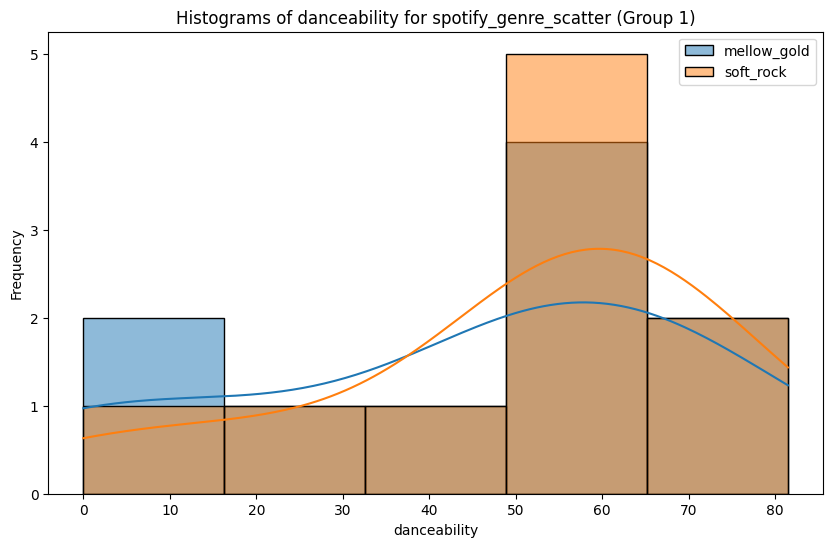

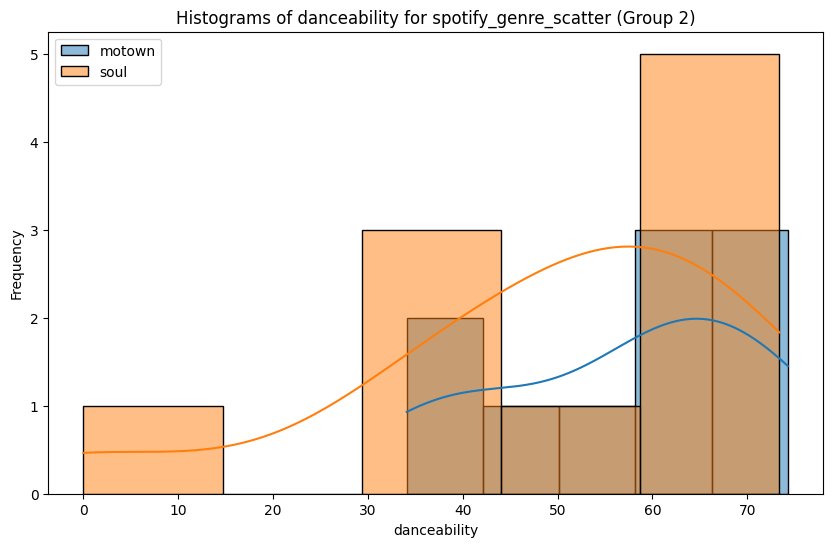

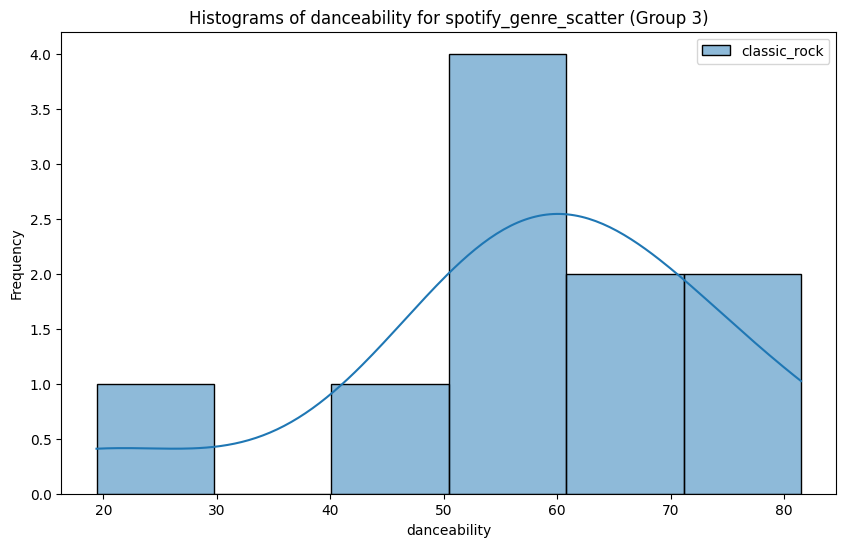

**Periodo de 01/01/1973 a 31/12/1977**
       danceability  spotify_genre_count
count     50.000000            50.000000
mean      51.540000           606.800000
std       21.286673           107.337728
min        0.000000           502.000000
25%       40.900000           515.000000
50%       57.450000           546.000000
75%       64.900000           725.000000
max       81.500000           746.000000
**Periodo de 01/01/1973 a 31/12/1977**


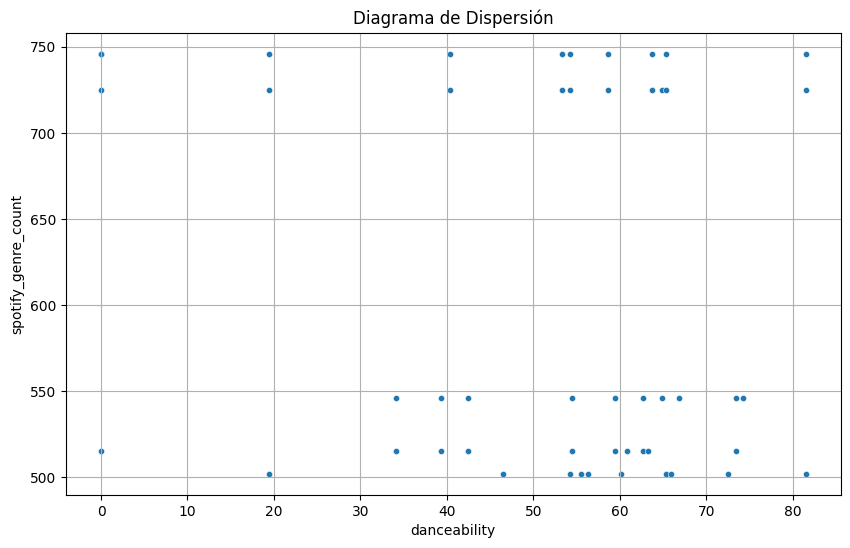

**Periodo de 01/01/1973 a 31/12/1977**
                     danceability  spotify_genre_count
danceability             1.000000            -0.180595
spotify_genre_count     -0.180595             1.000000
**Periodo de 01/01/1978 a 31/12/1982**


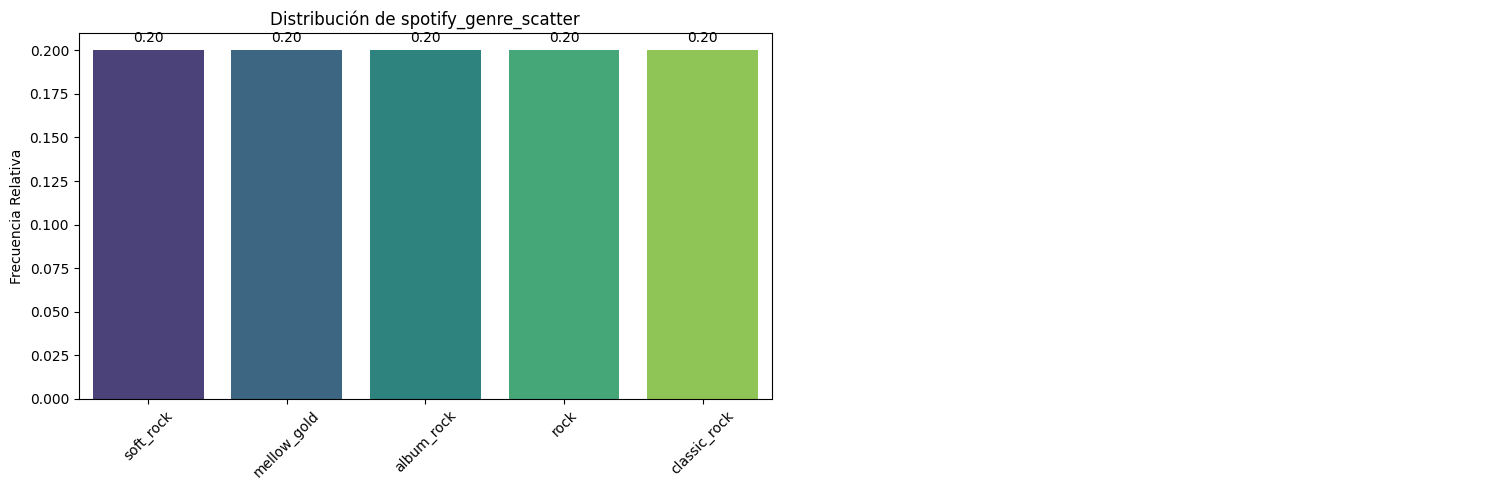

**Periodo de 01/01/1978 a 31/12/1982**
(2,)


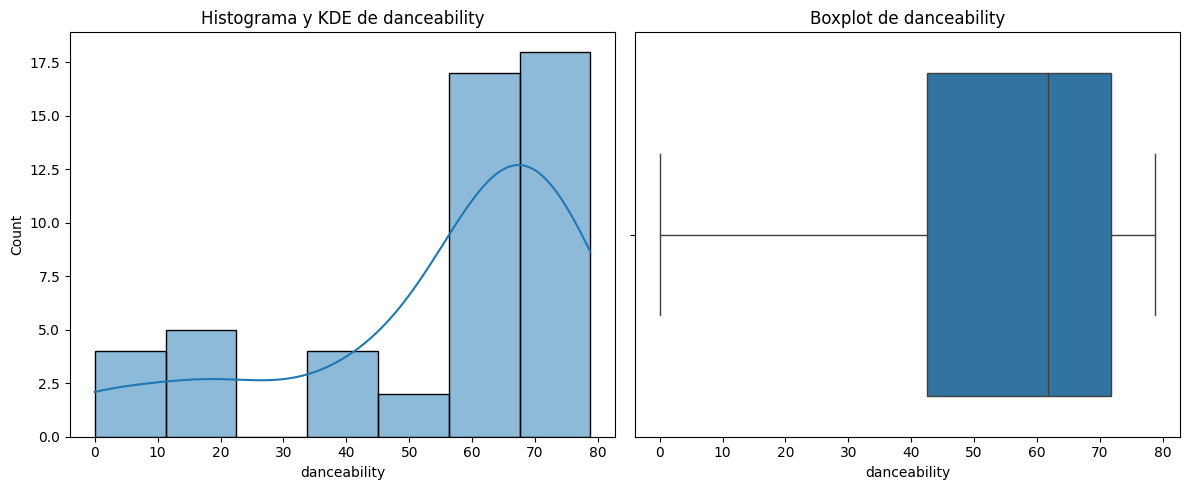

**Periodo de 01/01/1978 a 31/12/1982**


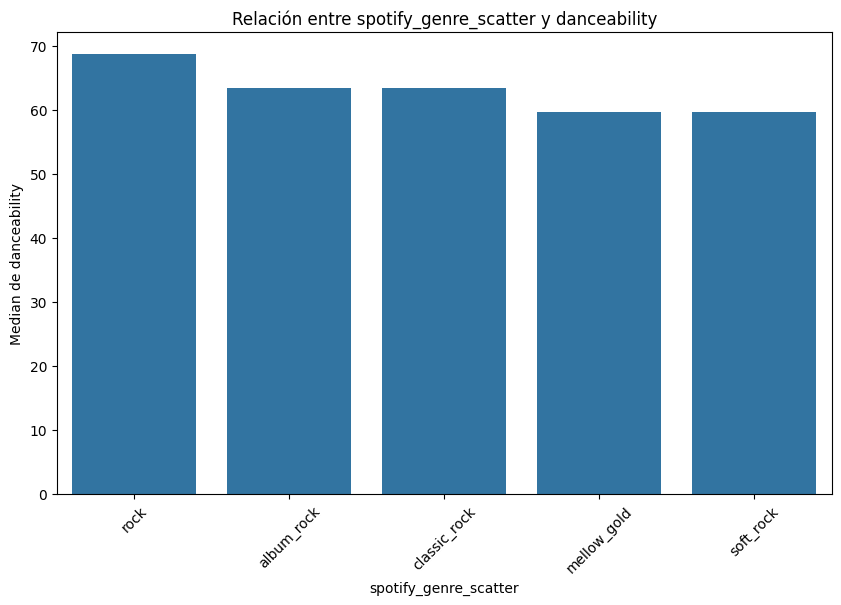

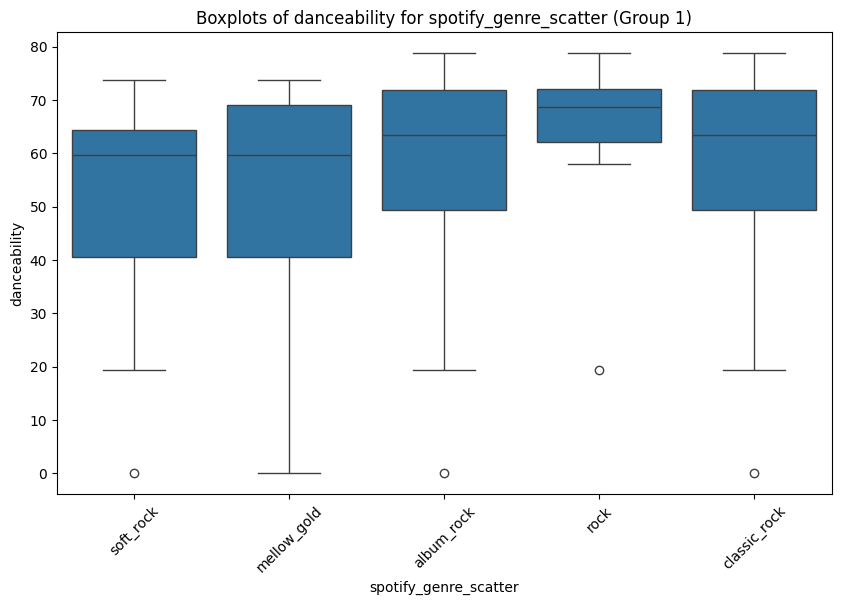

**Periodo de 01/01/1978 a 31/12/1982**


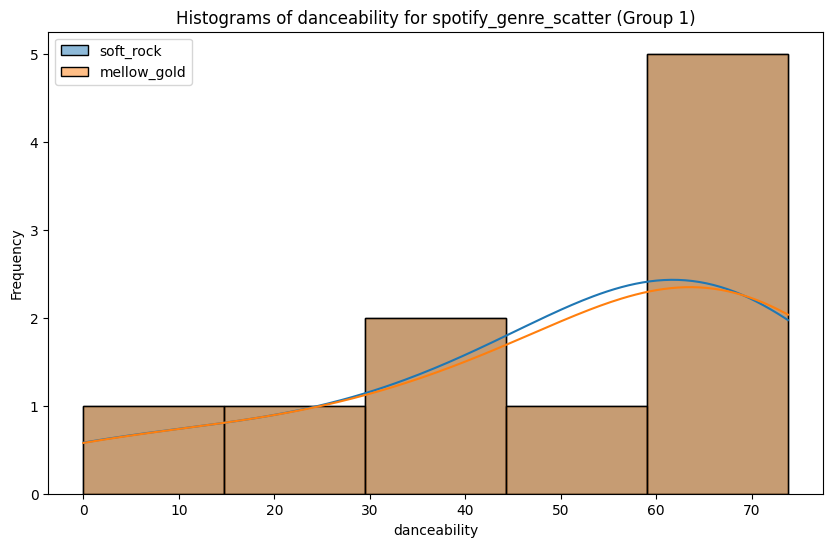

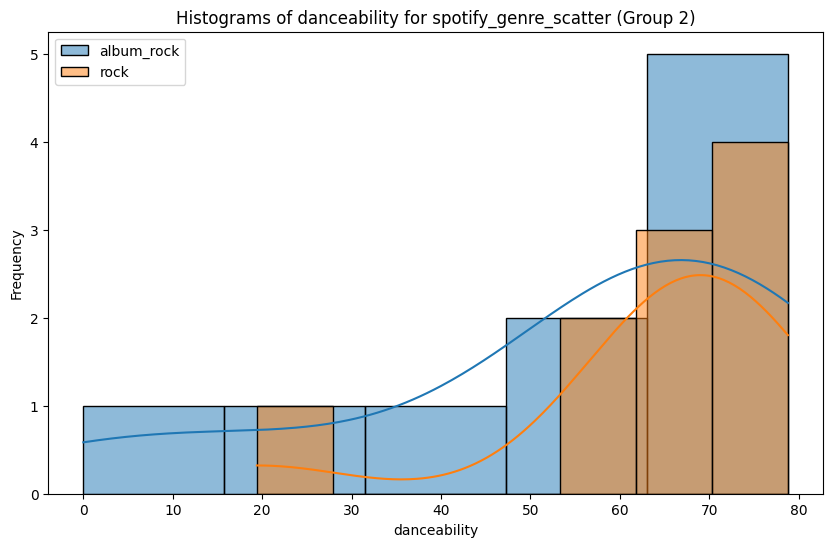

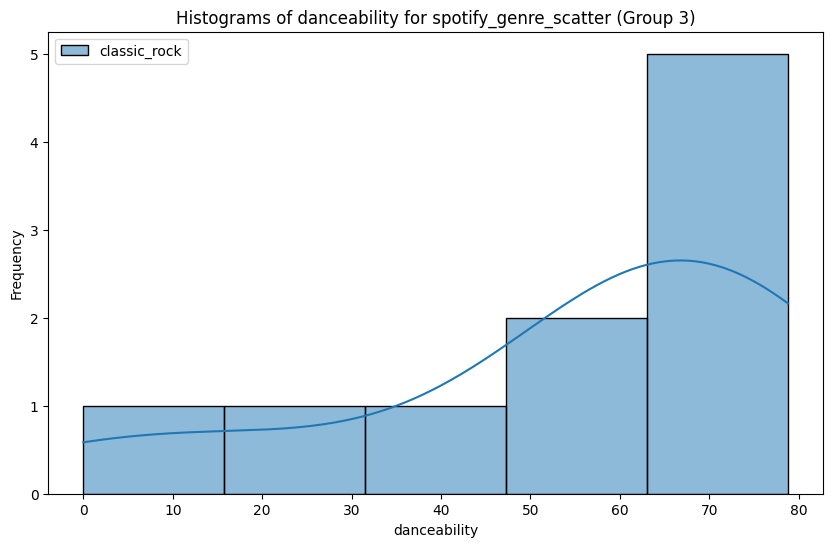

**Periodo de 01/01/1978 a 31/12/1982**
       danceability  spotify_genre_count
count     50.000000            50.000000
mean      54.506000           704.200000
std       23.264183           161.221612
min        0.000000           549.000000
25%       42.450000           569.000000
50%       61.800000           608.000000
75%       71.700000           875.000000
max       78.800000           920.000000
**Periodo de 01/01/1978 a 31/12/1982**


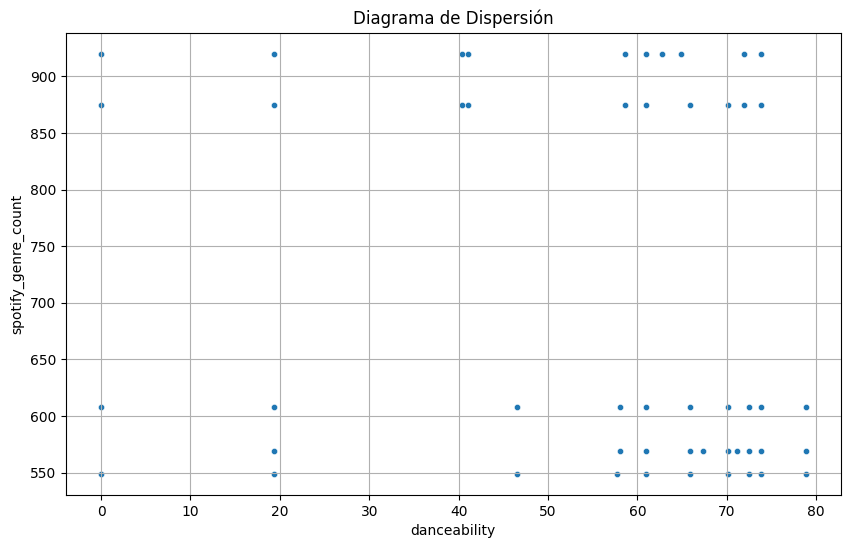

**Periodo de 01/01/1978 a 31/12/1982**
                     danceability  spotify_genre_count
danceability             1.000000            -0.169478
spotify_genre_count     -0.169478             1.000000
**Periodo de 01/01/1983 a 31/12/1987**


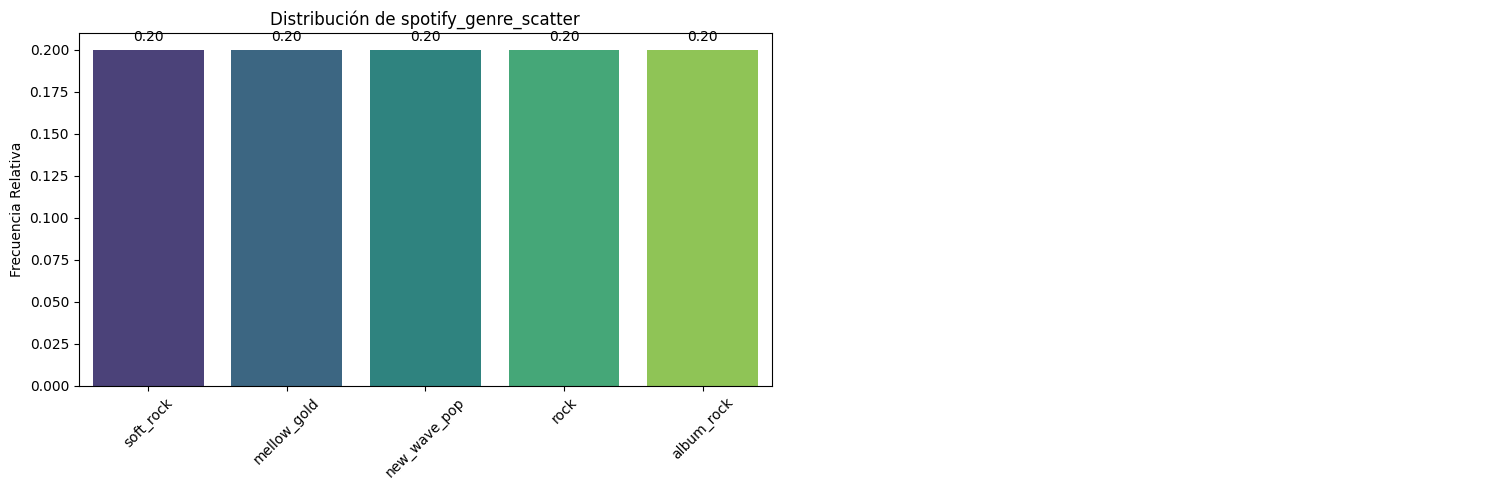

**Periodo de 01/01/1983 a 31/12/1987**
(2,)


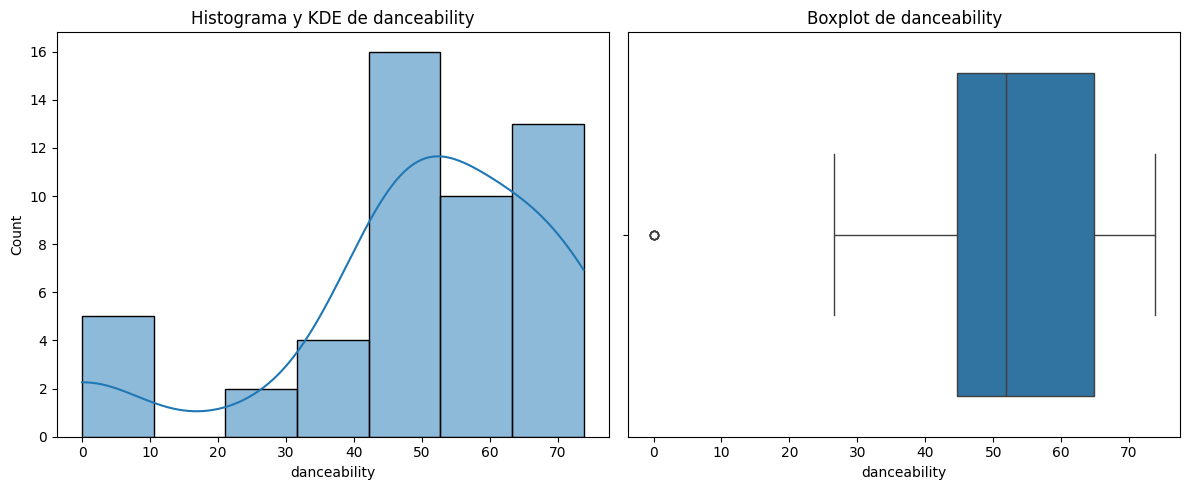

**Periodo de 01/01/1983 a 31/12/1987**


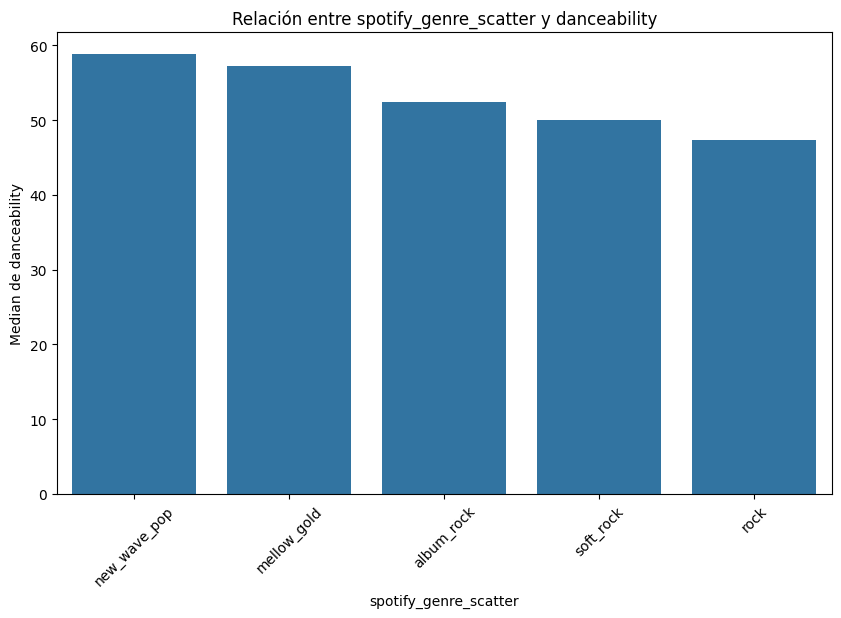

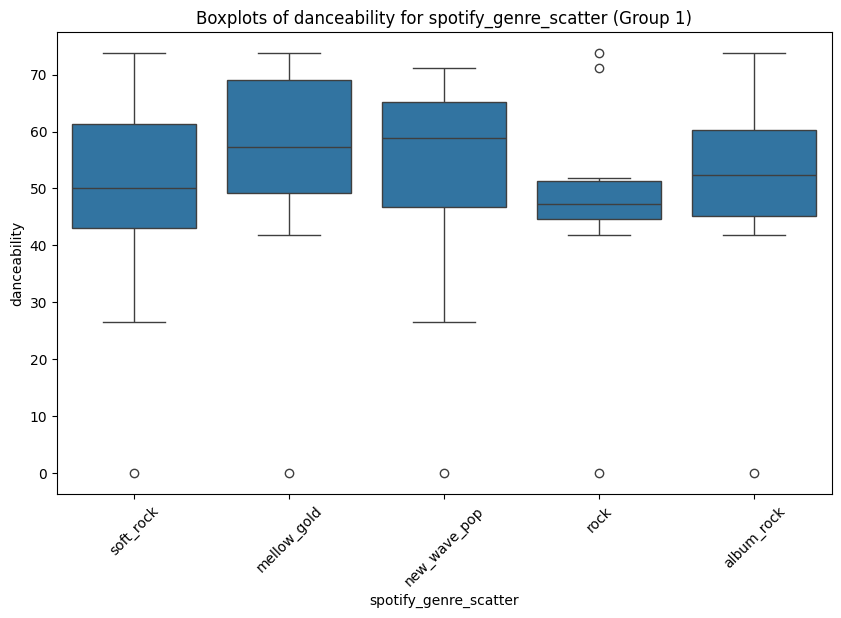

**Periodo de 01/01/1983 a 31/12/1987**


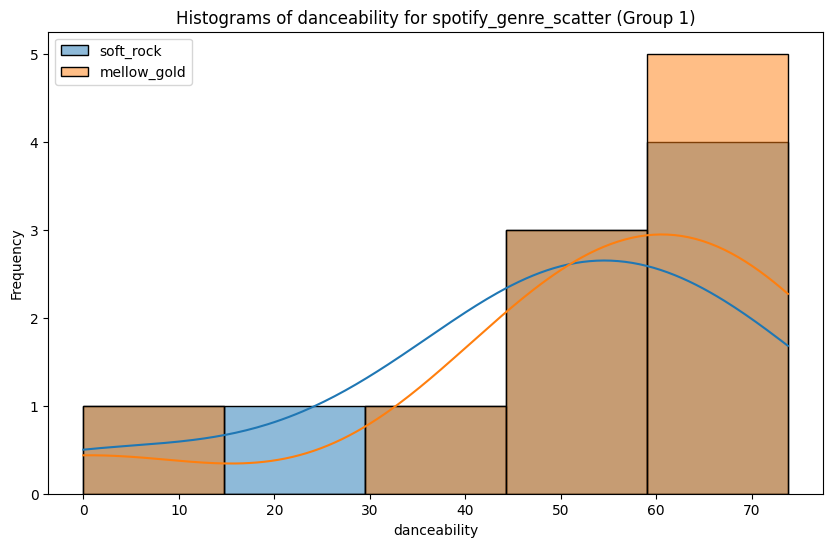

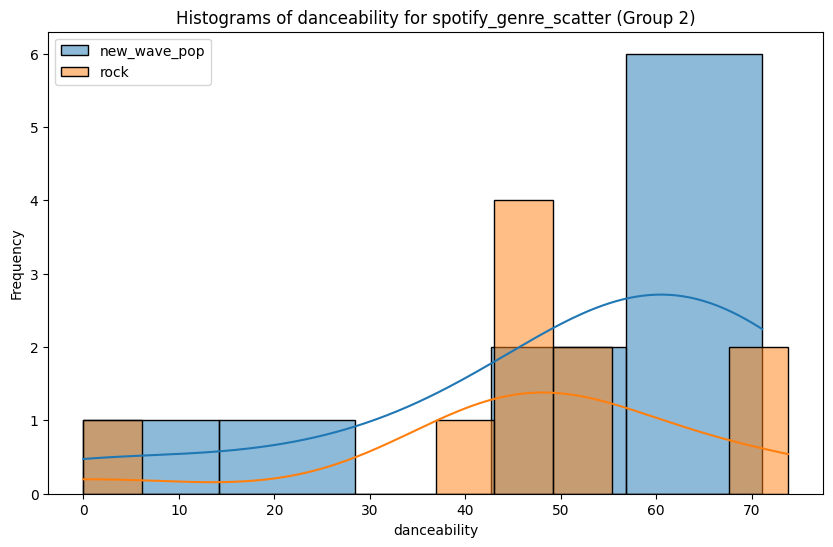

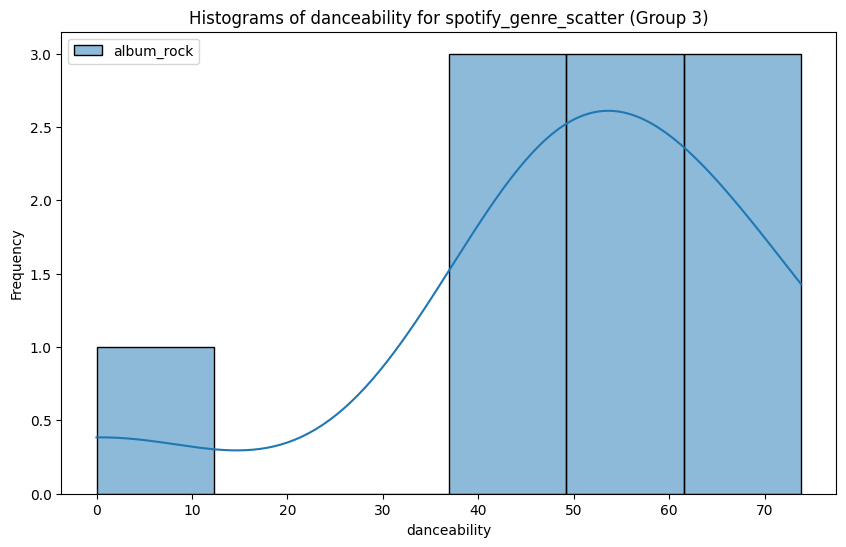

**Periodo de 01/01/1983 a 31/12/1987**
       danceability  spotify_genre_count
count     50.000000            50.000000
mean      49.976000           681.800000
std       20.498358           101.026164
min        0.000000           596.000000
25%       44.675000           605.000000
50%       51.900000           608.000000
75%       64.800000           759.000000
max       73.800000           841.000000
**Periodo de 01/01/1983 a 31/12/1987**


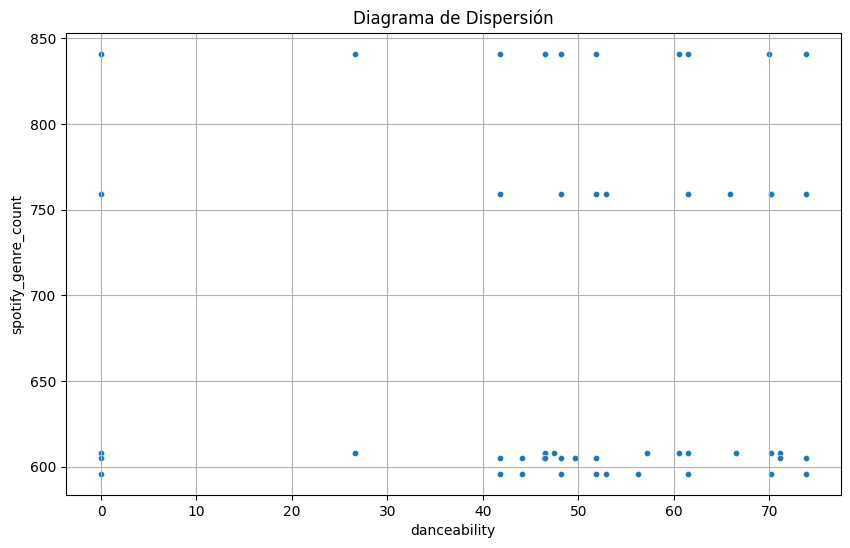

**Periodo de 01/01/1983 a 31/12/1987**
                     danceability  spotify_genre_count
danceability             1.000000             0.011656
spotify_genre_count      0.011656             1.000000
**Periodo de 01/01/1988 a 31/12/1992**


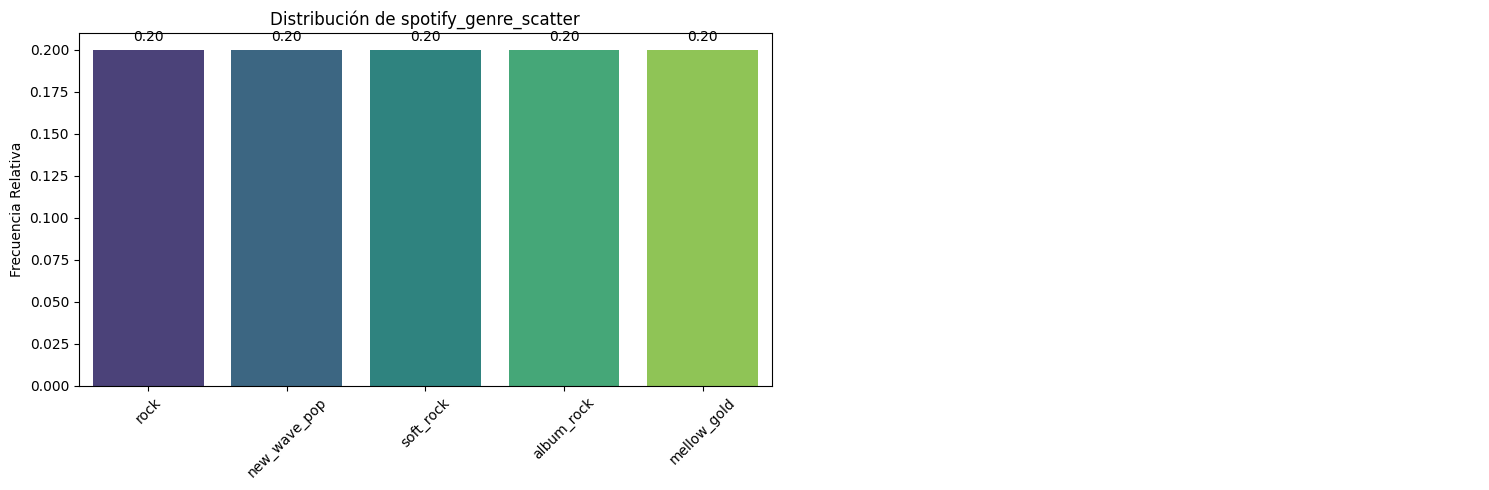

**Periodo de 01/01/1988 a 31/12/1992**
(2,)


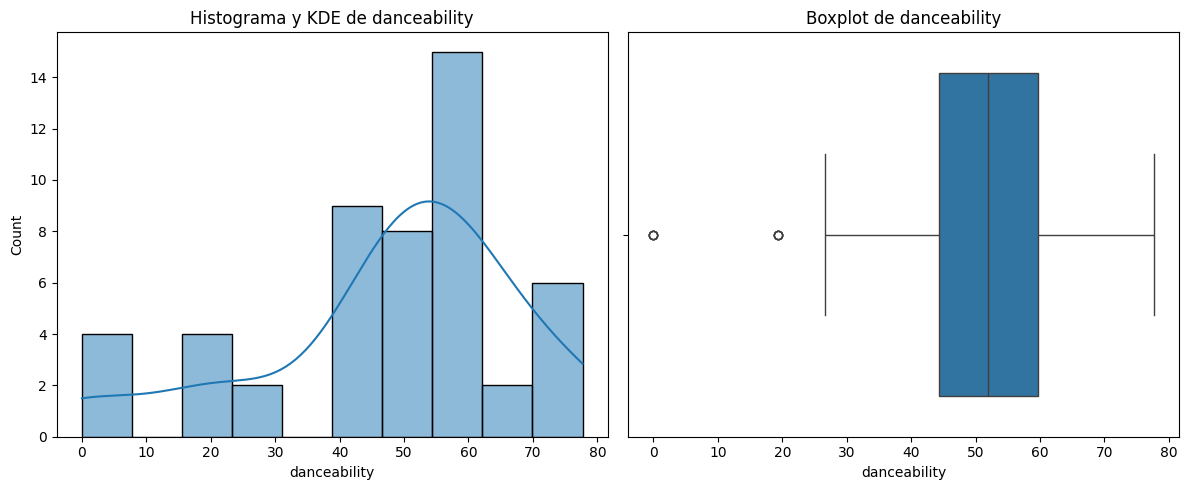

**Periodo de 01/01/1988 a 31/12/1992**


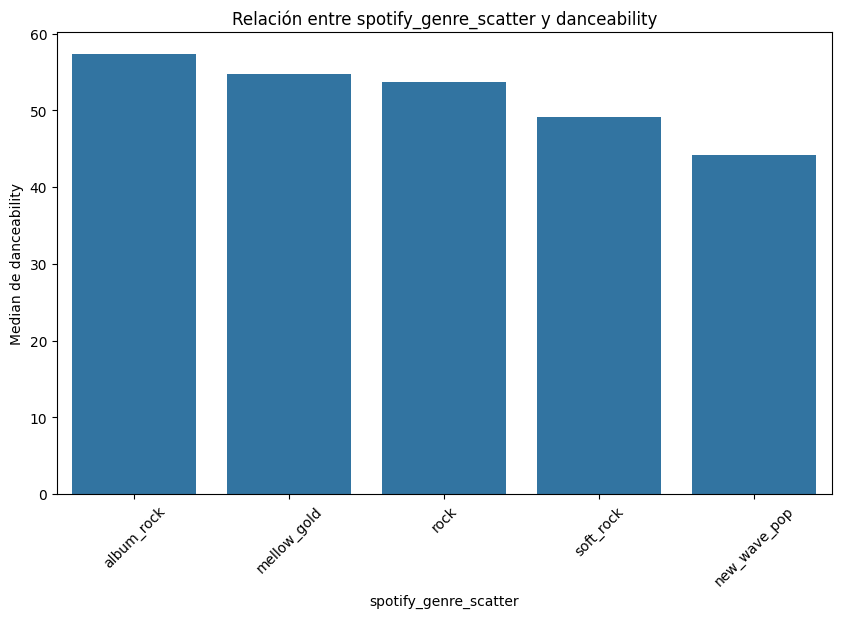

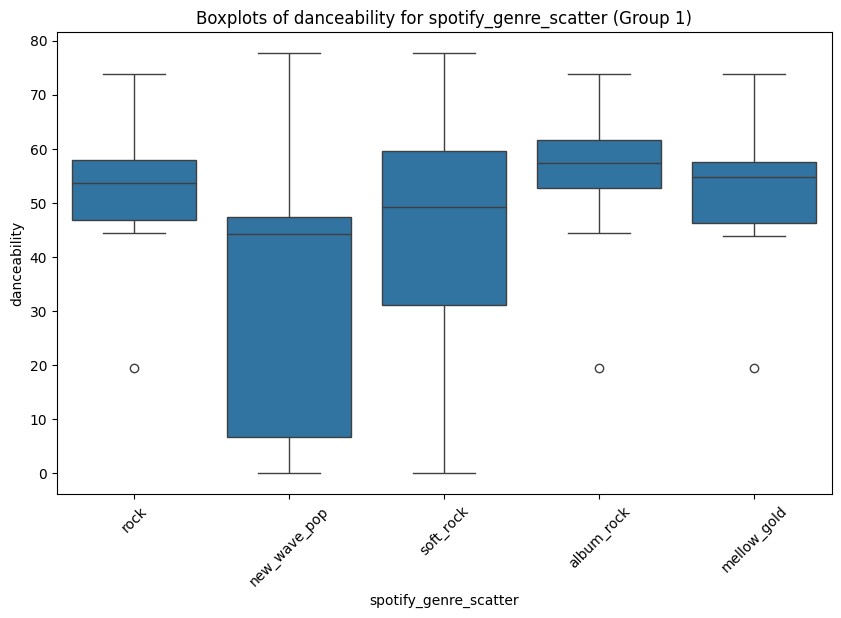

**Periodo de 01/01/1988 a 31/12/1992**


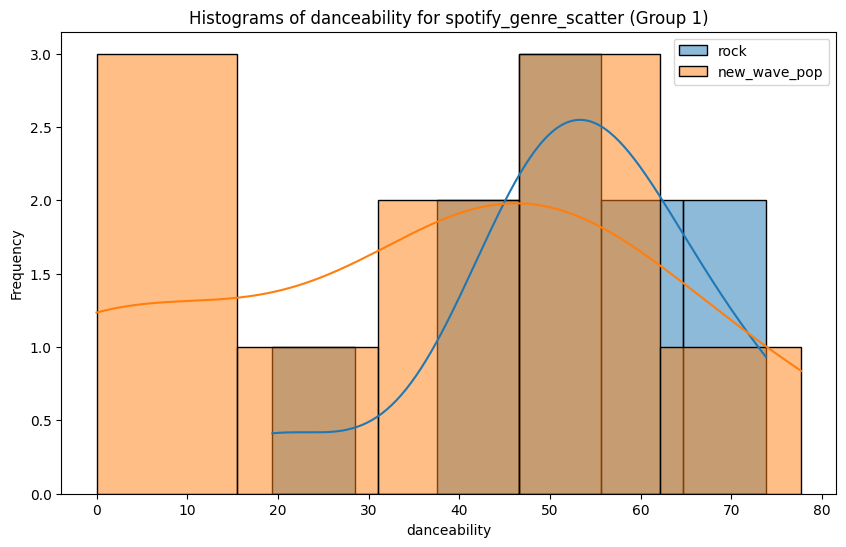

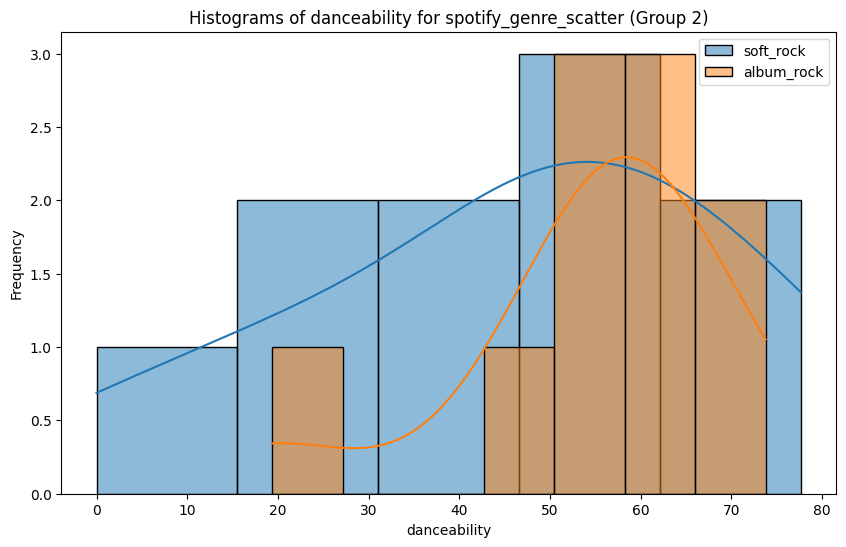

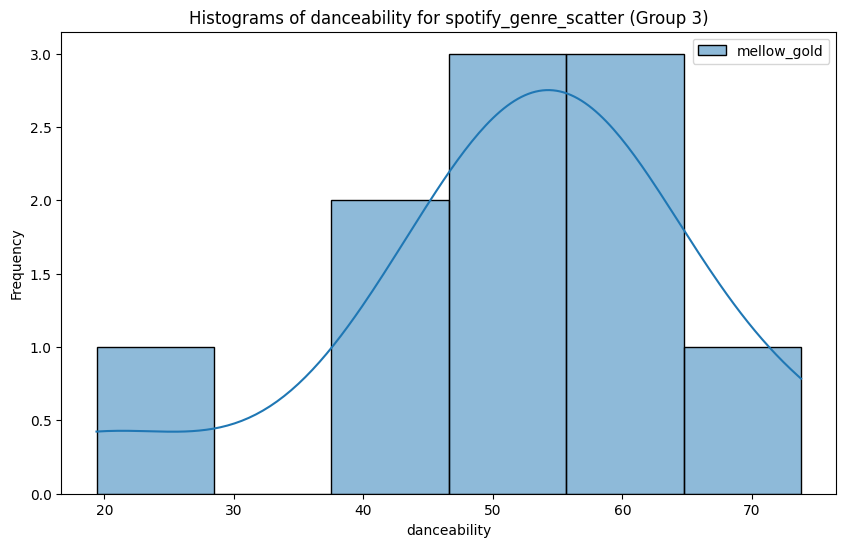

**Periodo de 01/01/1988 a 31/12/1992**
       danceability  spotify_genre_count
count     50.000000             50.00000
mean      47.864000            358.40000
std       20.352233             36.58705
min        0.000000            311.00000
25%       44.400000            319.00000
50%       51.900000            379.00000
75%       59.725000            383.00000
max       77.700000            400.00000
**Periodo de 01/01/1988 a 31/12/1992**


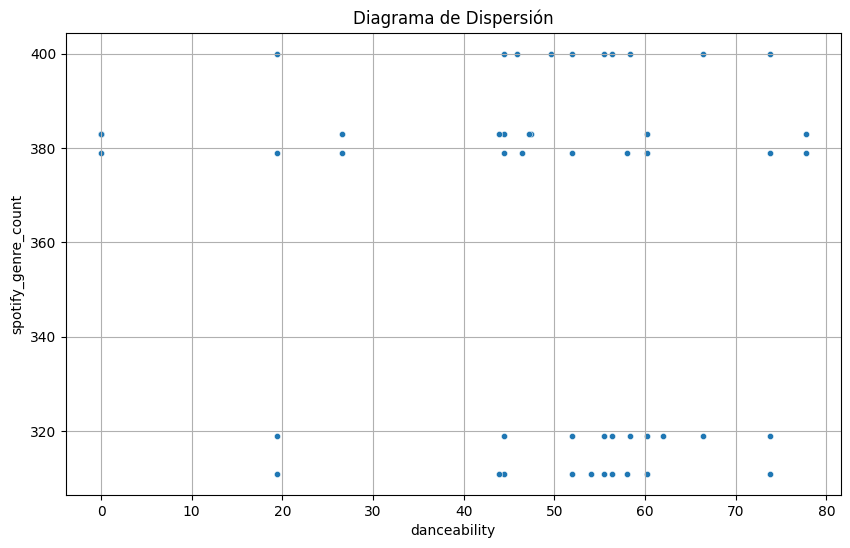

**Periodo de 01/01/1988 a 31/12/1992**
                     danceability  spotify_genre_count
danceability             1.000000            -0.176636
spotify_genre_count     -0.176636             1.000000
**Periodo de 01/01/1993 a 31/12/1997**


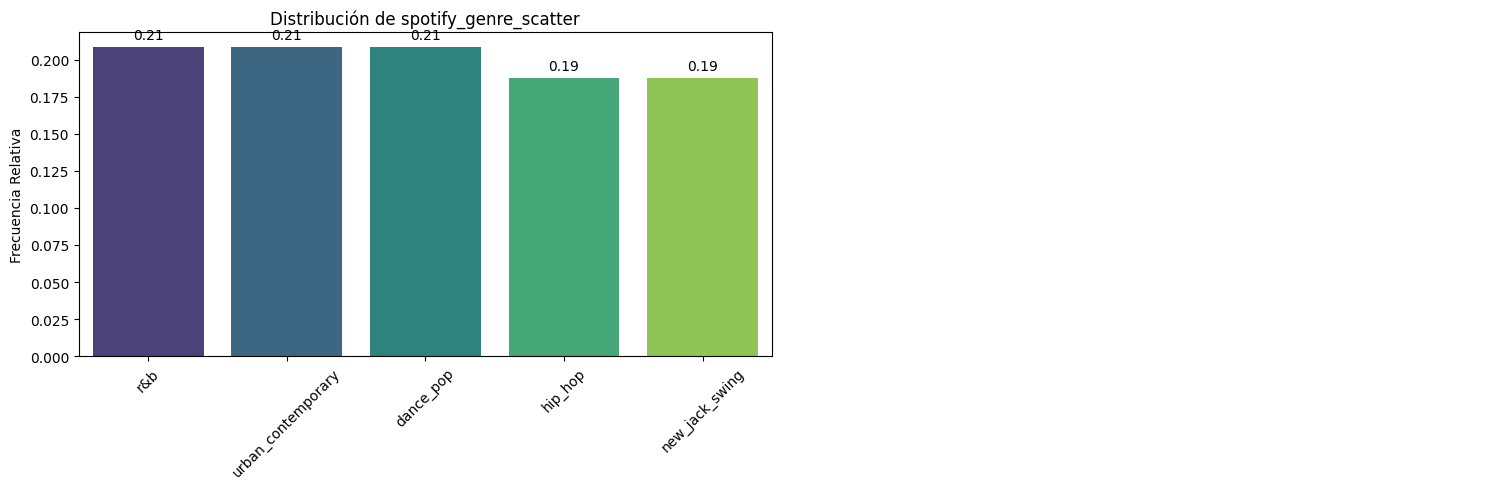

**Periodo de 01/01/1993 a 31/12/1997**
(2,)


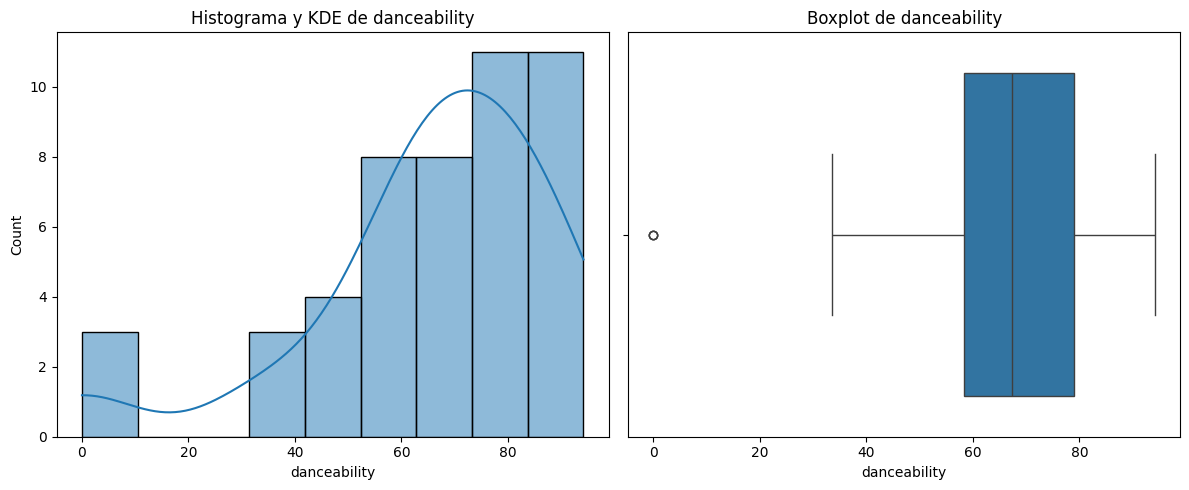

**Periodo de 01/01/1993 a 31/12/1997**


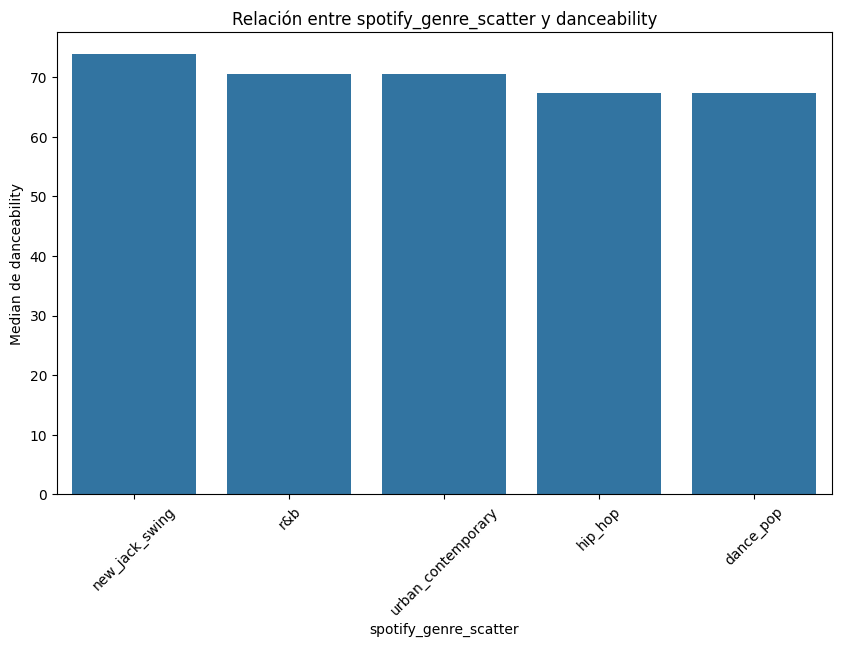

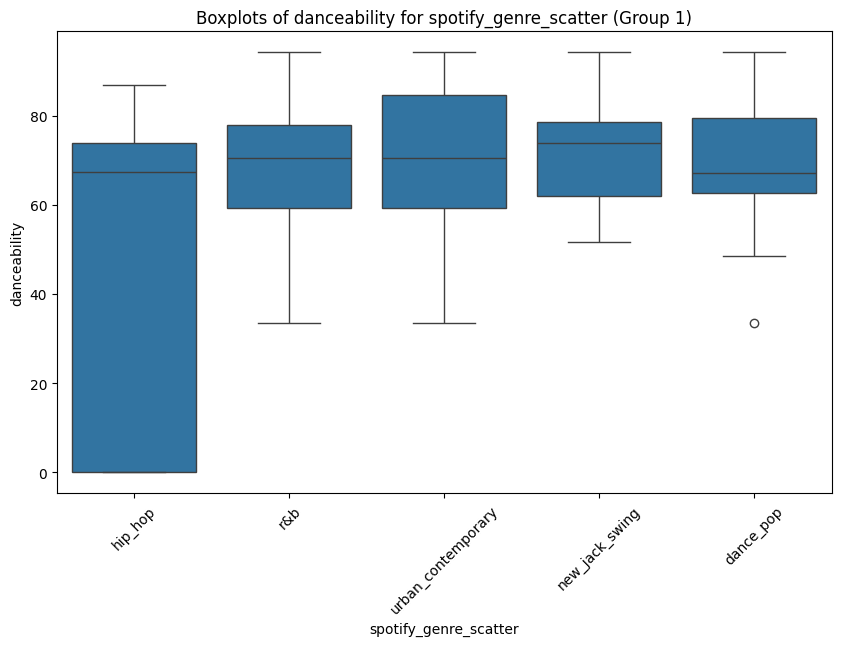

**Periodo de 01/01/1993 a 31/12/1997**


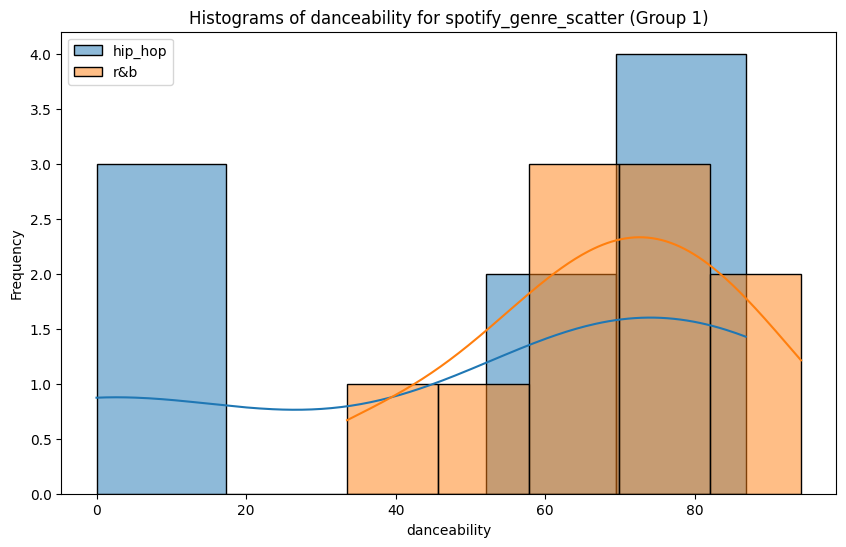

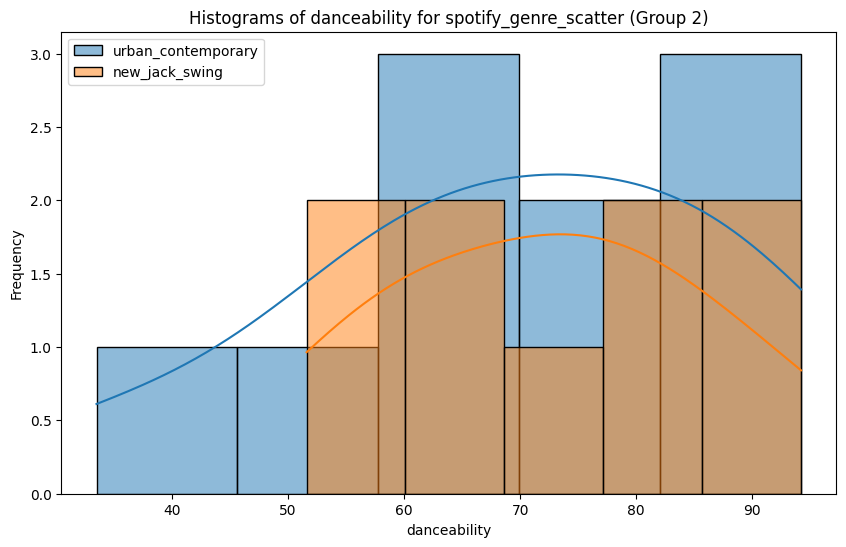

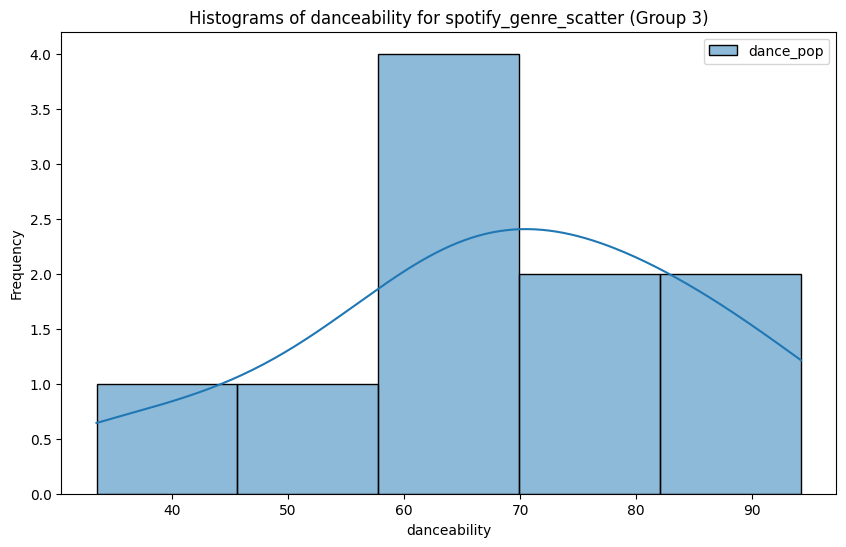

**Periodo de 01/01/1993 a 31/12/1997**
       danceability  spotify_genre_count
count      48.00000            48.000000
mean       65.74375           289.520833
std        23.10471            30.173251
min         0.00000           246.000000
25%        58.30000           265.000000
50%        67.40000           301.000000
75%        78.97500           309.000000
max        94.20000           328.000000
**Periodo de 01/01/1993 a 31/12/1997**


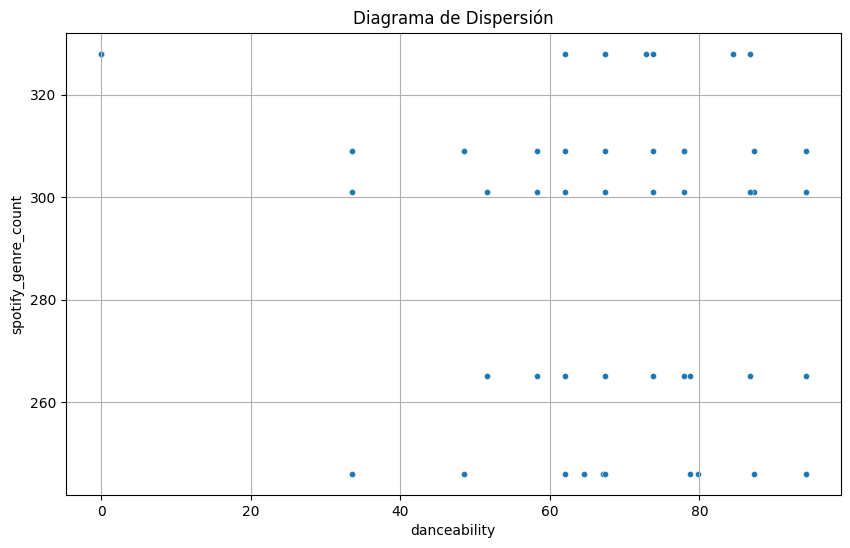

**Periodo de 01/01/1993 a 31/12/1997**
                     danceability  spotify_genre_count
danceability             1.000000            -0.221337
spotify_genre_count     -0.221337             1.000000
**Periodo de 01/01/1998 a 31/12/2002**


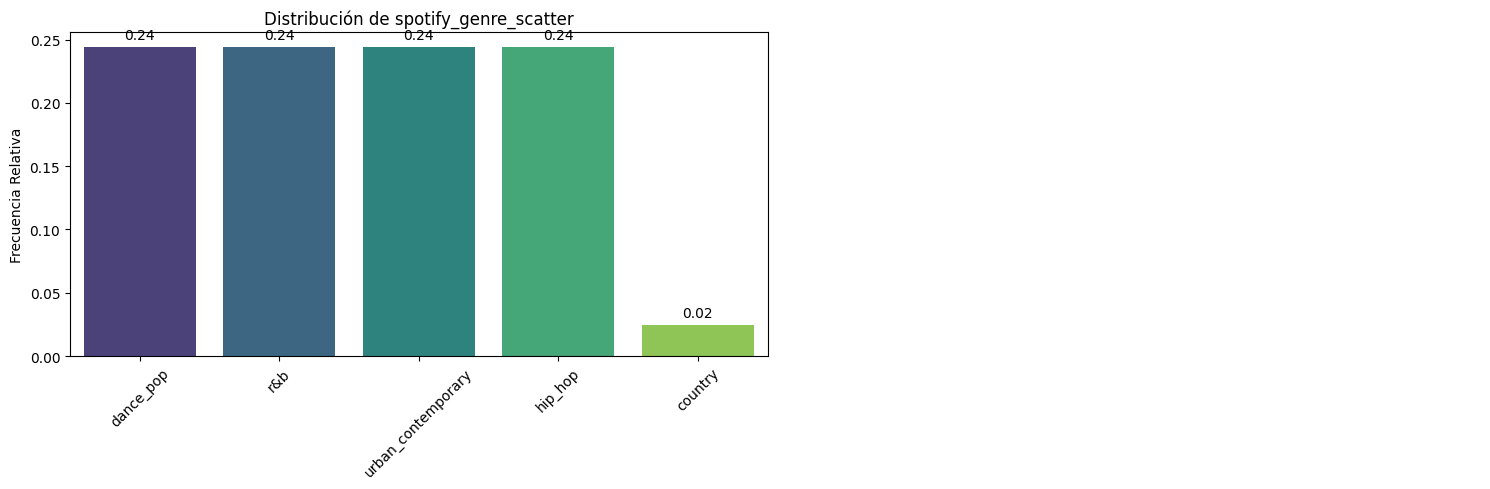

**Periodo de 01/01/1998 a 31/12/2002**
(2,)


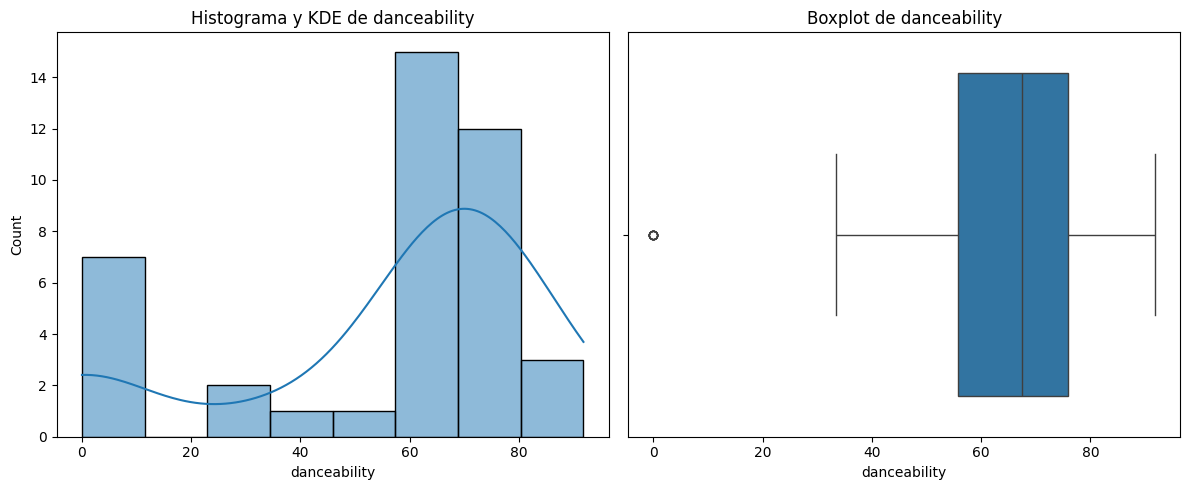

**Periodo de 01/01/1998 a 31/12/2002**


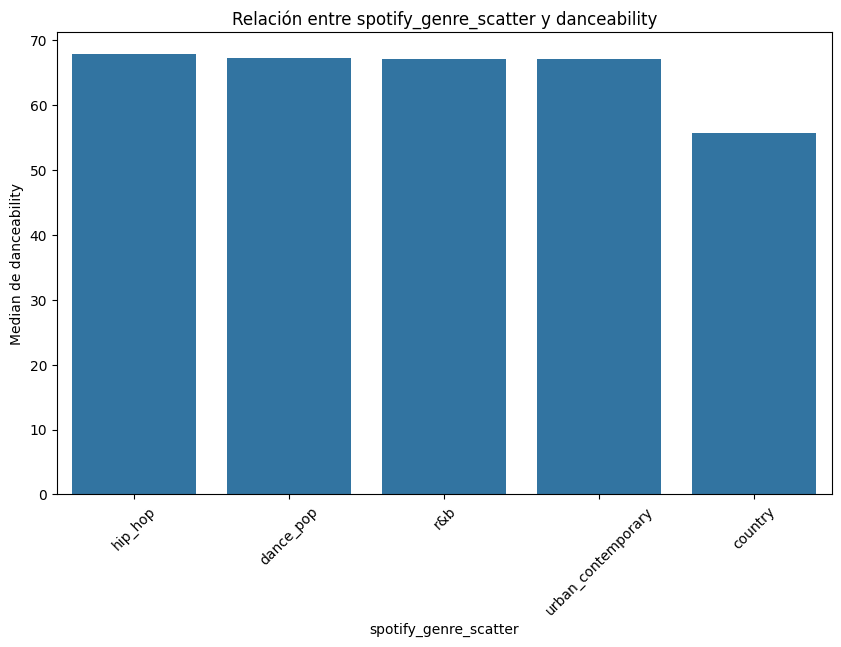

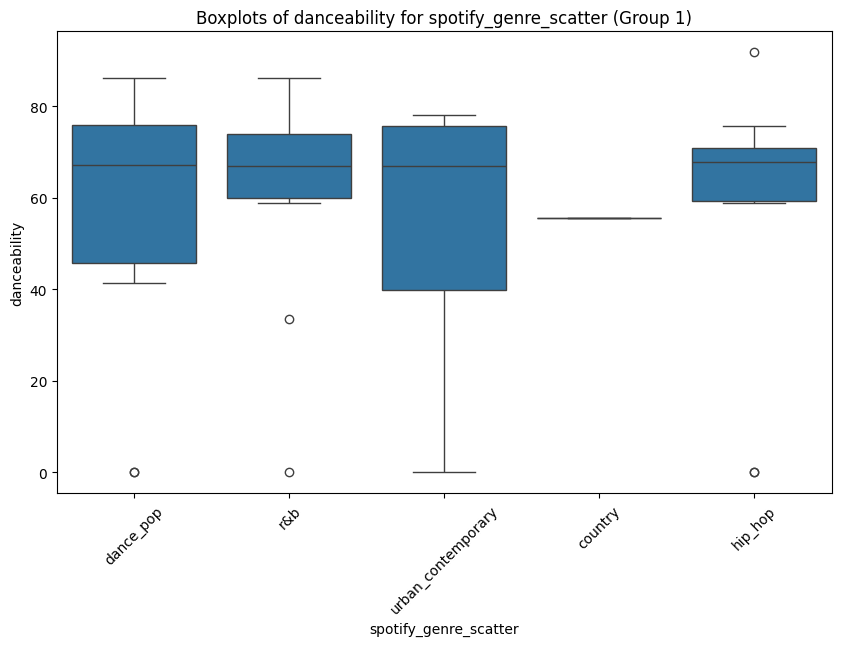

**Periodo de 01/01/1998 a 31/12/2002**


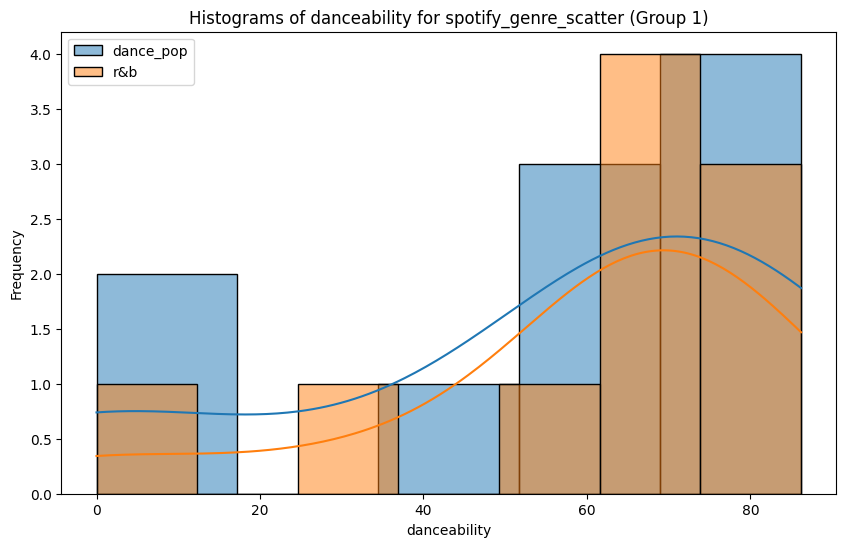

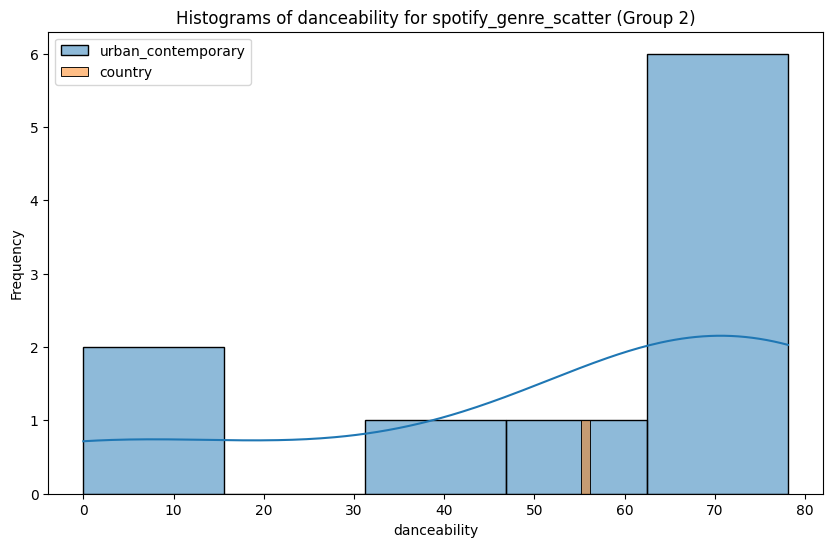

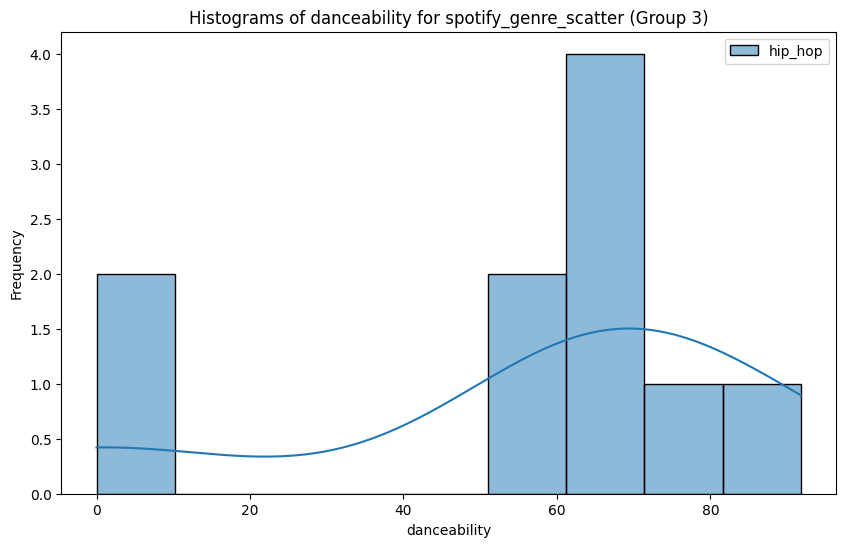

**Periodo de 01/01/1998 a 31/12/2002**
       danceability  spotify_genre_count
count     41.000000            41.000000
mean      56.134146           336.073171
std       28.387423            41.814704
min        0.000000           303.000000
25%       55.700000           309.000000
50%       67.400000           318.000000
75%       75.800000           318.000000
max       91.800000           408.000000
**Periodo de 01/01/1998 a 31/12/2002**


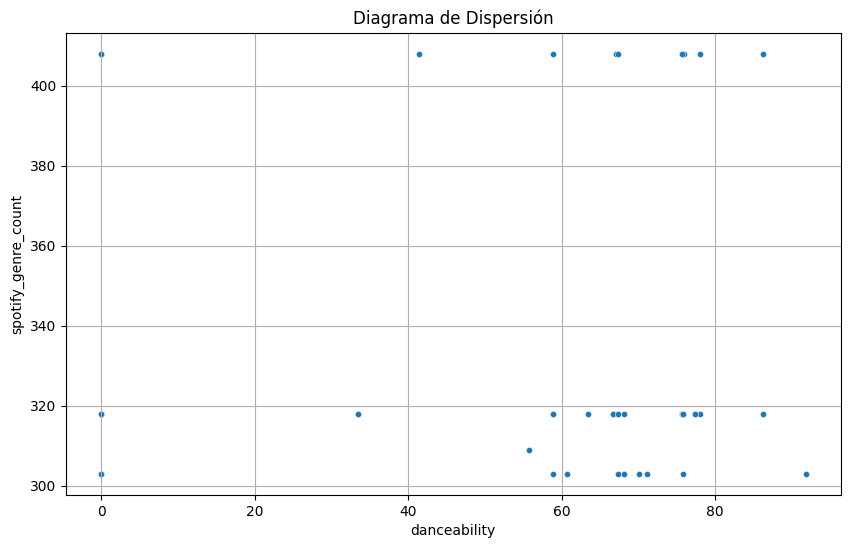

**Periodo de 01/01/1998 a 31/12/2002**
                     danceability  spotify_genre_count
danceability              1.00000             -0.02096
spotify_genre_count      -0.02096              1.00000
**Periodo de 01/01/2003 a 31/12/2007**


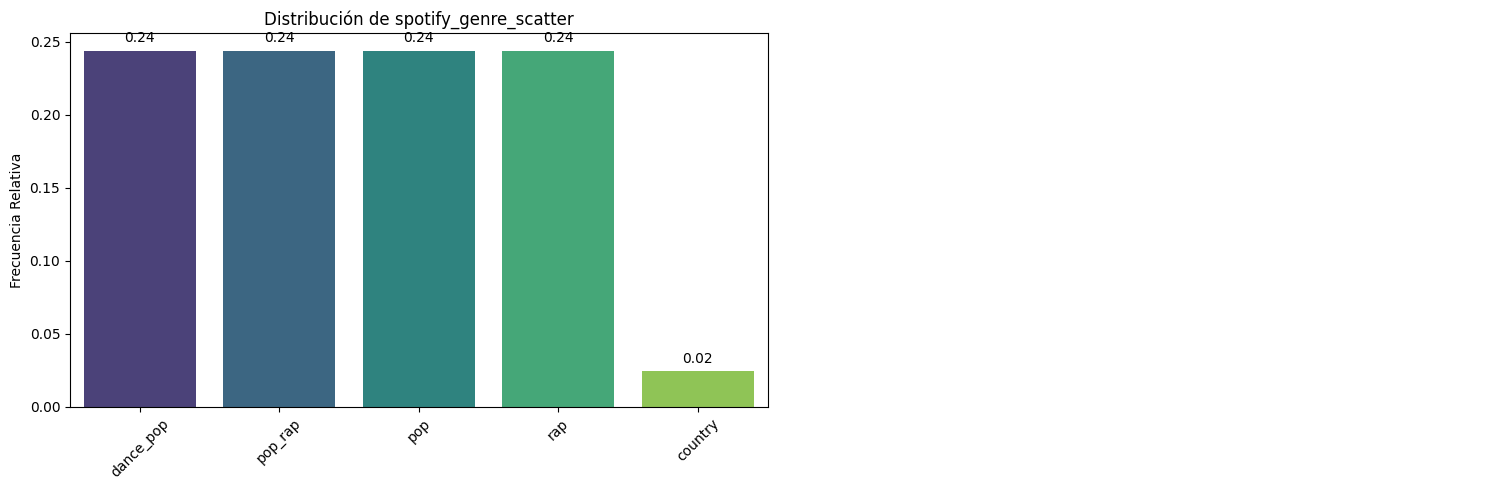

**Periodo de 01/01/2003 a 31/12/2007**
(2,)


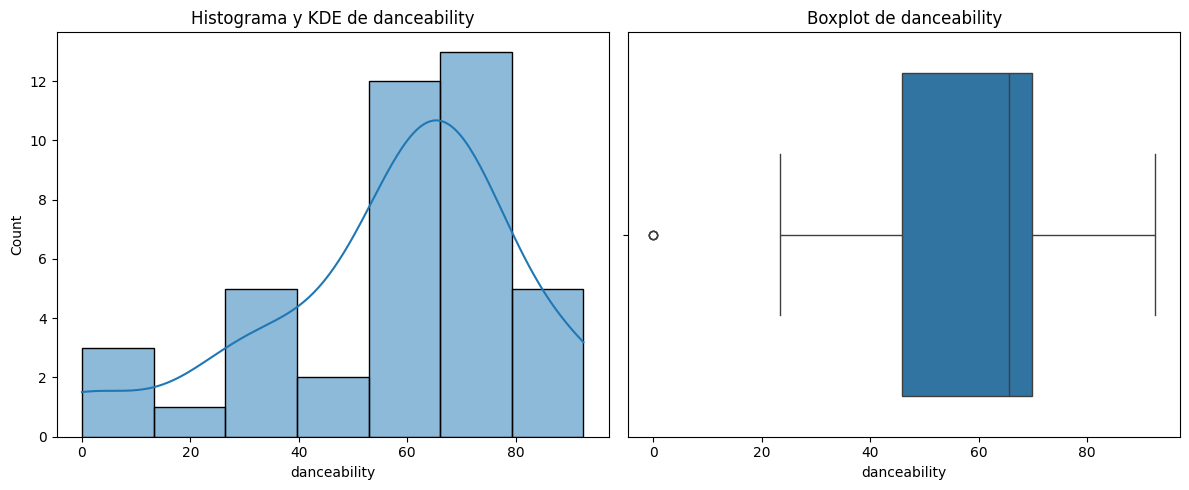

**Periodo de 01/01/2003 a 31/12/2007**


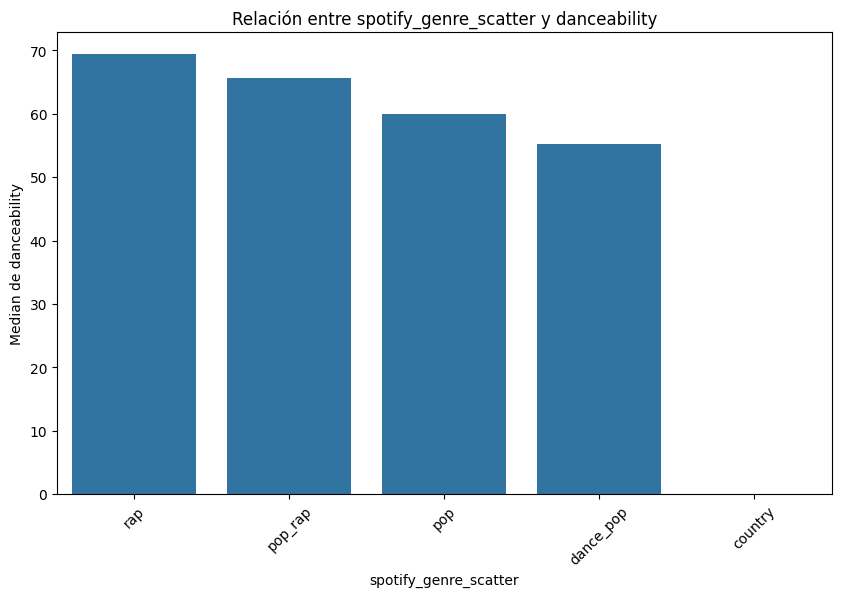

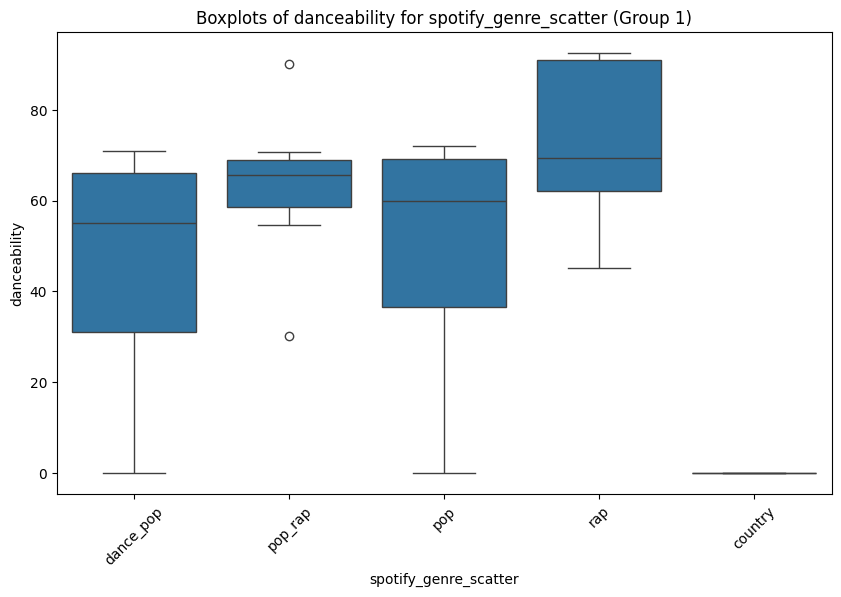

**Periodo de 01/01/2003 a 31/12/2007**


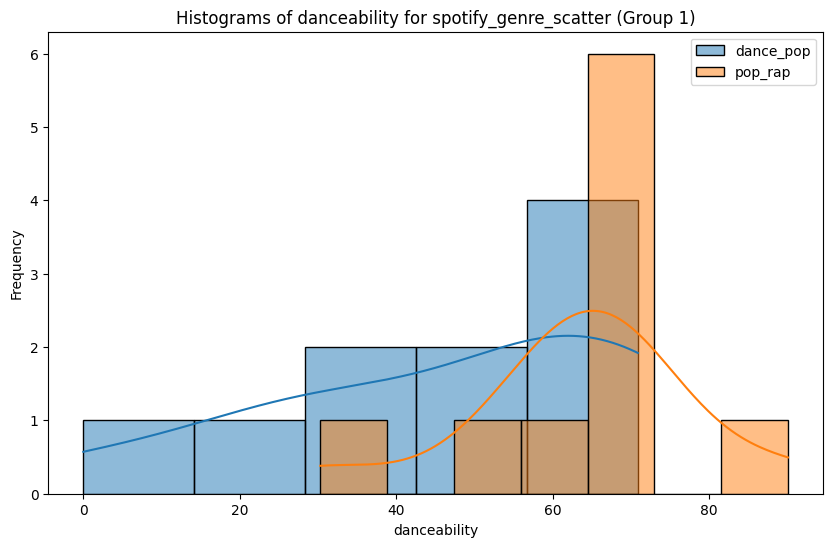

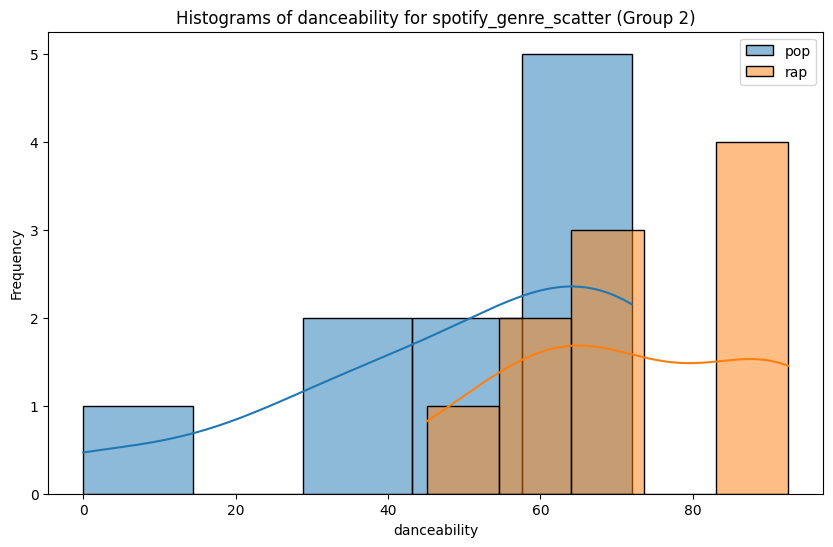

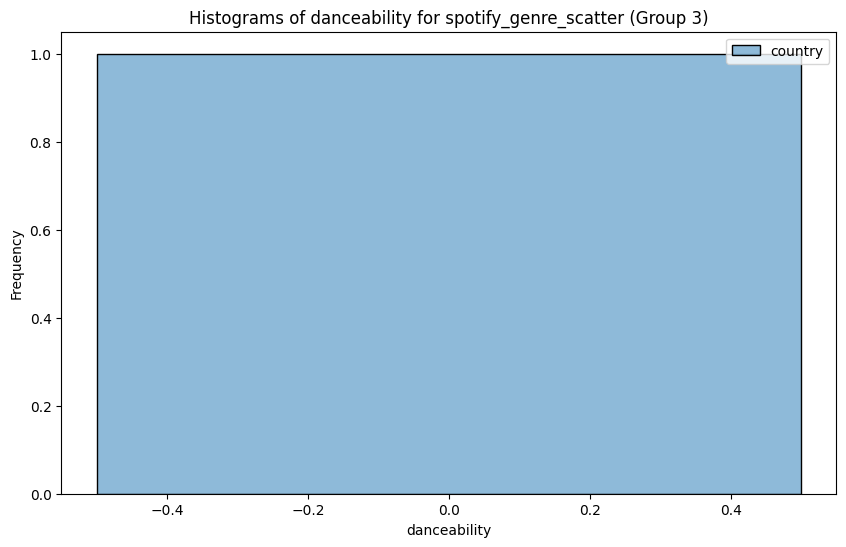

**Periodo de 01/01/2003 a 31/12/2007**
       danceability  spotify_genre_count
count     41.000000            41.000000
mean      57.163415           418.390244
std       23.742733            71.244255
min        0.000000           314.000000
25%       45.800000           330.000000
50%       65.500000           380.000000
75%       69.900000           471.000000
max       92.500000           503.000000
**Periodo de 01/01/2003 a 31/12/2007**


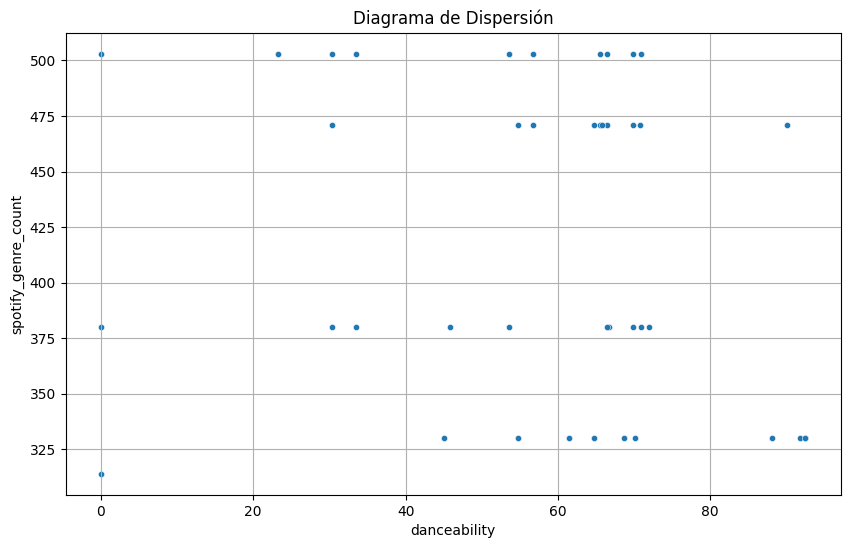

**Periodo de 01/01/2003 a 31/12/2007**
                     danceability  spotify_genre_count
danceability             1.000000            -0.160461
spotify_genre_count     -0.160461             1.000000
**Periodo de 01/01/2008 a 31/12/2012**


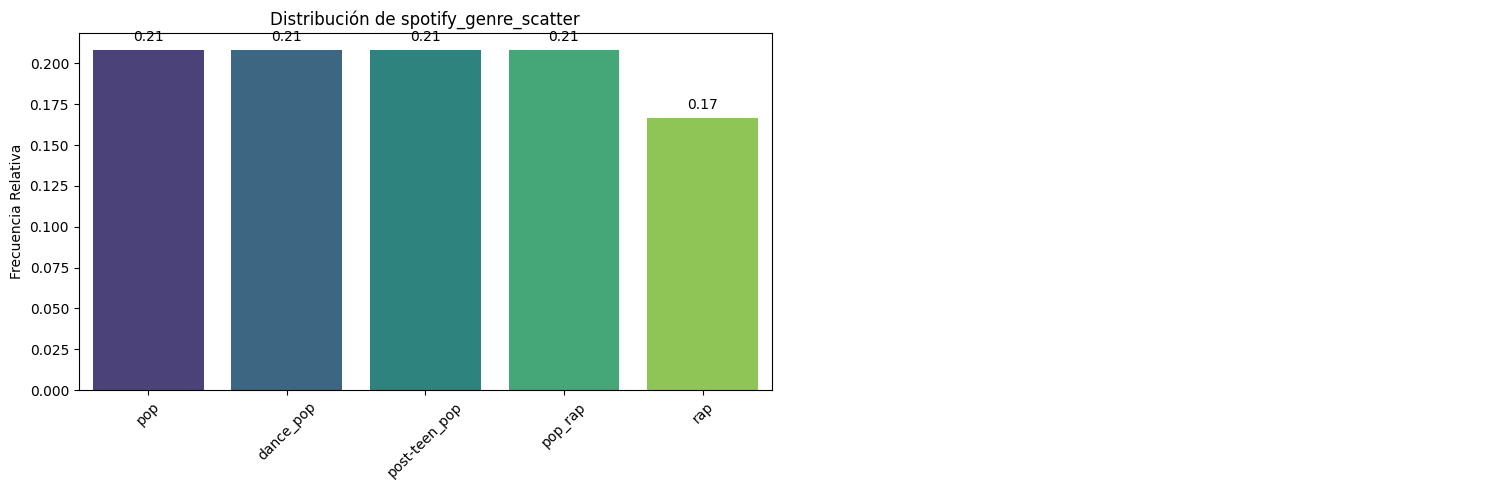

**Periodo de 01/01/2008 a 31/12/2012**
(2,)


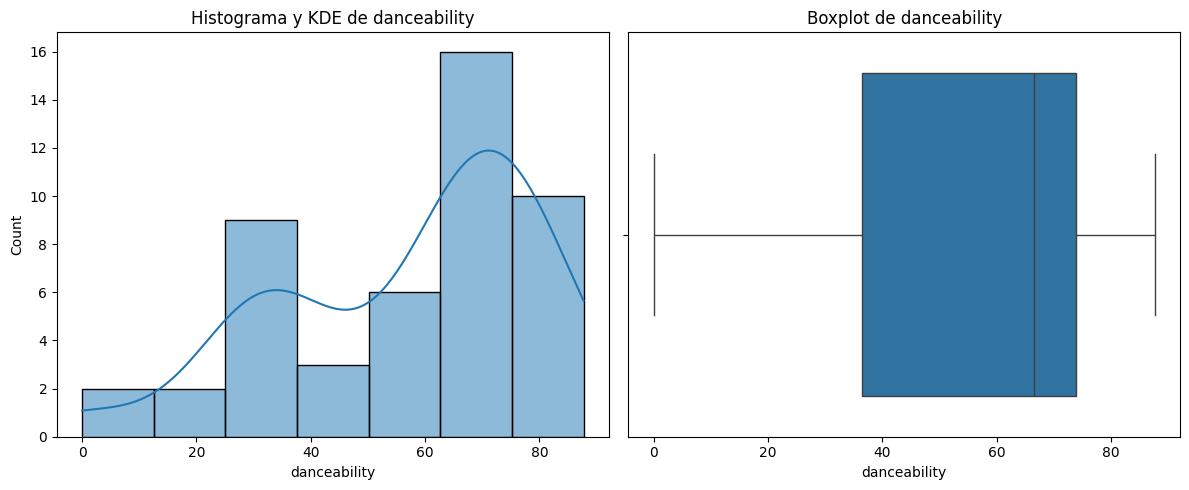

**Periodo de 01/01/2008 a 31/12/2012**


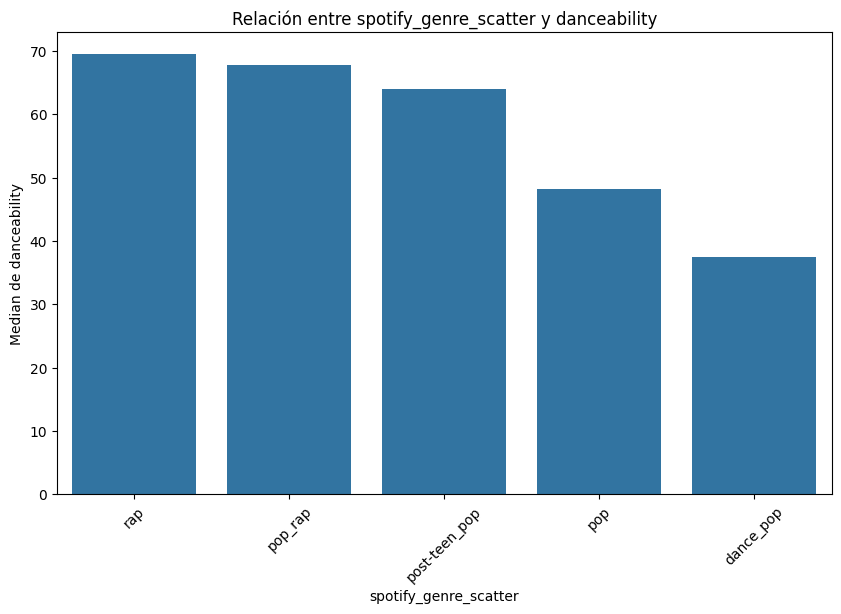

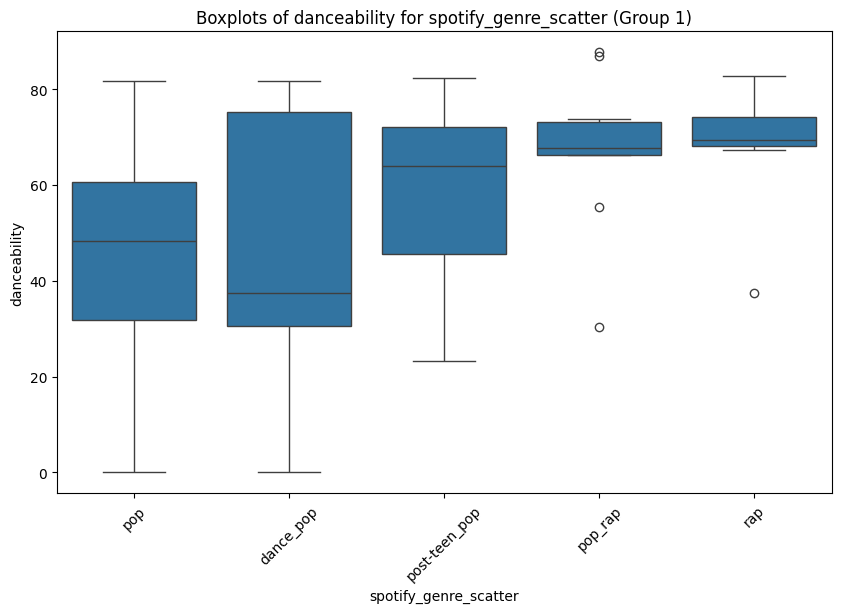

**Periodo de 01/01/2008 a 31/12/2012**


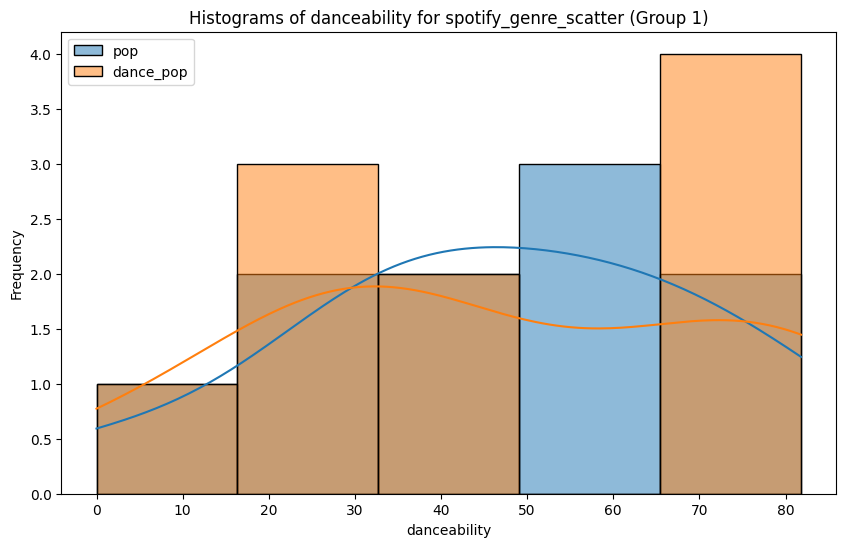

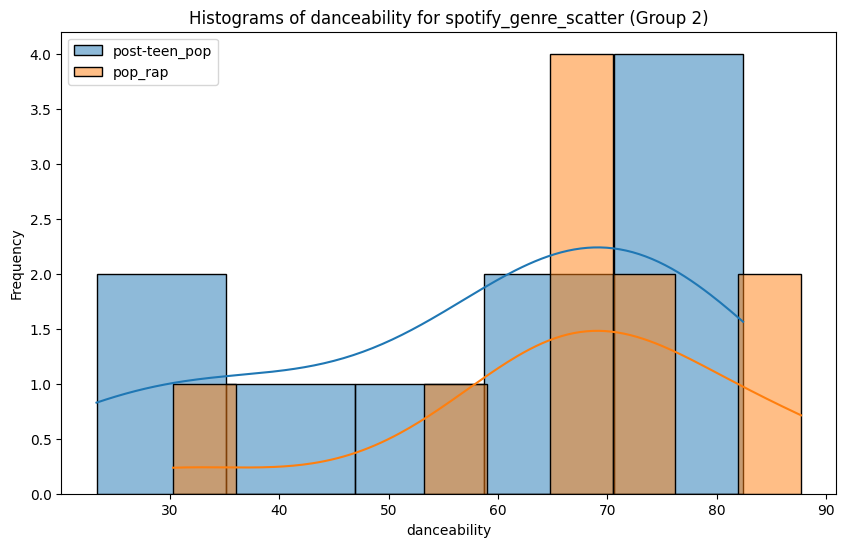

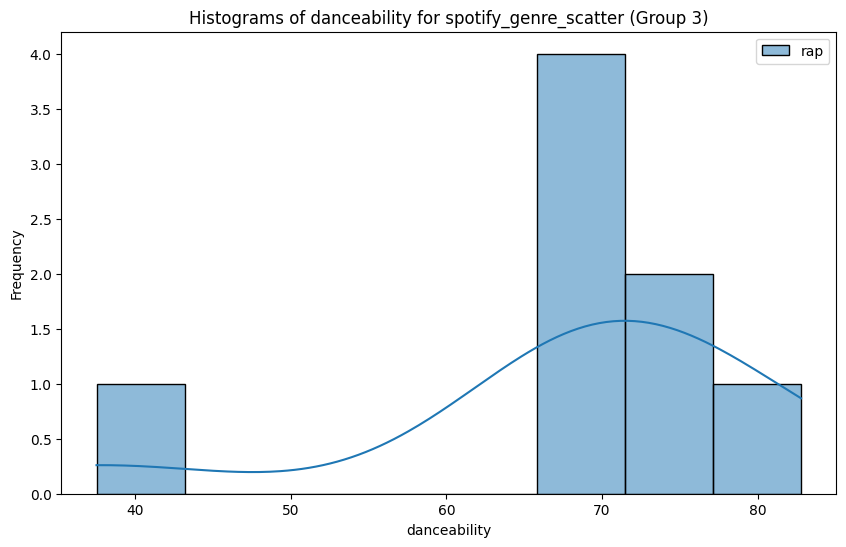

**Periodo de 01/01/2008 a 31/12/2012**
       danceability  spotify_genre_count
count     48.000000            48.000000
mean      57.037500           634.083333
std       22.518433           138.232895
min        0.000000           377.000000
25%       36.500000           579.000000
50%       66.600000           639.000000
75%       73.900000           738.000000
max       87.700000           786.000000
**Periodo de 01/01/2008 a 31/12/2012**


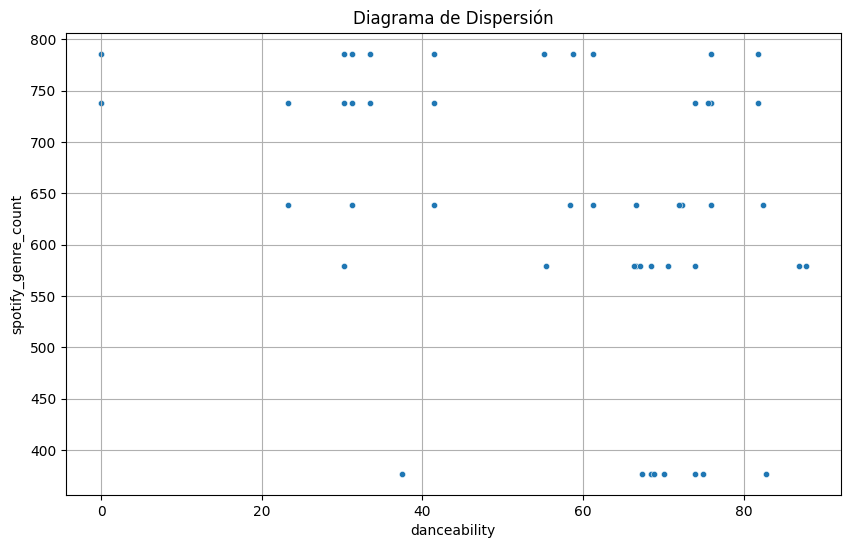

**Periodo de 01/01/2008 a 31/12/2012**
                     danceability  spotify_genre_count
danceability             1.000000            -0.370546
spotify_genre_count     -0.370546             1.000000
**Periodo de 01/01/2013 a 31/12/2017**


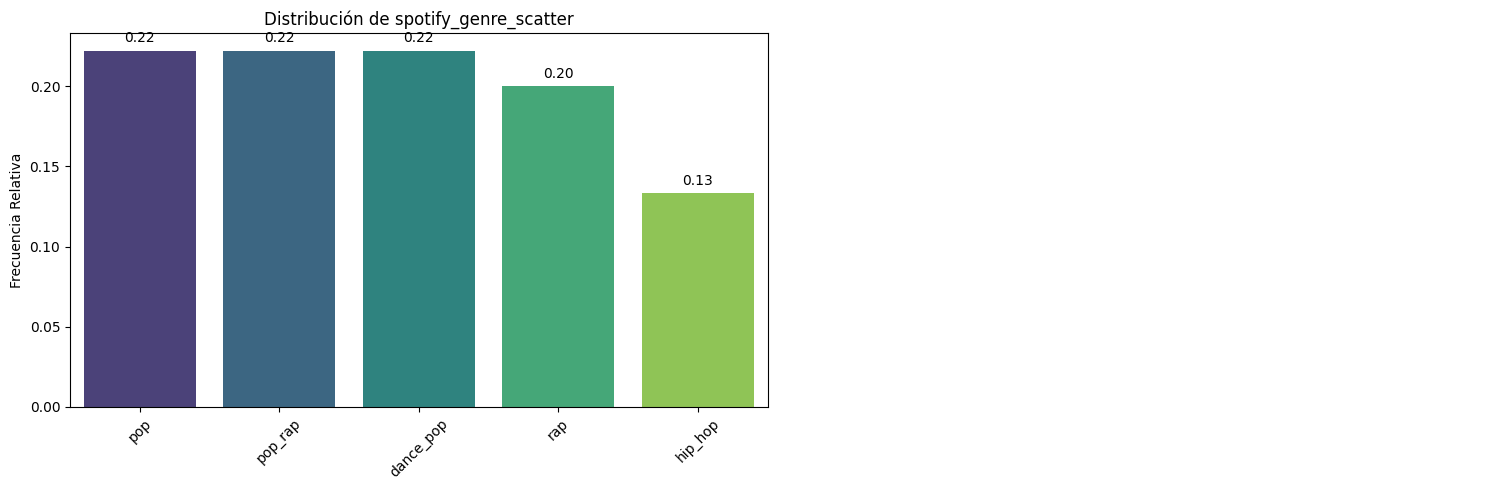

**Periodo de 01/01/2013 a 31/12/2017**
(2,)


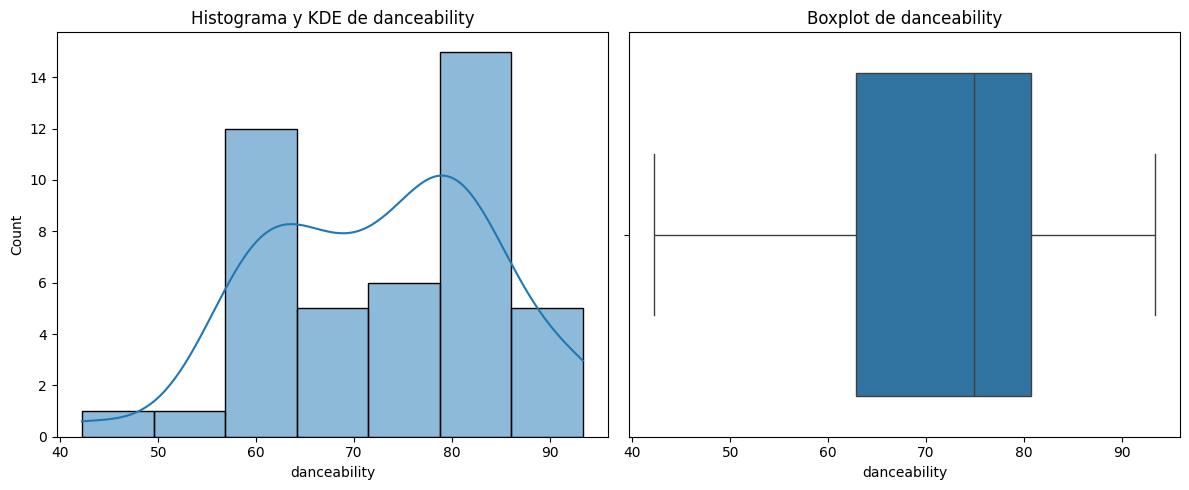

**Periodo de 01/01/2013 a 31/12/2017**


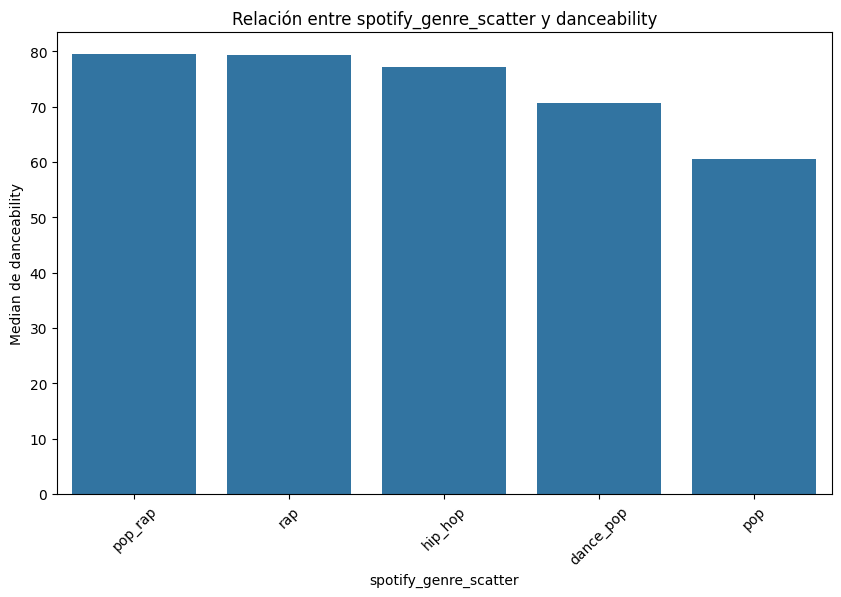

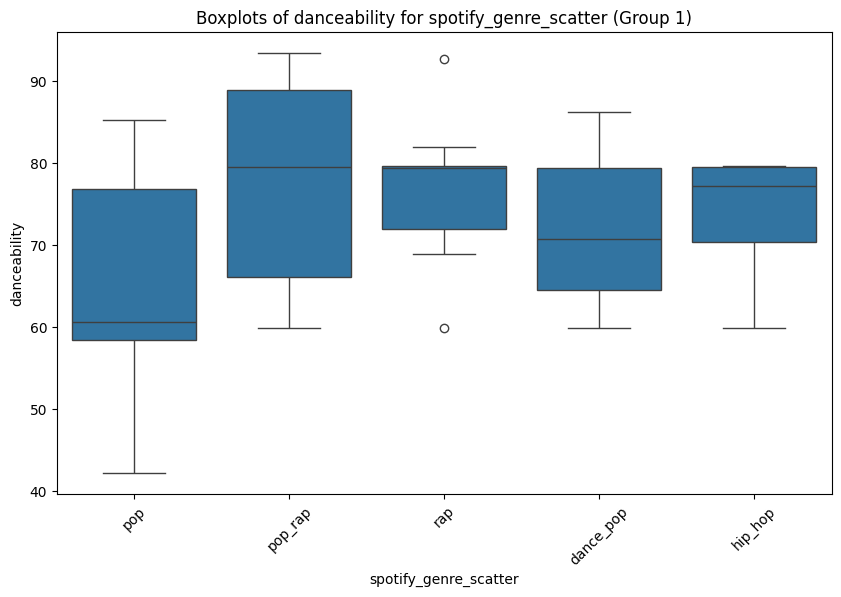

**Periodo de 01/01/2013 a 31/12/2017**


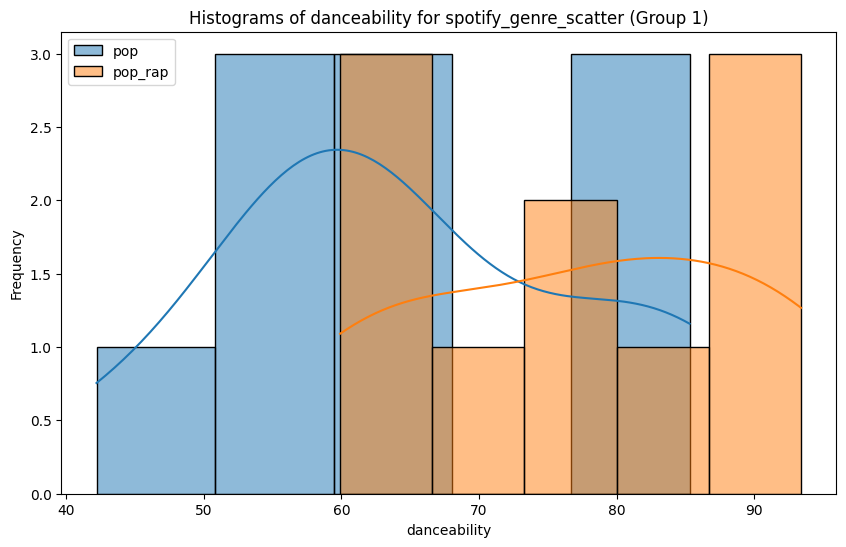

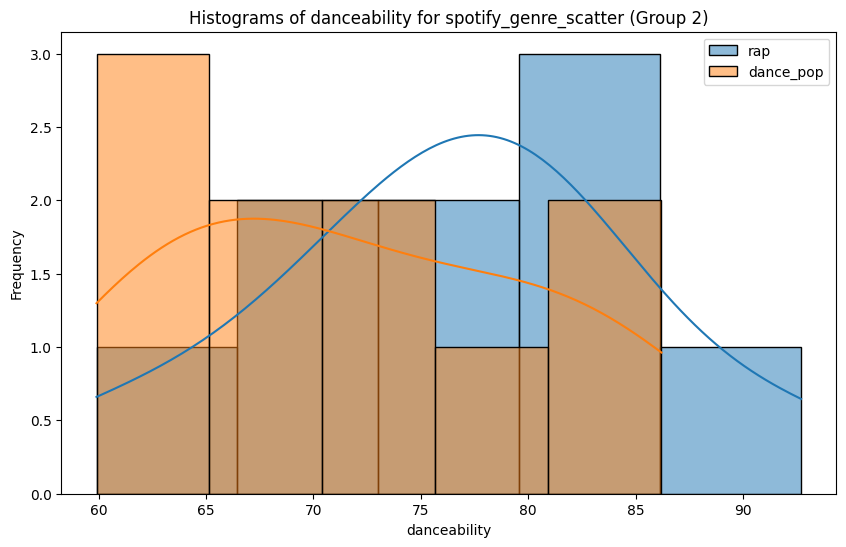

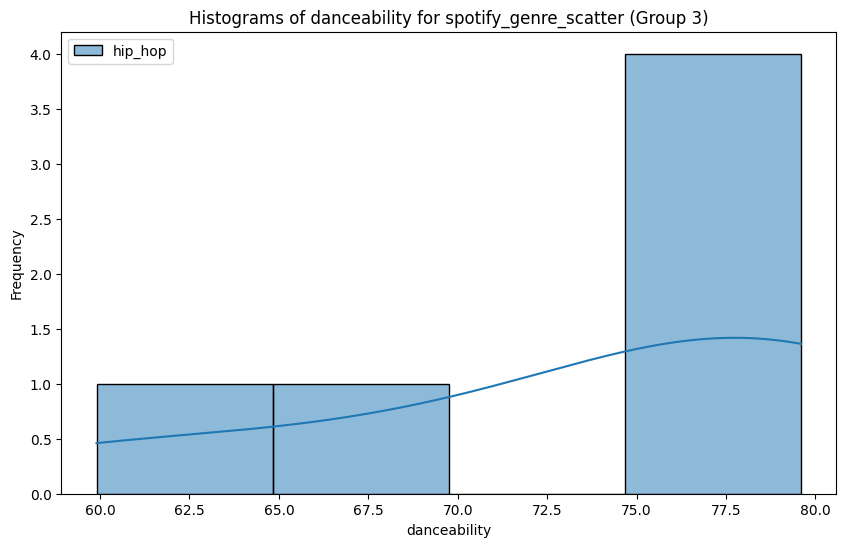

**Periodo de 01/01/2013 a 31/12/2017**
       danceability  spotify_genre_count
count     45.000000            45.000000
mean      72.793333           626.355556
std       11.527485           119.724144
min       42.200000           427.000000
25%       62.800000           576.000000
50%       74.900000           586.000000
75%       80.700000           646.000000
max       93.400000           813.000000
**Periodo de 01/01/2013 a 31/12/2017**


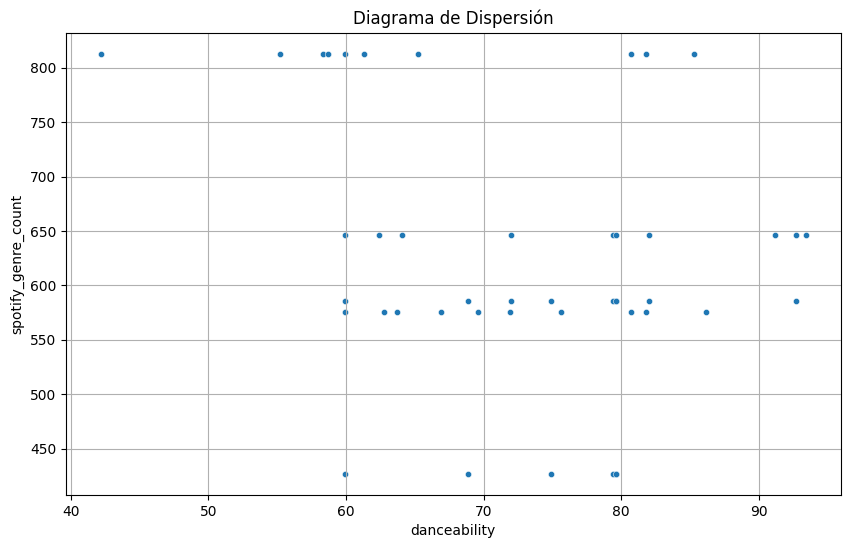

**Periodo de 01/01/2013 a 31/12/2017**
                     danceability  spotify_genre_count
danceability             1.000000            -0.261427
spotify_genre_count     -0.261427             1.000000
**Periodo de 01/01/2018 a 31/12/2023**


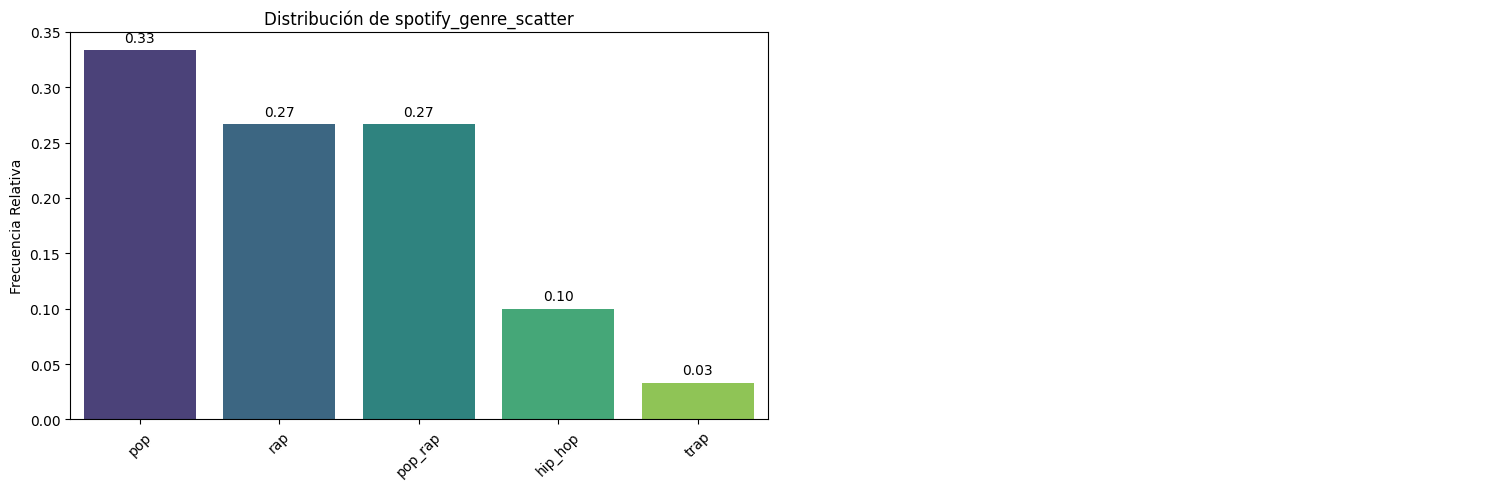

**Periodo de 01/01/2018 a 31/12/2023**
(2,)


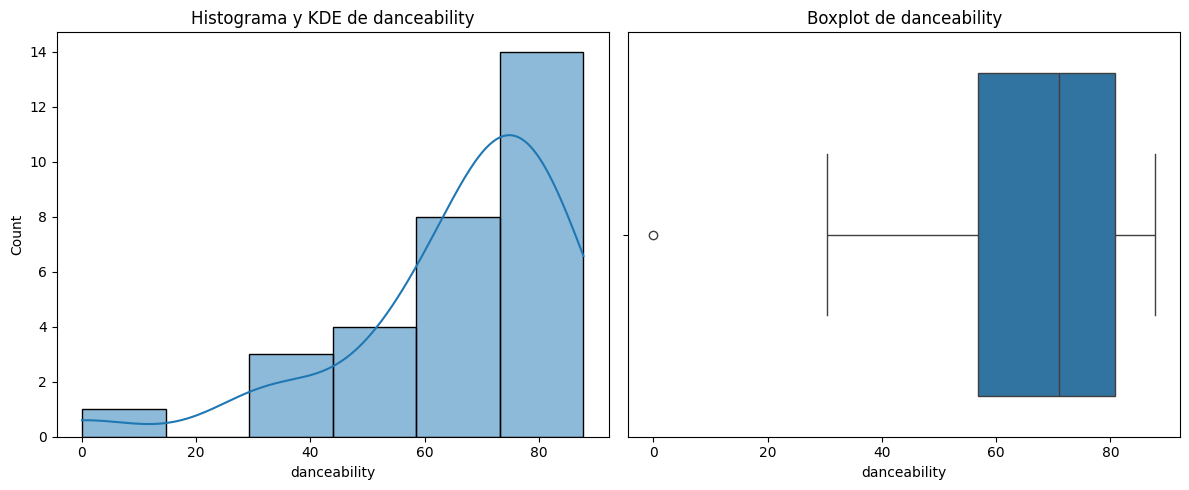

**Periodo de 01/01/2018 a 31/12/2023**


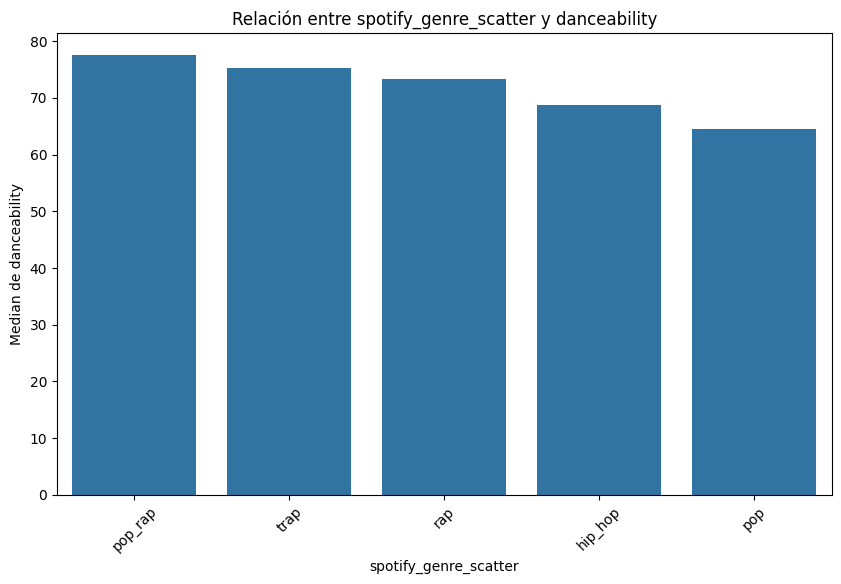

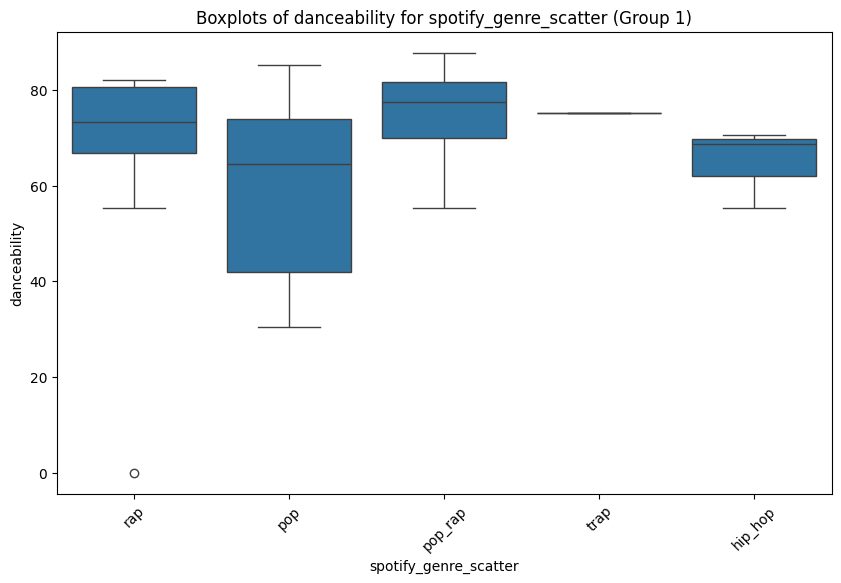

**Periodo de 01/01/2018 a 31/12/2023**


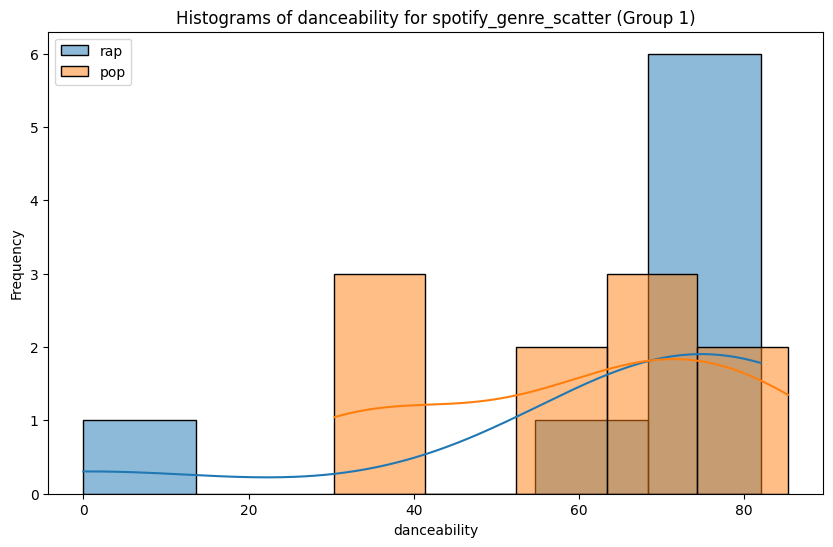

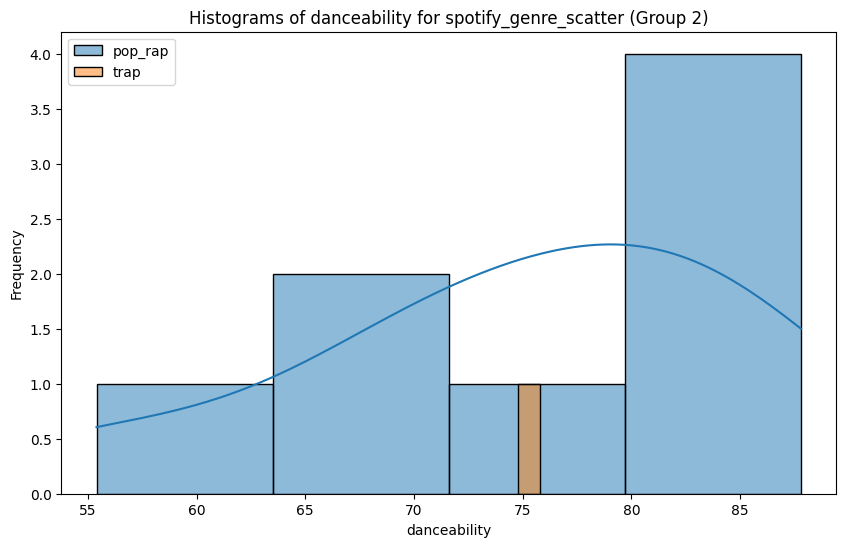

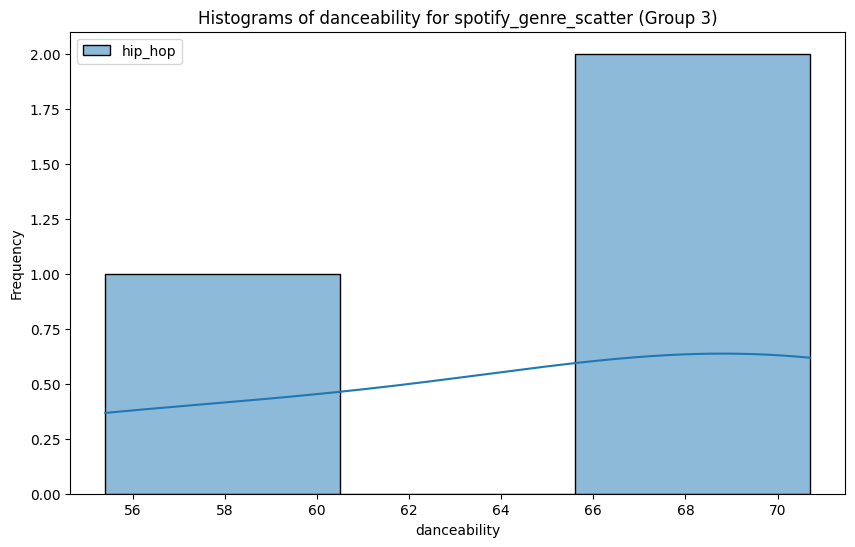

**Periodo de 01/01/2018 a 31/12/2023**
       danceability  spotify_genre_count
count     30.000000            30.000000
mean      66.303333           553.666667
std       19.470198           113.411163
min        0.000000           361.000000
25%       56.875000           509.000000
50%       70.950000           522.000000
75%       80.800000           672.000000
max       87.800000           722.000000
**Periodo de 01/01/2018 a 31/12/2023**


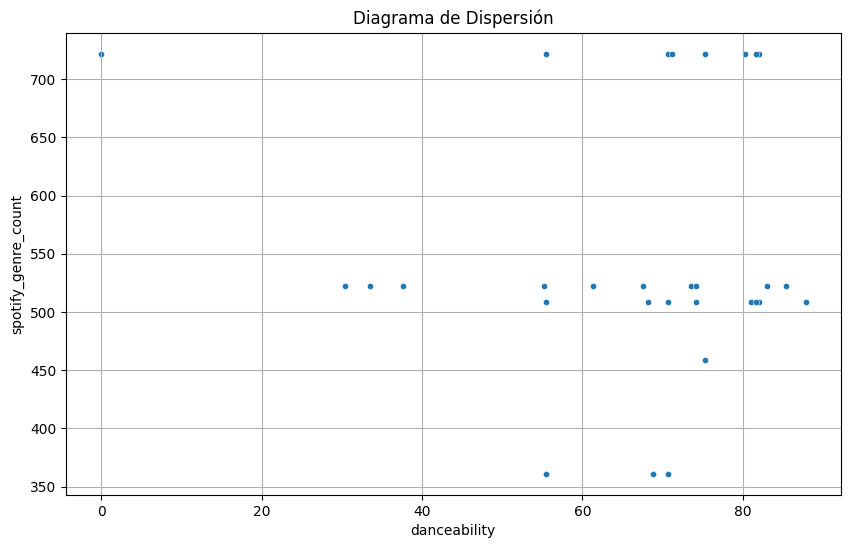

**Periodo de 01/01/2018 a 31/12/2023**
                     danceability  spotify_genre_count
danceability             1.000000            -0.056885
spotify_genre_count     -0.056885             1.000000


In [21]:
fechas_inicio = df_danceability['start_date'].unique()
fechas_fin = df_danceability['end_date'].unique()
for index,value in enumerate(fechas_inicio):
    filtro = df_danceability[(df_danceability['start_date']>=value) & (df_danceability['end_date']<=fechas_fin[index])]
    #pd.to_datetime(filtered.iloc[[0]]['WeekID_As_Date'].dt.strftime('%Y/%m/%d')
    cabecera=f"**Periodo de {value.strftime('%d/%m/%Y')} a {fechas_fin[index].strftime('%d/%m/%Y')}**"
    print(cabecera)
    pinta_distribucion_categoricas(filtro,["spotify_genre_scatter"], relativa= True, mostrar_valores= True)
    print(cabecera)
    plot_combined_graphs(filtro,["danceability"])
    print(cabecera)
    plot_categorical_numerical_relationship(filtro,"spotify_genre_scatter","danceability", measure = "median")
    plot_grouped_boxplots(filtro,"spotify_genre_scatter","danceability")
    print(cabecera)
    plot_grouped_histograms(filtro,"spotify_genre_scatter", "danceability",2)
    print(cabecera)
    print(filtro[["danceability","spotify_genre_count"]].describe())
    print(cabecera)
    grafico_dispersion_con_correlacion(filtro,"danceability","spotify_genre_count", 20)
    print(cabecera)
    print(filtro[["danceability","spotify_genre_count"]].corr())
    

In [59]:
def days_to_years_months_days(total_days):
    years = total_days // 365
    remaining_days = total_days % 365
    months = remaining_days // 30
    days = remaining_days % 30
    
    return years, months, days

In [ ]:
hypothesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
hypothesis_3 = "Que grupo o artista llevan más exitos en los ultimos 10 años y de que generos"
hypothesis_4 = "Qué grupo o artista han sido 1 hit wonder y de que generos"
hypothesis_5 = "Qué generos corresponden a cada grupo o artista anterior"
df_numeros_one_hit_wonder=df_Hot_Stuff[df_Hot_Stuff['Week Position']==1].copy()
#df_numeros_one_hit_wonder_groupby=df_numeros_one_hit_wonder.groupby('Performer')['Performer'].count()
#df_numeros_one_hit_wonder_groupby=df_numeros_one_hit_wonder.groupby('Performer')['Performer'].filter(lambda x: len(x) == 1)['Performer'].unique()
df_numeros_one_hit_wonder_groupby=(
    df_numeros_one_hit_wonder.groupby('Performer')
    .filter(lambda x: len(x) == 1)  # Filtering for performers with only one entry
    ['Performer']
    .unique()  # Getting unique performer names
)
#df_numeros_one_hit_wonder_groupby=pd.DataFrame(df_numeros_one_hit_wonder_groupby)
df_numeros_one_hit_wonder_groupby=pd.DataFrame(df_numeros_one_hit_wonder_groupby)
#df_numeros_1_group_by = df_numeros_1.groupby('Performer')['Perfomer'].count()
print(df_numeros_one_hit_wonder_groupby)
#df_numeros_1_group_by
df_numeros_one_hit_wonder_groupby # los que tuvieron un solo número uno pero puede haber con varias canciones o con una sola
print(df_numeros_one_hit_wonder.groupby('Performer')[['Performer','SongID']].count())
#df_numeros_one_hit_wonder_groupby.rename(columns={0:'Performer'},inplace=True)
#filtro=df_numeros_one_hit_wonder[df_numeros_one_hit_wonder['Performer'].isin(df_numeros_one_hit_wonder_groupby['Performer'])]
#filtro=pd.DataFrame(filtro.groupby('Performer').Performer.count())
#filtro.rename(columns={'Performer':'Totals'},inplace=True)
#filtro.reset_index(drop=False,inplace=True)
#filtro.sort_values(by="Totals")
df_Hot_Stuff_with_genres[['Performer_x','WeekID_As_Date']]
#for index,row in df_Hot_Stuff.iterrows():


# Convert 'dates' column to datetime

# Grouping by 'performer' and calculating duration on chart
duration_df = df_Hot_Stuff_with_genres.groupby('Performer_x').agg(
    min_date=('WeekID_As_Date', 'min'),
    max_date=('WeekID_As_Date', 'max')
).reset_index()
hypothesis_2 = "Que grupo o artista llevan más años en las listas más tiempo y de que generos"
# Calculate duration on chart
duration_df['time_on_chart'] = duration_df['max_date'] - duration_df['min_date']
#duration_df['time_on_chart_for_screen']= duration_df['time_on_chart'].apply(days_to_years_months_days)
duration_df=duration_df[['Performer_x', 'time_on_chart']].sort_values(by='time_on_chart',ascending=False)
# Displaying the performer and their time on the chart
print(duration_df[['Performer_x', 'time_on_chart']])


                                             0
0                               Thelma Houston
1                                 Taylor Hicks
2                                         Zayn
3                               Jonas Brothers
4                Ariana Grande & Justin Bieber
..                                         ...
210                                Bobby Brown
211  Pitbull Featuring Ne-Yo, Afrojack & Nayer
212                               Amii Stewart
213                               Simple Minds
214                                    Hi-Five

[215 rows x 1 columns]
                              Performer  SongID
Performer                                      
'N Sync                               2       2
24kGoldn Featuring iann dior          8       8
2Pac Featuring K-Ci And JoJo          2       2
50 Cent                               9       9
50 Cent Featuring Nate Dogg           4       4
...                                 ...     ...
Zager & Evans               

In [69]:
filtrado=df_Hot_Stuff_with_genres[df_Hot_Stuff_with_genres['Performer_x']=='Nat King Cole']
filtrado.sort_values(by='WeekID_As_Date')

SongID    Performer_x  \
43776       Come Closer To Me (Acercate Mas)Nat King Cole  Nat King Cole   
176861                  Nothing In The WorldNat King Cole  Nat King Cole   
149631                          Looking BackNat King Cole  Nat King Cole   
43778       Come Closer To Me (Acercate Mas)Nat King Cole  Nat King Cole   
43779       Come Closer To Me (Acercate Mas)Nat King Cole  Nat King Cole   
...                                                   ...            ...   
240385  The Christmas Song (Merry Christmas To You)Nat...  Nat King Cole   
52345                         Deck The HallsNat King Cole  Nat King Cole   
240359  The Christmas Song (Merry Christmas To You)Nat...  Nat King Cole   
240386  The Christmas Song (Merry Christmas To You)Nat...  Nat King Cole   
240360  The Christmas Song (Merry Christmas To You)Nat...  Nat King Cole   

                                             Song_x  \
43776              Come Closer To Me (Acercate Mas)   
176861                         Nothing In The World   
149631                                 Looking Back   
43778              Come Closer To Me (Acercate Mas)   
43779              Come Closer To Me (Acercate Mas)   
...                                             ...   
240385  The Christmas Song (Merry Christmas To You)   
52345                                Deck The Halls   
240359  The Christmas Song (Merry Christmas To You)   
240386  The Christmas Song (Merry Christmas To You)   
240360  The Christmas Song (Merry Christmas To You)   

                                      spotify_genre        spotify_track_id  \
43776                           ['adult standards']  76AbCflWiJBgByIqFl396O   
176861                          ['adult standards']  40Tb4czvl5B3hs3hkFtNTB   
149631                          ['adult standards']  4tRnUUeXZYLuiF6YvaYuBB   
43778                           ['adult standards']  76AbCflWiJBgByIqFl396O   
43779                           ['adult standards']  76AbCflWiJBgByIqFl396O   
...                                             ...                     ...   
240385                          ['adult standards']  4PS1e8f2LvuTFgUs1Cn3ON   
52345   ['adult standards', 'lounge', 'vocal jazz']  2I5xeRHcOIA20a6B9RJSS0   
240359                          ['adult standards']  4PS1e8f2LvuTFgUs1Cn3ON   
240386                          ['adult standards']  4PS1e8f2LvuTFgUs1Cn3ON   
240360                          ['adult standards']  4PS1e8f2LvuTFgUs1Cn3ON   

       spotify_track_preview_url  spotify_track_duration_ms  \
43776                        NaN                   168826.0   
176861                       NaN                   159293.0   
149631                       NaN                   146400.0   
43778                        NaN                   168826.0   
43779                        NaN                   168826.0   
...                          ...                        ...   
240385                       NaN                   192160.0   
52345                        NaN                    69000.0   
240359                       NaN                   192160.0   
240386                       NaN                   192160.0   
240360                       NaN                   192160.0   

       spotify_track_explicit  \
43776                   False   
176861                  False   
149631                  False   
43778                   False   
43779                   False   
...                       ...   
240385                  False   
52345                   False   
240359                  False   
240386                  False   
240360                  False   

                                      spotify_track_album  danceability  ...  \
43776                                        Cole Espanol         0.548  ...   
176861                                          Sincerely         0.546  ...   
149631                                       Looking Back         0.584  ...   
43778                                        Cole Espa

In [67]:
#'Chris Brown Featuring Justin Bieber & Ink'
filtrado=df_Hot_Stuff[df_Hot_Stuff['Performer'].str.contains('Simple Minds') ]
filtrado=filtrado[filtrado['Week Position']==1]
filtrado

url     WeekID  \
index                                                                  
326409  http://www.billboard.com/charts/hot-100/1985-0...  5/18/1985   

        Week Position                         Song     Performer  \
index                                                              
326409              1  Don't You (Forget About Me)  Simple Minds   

                                         SongID  Instance  \
index                                                       
326409  Don't You (Forget About Me)Simple Minds         1   

        Previous Week Position  Peak Position  Weeks on Chart  
index                                                          
326409                     3.0              1              13

Que es el Billboard
Que contiene el Dataset
Que es Spotify
Como clasifica Spotify los géneros
Que es el valor danceability
Presentación de gráficas
Datos curiosos
